# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1 We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [ ]:
loan_data_backup=pd.read_csv('/content/drive/MyDrive/loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Creating a copy of the loan_data_backup for safety

In [ ]:
loan_data_prep=loan_data_backup.copy()

In [ ]:
pd.options.display.max_columns=None

In [ ]:
loan_data_prep.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [ ]:
loan_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# ***General Preprocessing***

## Starting with the emp_length varibale.Preprocessing the 'emp_length' variable.

In [ ]:
loan_data_prep['emp_length'].unique()
# Displays unique values of a column.

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
loan_data_prep['emp_length_int']=loan_data_prep['emp_length'].str.replace('\+ years','')
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace('< 1 year', str(0))
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace('n/a', str(0))
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace(' years', '')
loan_data_prep['emp_length_int']=loan_data_prep['emp_length_int'].str.replace(' year', '')
loan_data_prep['emp_length_int']=pd.to_numeric(loan_data_prep['emp_length_int'])
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [ ]:
type(loan_data_prep['emp_length_int'][0])
# Checks the datatype of a single element of a column.

numpy.float64

In [ ]:
loan_data_prep['emp_length_int'].unique()
# Transforms the values to numeric.

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

## Preprocessing the earliest_cr_line variable.First Converting 'earliest_cr_line' to timestamp variable 

In [ ]:
loan_data_prep['earliest_cr_line']
# Displays a column.

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [ ]:
loan_data_prep['earliest_cr_line_date']=pd.to_datetime(loan_data_prep['earliest_cr_line'], format='%b-%y')
type(loan_data_prep['earliest_cr_line_date'][0])
# Extracts the date and the time from a string variable that is in a given format.
# Checks the datatype of a single element of a column.

pandas._libs.tslibs.timestamps.Timestamp

We should set a reference date to calculate the time that has passed

In [ ]:
pd.to_datetime('2017-12-01')-loan_data_prep['earliest_cr_line_date']
# Calculates the difference between two dates and times.

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

We get the difference in months

In [ ]:
# Assume we are now in December 2017
loan_data_prep['mnths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_prep['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_data_prep['mnths_since_earliest_cr_line'].describe()
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mnths_since_earliest_cr_line, dtype: float64

Everything seems fine except the minimum value which is negative.We need to 
solve this issue.We can start by displaying the data points where the negative time differences were calculated together with the earliest credit line variable we created.We can select specific rows and columns of a panda's data frame by their labels with the lock method.We need to specify which rows and columns we want to slice.We want all rows.The two columns we are interested in are earliest credit line date and months since earliest credit line.

In [ ]:
loan_data_prep.loc[:,['earliest_cr_line','earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_data_prep['mnths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mnths_since_earliest_cr_line
1580             Sep-62            2062-09-01                        -537.0
1770             Sep-68            2068-09-01                        -609.0
2799             Sep-64            2064-09-01                        -561.0
3282             Sep-67            2067-09-01                        -597.0
3359             Feb-65            2065-02-01                        -566.0
...                 ...                   ...                           ...
464003           Jan-68            2068-01-01                        -601.0
464260           Jul-66            2066-07-01                        -583.0
465100           Oct-67            2067-10-01                        -598.0
465500           Sep-67            2067-09-01                        -597.0
465655           Jan-56            2056-01-01                        -457.0

[1169 rows x 3 columns]

We can see that for all of these rows the earliest credit line date is way into the future after the year 2060; most likely what has happened is that when we were turning the strings into dates variables ending in 60 something ,they were not interpreted correctly and were turned into year 2060 something instead of 1960 something if this hypothesis is true.The best way to solve this would be to turn those dates to the actual 1960 dates and recalculate the difference.However this process may be difficult and time consuming.Most likely the issue arose in the first place because the origin of the built in timescale starts after the 60s perhaps with the year 1970.On the other hand we can argue that since we have more than 880000 observations we don't need these.But data is very important for us and we don't like removing them so easily and in such cases it is best to choose an approach that is somewhere in the middle between those two. Since we need the difference in month between the date the earliest credit line was issued and December 2017, we can input values directly into the months since earliest credit line variable but what values shall we impute.Well we know that we get the negative values for credit line issues at a very distant point in the past in the 60s that is a longer period than all other credit lines that we normally get values for.So why not substitute the negative values with the maximum observed normal or positive difference.That way even if we don't calculate the exact number of months that have passed since the earliest credit line was issued for those issued in the 60s we put a very large value and we still get pretty close to the real picture.So how do we do that?First from our data frame we select only the months since earliest credit line column and then from this selection we select only the observations with negative values.Next we assign these rows to be equal to the maximum of the months since earliest credit line.Finally let's check the minimum of months since earliest credit line again.Great.It's 73.We've imputed the value successfully and our variable is ready for analysis.

In [ ]:
loan_data_prep['mnths_since_earliest_cr_line'][loan_data_prep['mnths_since_earliest_cr_line']<0]=loan_data_prep['mnths_since_earliest_cr_line'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
min(loan_data_prep['mnths_since_earliest_cr_line'])

73.0

## **Preprocessing the the ‘term’ variable**

In [ ]:
loan_data_prep['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [ ]:
loan_data_prep['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [ ]:
loan_data_prep['term_int'] = loan_data_prep['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty string (i.e. with nothing).

In [ ]:
type(loan_data_prep['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [ ]:
loan_data_prep['term_int'] = pd.to_numeric(loan_data_prep['term'].str.replace(' months', ''))
# We replace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data_prep['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [ ]:
type(loan_data_prep['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

## Preprocessing the 'issue_d' variable

In [ ]:
loan_data_prep['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [ ]:
# Assume we are now in December 2017
loan_data_prep['issue_d_date'] = pd.to_datetime(loan_data_prep['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data_prep['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data_prep['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data_prep['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

# Preprocessing few discrete variables.<br>
We will focus on several discrete or categorical variables namely:-<br>
1.   grade.
2.   sub grade.
3.   Home ownership.
4.   verification status.
5.   loan status.
6.   purpose.
7.   addr_state
8.   initial list status.<br>
It takes minimum effort what we want to do with the discrete features.We will create dummy variables for all of their categories.Dummy variables are binary indicators they take the value of 1 if the observation belongs to a category and the value of 0 if it doesn't.<br>
We need k-1 dummy varibales to represent information about k categories.

### Applying to the grade variable first and then to other categorical varables

In [ ]:
pd.get_dummies(loan_data_prep['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [ ]:
#pd.get_dummies(Series,[prefix],[prefix_sep]) creates dummies for a given categorical varibale,
#We can specify the prefix to the name of the dummy varibales using the prefix and the prefix_sep arguements.

pd.get_dummies(loan_data_prep['grade'], prefix='grade',prefix_sep=':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [ ]:
#Applying this to the other categorical variables
loan_data_dummies_prep=[pd.get_dummies(loan_data_prep['grade'], prefix='grade',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['sub_grade'], prefix='sub_grade',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['home_ownership'], prefix='home_ownership',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['verification_status'], prefix='verification_status',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['loan_status'], prefix='loan_status',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['purpose'], prefix='purpose',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['addr_state'], prefix='addr_state',prefix_sep=':'),
                   pd.get_dummies(loan_data_prep['initial_list_status'], prefix='initial_list_status',prefix_sep=':')]


In [ ]:
loan_data_dummies_prep=pd.concat(loan_data_dummies_prep,axis=1) #Please don't run this again and again as it would create duplicate columns
loan_data_prep=pd.concat([loan_data_prep,loan_data_dummies_prep],axis=1) #Please don't run this again and again as it would create duplicate columns
loan_data_prep.info()
loan_data_prep.columns.values
loan_data_prep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Columns: 207 entries, Unnamed: 0 to initial_list_status:w
dtypes: datetime64[ns](2), float64(49), int64(8), object(22), uint8(126)
memory usage: 344.2+ MB


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

# Check for missing values and clean

In [ ]:
loan_data_prep.isnull()

Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0            False  False      False      False        False            False   
1            False  False      False      False        False            False   
2            False  False      False      False        False            False   
3            False  False      False      False        False            False   
4            False  False      False      False        False            False   
...            ...    ...        ...        ...          ...              ...   
466280       False  False      False      False        False            False   
466281       False  False      False      False        False            False   
466282       False  False      False      False        False            False   
466283       False  False      False      False        False            False   
466284       False  False      False      False        False            False   

         term  int_rate  installment  grade  sub_grade  emp_title  emp_length  \
0       False     False        False  False      False       True       False   
1       False     False        False  False      False      False       False   
2       False     False        False  False      False       True       False   
3       False     False        False  False      False      False       False   
4       False     False        False  False      False      False       False   
...       ...       ...          ...    ...        ...        ...         ...   
466280  False     False        False  False      False      False       False   
466281  False     False        False  False      False      False       False   
466282  False     False        False  False      False      False       False   
466283  False     False        False  False      False      False       False   
466284  False     False        False  False      False       True       False   

        home_ownership  annual_inc  verification_status  issue_d  loan_status  \
0                False       False                False    False        False   
1                False       False                False    False        False   
2                False       False                False    False        False   
3                False       False                False    False        False   
4                False       False                False    False        False   
...                ...         ...                  ...      ...          ...   
466280           False       False                False    False        False   
466281           False       False                False    False        False   
466282           False       False                False    False        False   
466283           False       False                False    False        False   
466284           False       False                False    False        False   

        pymnt_plan    url   desc  purpose  title  zip_code  addr_state    dti  \
0            False  False  False    False  False     False       False  False   
1            False  False  False    False  False     False       False  False   
2            False  False   True    False  False     False       False  False   
3            False  False  False    False  False     False       False  False   
4            False  False  False    False  False     False       False  False   
...            ...    ...    ...      ...    ...       ...         ...    ...   
466280       False  False   True    False  False     False       False  False   
466281       False  False   True    False  False     False       False  False   
466282       False  False  False    False  False     False       False  False   
466283       False  False   True    False  False     False       False  False   
466284       False  False  False    False  False     False       False  False   

        delinq_2yrs  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0             False             Fal

In [ ]:
pd.options.display.max_rows=None
loan_data_prep.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

Variables we will need for analysis:-
1.   annual_inc
2.   delinq_2yrs
3.   inq_last_6mths
4.   open_acc
5.   pub_rec
6.   total_acc
7.   acc_now_delinq
8.   total_rev_hi_lim
9.   emp_length_int
10.   mths_since_earliest_cr_line











In [ ]:
pd.options.display.max_rows=100

In [ ]:
#Replace missing values of total_rev_hi_lim with funded_amnt
loan_data_prep['total_rev_hi_lim'].fillna(loan_data_prep['funded_amnt'],inplace=True)

In [ ]:
loan_data_prep['total_rev_hi_lim'].isnull().sum()

0

In [ ]:
# We fill the missing values of annual_inc with the mean value of the non-missing values.
loan_data_prep['annual_inc'].fillna(loan_data_prep['annual_inc'].mean(), inplace=True)
# We fill the missing values with zeroes.
loan_data_prep['mnths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data_prep['acc_now_delinq'].fillna(0, inplace=True)
loan_data_prep['total_acc'].fillna(0, inplace=True)
loan_data_prep['pub_rec'].fillna(0, inplace=True)
loan_data_prep['open_acc'].fillna(0, inplace=True)
loan_data_prep['inq_last_6mths'].fillna(0, inplace=True)
loan_data_prep['delinq_2yrs'].fillna(0, inplace=True)
loan_data_prep['emp_length_int'].fillna(0, inplace=True)


# PD Model<br>
Data Preparation<br>
Dependent Variable,Good/Bad (Default) Definition.<br>
Default and Non-Default Accounts.

In [ ]:
loan_data_prep['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
loan_data_prep['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
loan_data_prep['loan_status'].value_counts()/loan_data_prep['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

We take the Good accountS (non-default) as 1 and Bad (deafault) as 0

In [ ]:
#Assigning respetive loans to good and bad acounts
loan_data_prep['good_bad']=np.where(loan_data_prep['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (16-30 days)']),0,1)
loan_data_prep['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

## Some thoretical concepts

*Fine Classing and Coarse Classing:-*<br>

---


In reality there is a well-established methodology **to try to split continuous variables into categories**.Once they are categorical we proceed by bundling them up depending on their properties.This process is called Fine classing.<br>

***Coarse classing is the process of constructing new categories based on the initial ones***.Throughout our course study we will deal with variables that have 5/6 or even 50 or more categories based on the weights of evidence.We will combine them into bigger categories.Usually we prefer categories that have similar weight of evidence to be bundled together. In this way we lower the number of dummies and improve our PD model.

Weight of evidence (WOE) would tell us to what extent an independent variable 
would predict a dependent varibale.<br>
In other words how much evidence does the independent variable have with respect to differences in the dependent variable.<br>
More specifically weight of evidence shows the extent to which each of the different categories of an independent variable explains the dependent one.<br>

***Formula for WOE:-<br>***

---


The ***formula of the weight of evidence*** is the ***natural logarithm of the ratio of the proportion of observations of the first type of outcome of the dependent variable that fall into the respective category of the independent variable and the proportion of observations of the second type of outcome of the dependent variable that fall into the respective category of the independent variable.***<br>
The two types of outcome are non defaulted or good and defaulted or bad.**So the weight of evidence would be the natural logarithm of the ratio of the proportion of goods from the total number of goods that fall into the category to the proportion of bads from the total number of bads that fall into a category.**<br>

Method to calculae WOE:-<br>

---
Say we want to calculate the weight of evidence for the independent variable education.Education has two categories higher education or no higher education. From the 4600 borrowers with higher education,4000 are good and 600 are bad. From the 15400 with no higher education,12000 are good and 3400 are bad.Now there are 16000 good borrowers in total and 4000 bad borrowers.In total the proportion of good borrowers who have a higher education is 4000/16000 or 25 percent respectively.The proportion of good borrowers who don't have higher education is 12000/16000 or 75 percent.Similarly the proportion of bad borrowers who have higher education is 600/4000 or 15 percent and the proportion of bad borrowers who don't have higher education is 3400/4000 or 85 percent.So weight of evidence for having higher education with respect to being a good or a bad borrower is the natural logarithm of the proportion of good borrowers who have higher education to the proportion of bad borrowers who have higher education.That is the natural logarithm of 25 percent divided by 15 percent or about 0.51.

**Note that the further away from zero the weight evidence the better the category in differentiating between the two outcomes of the dependent variable.**

***Information Value(IV)***<br>

---


With respect to explaining the dependent variable weight of evidence gives us an insight into how useful a given category of an independent variable is.Of course that would not matter if the original independent variable was useless to begin with.We can use the Information Value to find the answer to this more fundamental question.Assume an original independent variable has been split into categories.It may have been categorical originally or categories may have been determined through fine classing or course classing.It doesn't really matter.Suppose there are K categories of this variable then we can calculate the weight of evidence for each of the key categories.We already know how to do that.From there we can weigh these weights of evidence of each category.We can weigh each by the difference of the proportion of goods from the total number of goods that fallinto the respective category and the proportion of bads from the total number of bads that fall into the respective category.Then we simply sum them to reach a weighted average of the weights of evidence of the K categories.The results is called the information value of the original independent variable with respect to the dependent variable.**The information value shows us how much information the original independent variable brings with respect to explaining the dependent variable.**Therefore the information value can be used to identify the original independent variables which explain
the dependent variable best.Hence as you are probably anticipating you can use information value for pre-selection.<br>
So if we have 100 contestants for predictors in a regression,the information value can help us preselect the best five or 10 or 20 independent variables to include in a statistical model.The information value was always in the range from 0 to 1. Greater value meanS that the original variable yields more information with respect to the outcome.<br>

This metric is commonly interpreted as follows:- 
1. a value lower than 0.02 means that the independent variable is not useful for prediction of the outcome.
2. a value between 0.02 and 0.1 means it has weak predictive power.
3. a value between 0.1 and 0.3 means its predictive power is medium. 
4. a value between 0.3 and 0.5 means that its predictive power is strong.
5. and a value greater than 0.5 means it has a suspiciously strong predictive
power or in other words that it is most certainly too good to be true.<br>



## Splitting Data

In [ ]:
loan_data_prep_inputs_train,loan_data_prep_inputs_test,loan_data_prep_targets_train,loan_data_prep_targets_test=train_test_split(loan_data_prep.drop('good_bad',axis=1),loan_data_prep['good_bad'],test_size=0.2,random_state=42)

In [ ]:
loan_data_prep_inputs_train.shape

(373028, 207)

In [ ]:
loan_data_prep_inputs_test.shape

(93257, 207)

In [ ]:
loan_data_prep_targets_train.shape

(373028,)

In [ ]:
loan_data_prep_targets_test.shape

(93257,)

## Data Preparation for a few discrete variables and splitting data
Discrete variables don't need fine classing or splitting into categories because they are already categorical.By definition for convenience let's create working data frames for all the pre processing.Let's start with a rather simple variable 'grade'.We want to assess its explanatory power with respect to the outcome of interest that is being a good or a bad borrower.

In [ ]:
#df_inputs_prepr=loan_data_prep_inputs_train
#df_targets_prepr=loan_data_prep_targets_train
df_inputs_prepr=loan_data_prep_inputs_test
df_targets_prepr=loan_data_prep_targets_test
#Now we can create a new data frame called df1 where we will store only the independent variable 'grade' from the df_inputs_prepr.
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
# we will calculate the weight of evidence of this discrete variable 'grade'.
#The formula was equal to the natural logarithm of the ratio of the proportion of good borrowers to the proportion of bad borrowers.
#Therefore to find the weight of evidence of grade we must first find the proportion of good and bad.
#-----------------------------------------------------------------------
#Let's start with the number of borrowers for each grade.
#To do that we can count the rows that contain each of the grades.
#We do this with the group-by method grouped by splitting the data according to certain criteria.
#In our case we want to split by grade.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     15108
1     B     27199
2     C     25048
3     D     15390
4     E      7145
5     F      2699
6     G       668

In [ ]:
#Another piece of information we may need is the proportion of good and bad borrowers are within each group.
#This can be summarized either by the proportion of good borrowers or by the proportion of bad borrowers.
#We can apply the same statement as above except that at the end we apply the mean method instead of the count method.
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.965714
1     B  0.931211
2     C  0.896040
3     D  0.863938
4     E  0.829531
5     F  0.799555
6     G  0.729042

In [ ]:
#Finally we conctenate the two dataframes
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [ ]:
df1

grade  good_bad grade  good_bad
0     A     15108     A  0.965714
1     B     27199     B  0.931211
2     C     25048     C  0.896040
3     D     15390     D  0.863938
4     E      7145     E  0.829531
5     F      2699     F  0.799555
6     G       668     G  0.729042

In [ ]:
df1=df1.iloc[:,[0,1,3]]
df1.columns=[df1.columns.values[0],'n_obs','prop_good']
df1

grade  n_obs  prop_good
0     A  15108   0.965714
1     B  27199   0.931211
2     C  25048   0.896040
3     D  15390   0.863938
4     E   7145   0.829531
5     F   2699   0.799555
6     G    668   0.729042

In [ ]:
#Let's calculate the proportion of observations that falls into each grade.It is the number of observations in each row divided by the sum of the number of observations in each row.
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A  15108   0.965714    0.162004
1     B  27199   0.931211    0.291656
2     C  25048   0.896040    0.268591
3     D  15390   0.863938    0.165028
4     E   7145   0.829531    0.076616
5     F   2699   0.799555    0.028942
6     G    668   0.729042    0.007163

In [ ]:
#First let's calculate the number of good borrowers and the number of bad borrowers by grade.
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  15108   0.965714    0.162004  14590.0   518.0
1     B  27199   0.931211    0.291656  25328.0  1871.0
2     C  25048   0.896040    0.268591  22444.0  2604.0
3     D  15390   0.863938    0.165028  13296.0  2094.0
4     E   7145   0.829531    0.076616   5927.0  1218.0
5     F   2699   0.799555    0.028942   2158.0   541.0
6     G    668   0.729042    0.007163    487.0   181.0

In [ ]:
#The percentage of good borrowers in the respective grade category equals the number of good borrowers in the respective category 
#divided by the total number of good borrowers, which is the sum of good borrowers in all categories.
#Same holds true for bad borrowers.
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad  
0    0.057383  
1    0.207267  
2    0.288468  
3    0.231971  
4    0.134929  
5    0.059931  
6    0.020051

In [ ]:
#Calculating WOE
df1['WOE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   
1     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
2     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
5     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
6     G    668   0.729042    0.007163    487.0   181.0     0.005782   

   prop_n_bad       WOE  
0    0.057383  1.104785  
1    0.207267  0.372106  
2    0.288468 -0.079356  
3    0.231971 -0.384944  
4    0.134929 -0.651023  
5    0.059931 -0.849813  
6    0.020051 -1.243564

In [ ]:
#Sorting the values
df1=df1.sort_values(['WOE'])
df1=df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WOE  
0    0.020051 -1.243564  
1    0.059931 -0.849813  
2    0.134929 -0.651023  
3    0.231971 -0.384944  
4    0.288468 -0.079356  
5    0.207267  0.372106  
6    0.057383  1.104785

In [ ]:
#Calculate the differences in the proportion of good loans between two subsequent categories  and the difference of weight of evidence between two subsequent categories.
df1['diff_prop_good']=df1['prop_good'].diff().abs()
df1['diff_WOE']=df1['WOE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WOE  diff_prop_good  diff_WOE  
0    0.020051 -1.243564             NaN       NaN  
1    0.059931 -0.849813        0.070513  0.393751  
2    0.134929 -0.651023        0.029976  0.198790  
3    0.231971 -0.384944        0.034406  0.266079  
4    0.288468 -0.079356        0.032102  0.305587  
5    0.207267  0.372106        0.035171  0.451463  
6    0.057383  1.104785        0.034503  0.732679

In [ ]:
#Calculating the Information Value
df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WOE']
df1['IV']=df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.020051 -1.243564             NaN       NaN  0.281949  
1    0.059931 -0.849813        0.070513  0.393751  0.281949  
2    0.134929 -0.651023        0.029976  0.198790  0.281949  
3    0.231971 -0.384944        0.034406  0.266079  0.281949  
4    0.288468 -0.079356        0.032102  0.305587  0.281949  
5    0.207267  0.372106        0.035171  0.451463  0.281949  
6    0.057383  1.104785        0.034503  0.732679  0.281949

## Automating Calculations for Information Value.<br>
Well we can achieve this by writing a function that performs these calculations for any given pair of categorical variable and dependent variable.

In [ ]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]] #keeping only the first second and fourth columns
    df.columns=[df.columns.values[0],'n_obs','prop_good'] #Assign specific column names
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum() #Caculate the proportion of observations from the total number of observations
    df['n_good']=df['prop_good']*df['n_obs'] #Calculate the number of good borrowers
    df['n_bad']=(1-df['prop_good'])*df['n_obs'] #Calculate the number of bad borrowers
    df['prop_n_good']=df['n_good']/df['n_good'].sum() #Calculate the proportion of good borrowers from the total number of borrowers
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum() #Calculate the proportion of bad borrowers from the total number of borrowers
    df['WOE']=np.log(df['prop_n_good']/df['prop_n_bad']) #Calculate Weight Of Evidence
    df=df.sort_values(['WOE']) #Sort by WOE and Reset the index
    df=df.reset_index(drop=True) #Sort by WOE and Reset the index
    df['diff_prop_good']=df['prop_good'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['diff_WOE']=df['WOE'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WOE'] #we find the information value.
    df['IV']=df['IV'].sum() #we find the information value.
    return df


In [ ]:
df_temp=woe_discrete (df_inputs_prepr, 'grade', df_targets_prepr)
df_temp 

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    668   0.729042    0.007163    487.0   181.0     0.005782   
1     F   2699   0.799555    0.028942   2158.0   541.0     0.025620   
2     E   7145   0.829531    0.076616   5927.0  1218.0     0.070367   
3     D  15390   0.863938    0.165028  13296.0  2094.0     0.157853   
4     C  25048   0.896040    0.268591  22444.0  2604.0     0.266461   
5     B  27199   0.931211    0.291656  25328.0  1871.0     0.300700   
6     A  15108   0.965714    0.162004  14590.0   518.0     0.173216   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.020051 -1.243564             NaN       NaN  0.281949  
1    0.059931 -0.849813        0.070513  0.393751  0.281949  
2    0.134929 -0.651023        0.029976  0.198790  0.281949  
3    0.231971 -0.384944        0.034406  0.266079  0.281949  
4    0.288468 -0.079356        0.032102  0.305587  0.281949  
5    0.207267  0.372106        0.035171  0.451463  0.281949  
6    0.057383  1.104785        0.034503  0.732679  0.281949

## Preprocessing Discrete Varables:Visualizing Results

In [ ]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WOE']
    plt.figure(figsize=(10,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight Of Evidence')
    plt.title(str('Weight of Evidence by ' +df_WoE.columns[0]))
    plt.xticks(rotation=rotation_of_x_axis_labels)

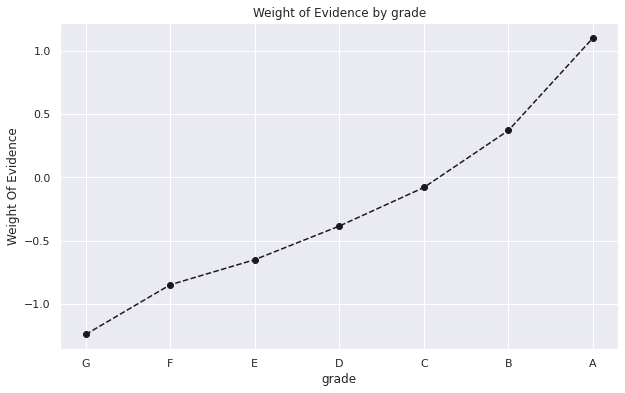

In [ ]:
plot_by_woe(df_temp)

We've decided to use the probability of default model.<br>
1. Based on weight of evidence we must decide how to organize the original categories of the discrete variables into dummy variables for the PD model.
2. Remember that the grade variable reflects external credit ratings. Of all variables it's the one that should have very good patterns on weights of evidence.Indeed as you can see on the chart weight of evidence increases almost monotonously with the increase of external credit rating grades from the worst G to the best A.The greater the grade the greater the weight of evidence.That means loans with greater external rating are better on average based on this pattern of weight of evidence.Let's keep the original seven categories of the grade variable as independent variables for the PD model.So the first 7 dummy variables will be the variables from grade'A' to grade 'G'.When we put these dummy variables into where a regression model we should keep one out as a reference category; the category against which the impact of all others on the outcome will be assessed.
3. At this stage it's a good idea to keep a record of which dummy variable will be a reference category when we create all dummy variables for each original variable. Let's establish that we'll always keep the category with the worst credit risk as a reference category;that is the dummy variable that has or is composed of several categories that have the **lowest weight of evidence**.So **grade:G'** will be the first item in our list of reference categories.

In [ ]:
df_temp=woe_discrete (df_inputs_prepr, 'home_ownership', df_targets_prepr) #Calculation of the WoE for the Home Ownership Discrete Variable.
df_temp 

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     45   0.777778    0.000483     35.0    10.0     0.000416   
1           NONE     10   0.800000    0.000107      8.0     2.0     0.000095   
2           RENT  37874   0.887944    0.406125  33630.0  4244.0     0.399264   
3            OWN   8409   0.901891    0.090170   7584.0   825.0     0.090039   
4       MORTGAGE  46919   0.915898    0.503115  42973.0  3946.0     0.510186   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.001108 -0.980568             NaN       NaN  0.023679  
1    0.000222 -0.847037        0.022222  0.133531  0.023679  
2    0.470145 -0.163419        0.087944  0.683618  0.023679  
3    0.091392 -0.014918        0.013947  0.148500  0.023679  
4    0.437133  0.154539        0.014007  0.169457  0.023679

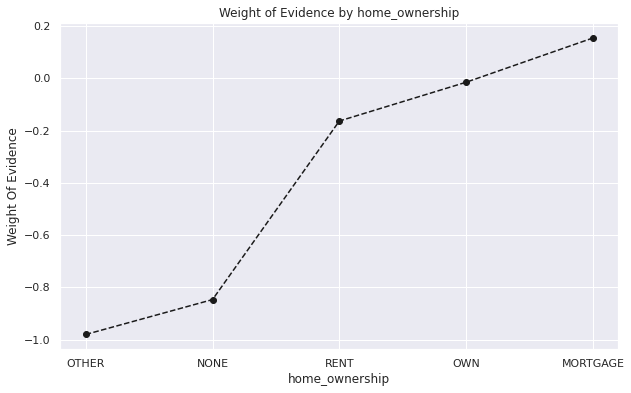

In [ ]:
plot_by_woe(df_temp)

1. Clearly the categories 'OTHER' and 'NONE' are associated with the highest probability of default.While this seems  like a breakthrough it is worth looking into their proportion of the total number of observations in the loan dataset.
2. Fortunately we already have that information over here. We can see that there are very few loans associated with these categories; less than zero point one percent each.
3. Also note that weight of evidence could not be calculated for the Home Ownership category 'ANY' because there is only one observation with this home ownership status.
4. It really doesn't make sense to have dummy variables for these categories so we don't want to have dummies for them but we don't want to remove them either because that would imply losing the information about these customers.
5. In these cases we combine such underrepresented categories that are similar to them.This is another extremely important pre processing step.
6. So let's combine 'OTHER', 'NONE' and 'ANY' with the risk category with enough number of observations.That is the category 'RENT'.
7. Borrowers with category 'OWN' have a considerably higher weight of evidence than the ones with category 'RENT'.So these two categories will be in two different dummy variables.
8. Finally there is the 'MORTGAGE' category the mortgage category encompasses about half of all borrowers.Hence it will be in a separate dummy variable.
9. Thus for the Home Ownership variable will have one dummy variable for categories 'RENT' 'OTHER' 'NONE' and a separate dummy variable for category 'OWN' and one dummy variable for category 'MORTGAGE'.
10. we've already created dummy variables for the original categories of all discrete variables in the lecture where we pre process the discrete variables.
We can easily use them as independent variables for the PD model.
11. The only thing we have left is to combine the dummy variables for RENT,
OTHER NONE and ANY .Let's name it 'Home_Ownership_rent_other_none_any'.This dummy variable will be equal to 1 if the borrower has any of the four categories and zero otherwise.


In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']=sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [ ]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY']

362514    0
288564    0
213591    0
263083    0
165001    0
         ..
115       0
296284    1
61777     0
91763     0
167512    1
Name: home_ownership:RENT_OTHER_NONE_ANY, Length: 93257, dtype: uint8

### Preprocessing for 'addr_state' variable.

In [ ]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          ID      2   0.500000    0.000021      1.0     1.0     0.000012   
1          NV   1298   0.875963    0.013919   1137.0   161.0     0.013499   
2          HI    486   0.882716    0.005211    429.0    57.0     0.005093   
3          FL   6426   0.883598    0.068906   5678.0   748.0     0.067411   
4          AL   1182   0.884095    0.012675   1045.0   137.0     0.012407   
5          DE    208   0.884615    0.002230    184.0    24.0     0.002184   
6          NJ   3676   0.884657    0.039418   3252.0   424.0     0.038609   
7          LA   1130   0.885841    0.012117   1001.0   129.0     0.011884   
8          NY   8031   0.894658    0.086117   7185.0   846.0     0.085302   
9          RI    403   0.895782    0.004321    361.0    42.0     0.004286   
10         MI   2358   0.896098    0.025285   2113.0   245.0     0.025086   
11         MO   1491   0.896714    0.015988   1337.0   154.0     0.015873   
12         MD   2203   0.897413    0.023623   1977.0   226.0     0.023471   
13         NC   2478   0.898709    0.026572   2227.0   251.0     0.026440   
14         PA   3334   0.898920    0.035751   2997.0   337.0     0.035581   
15         AR    728   0.899725    0.007806    655.0    73.0     0.007776   
16         AZ   2067   0.899855    0.022165   1860.0   207.0     0.022082   
17         CA  14251   0.901761    0.152814  12851.0  1400.0     0.152570   
18         WA   2145   0.902098    0.023001   1935.0   210.0     0.022973   
19         MA   2214   0.904697    0.023741   2003.0   211.0     0.023780   
20         NH    402   0.905473    0.004311    364.0    38.0     0.004322   
21         IN   1315   0.905703    0.014101   1191.0   124.0     0.014140   
22         OK    833   0.906363    0.008932    755.0    78.0     0.008964   
23         OH   3102   0.906512    0.033263   2812.0   290.0     0.033385   
24         UT    672   0.909226    0.007206    611.0    61.0     0.007254   
25         GA   3015   0.909453    0.032330   2742.0   273.0     0.032554   
26         WI   1171   0.909479    0.012557   1065.0   106.0     0.012644   
27         SD    179   0.910615    0.001919    163.0    16.0     0.001935   
28         VA   2856   0.911415    0.030625   2603.0   253.0     0.030903   
29         MN   1632   0.911765    0.017500   1488.0   144.0     0.017666   
30         NM    513   0.912281    0.005501    468.0    45.0     0.005556   
31         OR   1135   0.912775    0.012171   1036.0    99.0     0.012300   
32         CO   1916   0.916493    0.020545   1756.0   160.0     0.020848   
33         KY    851   0.916569    0.009125    780.0    71.0     0.009260   
34         TX   7281   0.918006    0.078075   6684.0   597.0     0.079354   
35         IL   3779   0.919820    0.040522   3476.0   303.0     0.041268   
36         SC   1135   0.920705    0.012171   1045.0    90.0     0.012407   
37         CT   1429   0.920924    0.015323   1316.0   113.0     0.015624   
38         TN   1139   0.920983    0.012214   1049.0    90.0     0.012454   
39         VT    178   0.921348    0.001909    164.0    14.0     0.001947   
40         MS    246   0.922764    0.002638    227.0    19.0     0.002695   
41         KS    830   0.926506    0.008900    769.0    61.0     0.009130   
42         AK    248   0.927419    0.002659    230.0    18.0     0.002731   
43         WV    486   0.927984    0.005211    451.0    35.0     0.005354   
44         WY    209   0.933014    0.002241    195.0    14.0     0.002315   
45         DC    297   0.939394    0.003185    279.0    18.0     0.003312   
46         MT    293   0.952218    0.003142    279.0    14.0     0.003312   
47         ME      2   1.000000    0.000021      2.0     0.0     0.000024   
48         IA      1   1.000000    0.000011      1.0     0.0     0.000012   
49         NE      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.000111 -2

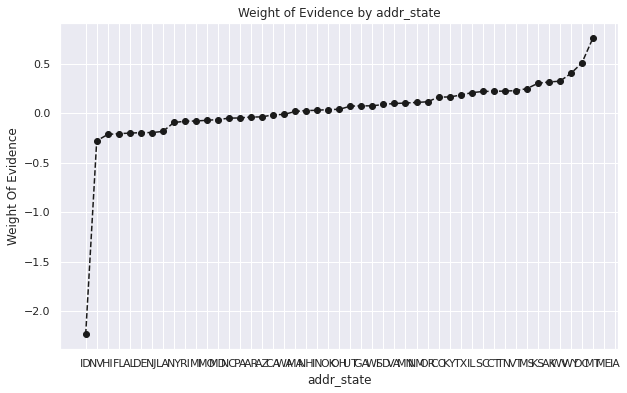

In [ ]:
plot_by_woe(df_temp)

1. Note that there are only 50 categories appearing in the results table.This is likely because there are no borrowers from one of the states by the way.The missing state is North Dakota abbreviated ND.Let's keep that in mind and make sure we add this state to a category later just in case there are some borrowers from around there in the future to do that.Let's make sure there will be a dummy variable for North Dakota.So if there is such a dummy variable
already, you don't do anything else.If there isn't we will create it and set all its values to zero because in this case there aren't any borrowers coming from North Dakota.
2. Now we can see here that there are two states Nebraska and Iowa with a considerably lower weight of evidence compared to most states.
There are also two states with a considerably higher weight of evidence,Maine and Idaho.
3. Note that weight of evidence for the last state could not be calculated because there are no bad borrowers.
4. The other 46 categories appear to have very similar weight of evidence values compared to these three.
5. Looking back at the results table we can see that the first two and the last two states actually have very few observations.It doesn't make sense to leave them in separate categories.Besides it is highly likely that the low number of observations is the reason for their extreme weight of evidence.So we'll include these states in the first, the worst and the last, the best category respectively.
6. Now let's focus on the other 46 states.We can do that by running our planning function on the results data frame again taking all rows except
for the first two and the last two.
7. The below graph gives us a different perspective. As Nebraska and Iowa were so far away from the rest of the observations the initial chart was causing us to believe that all states are more or less the same in terms of weight of evidence.Now we can clearly see that there are some differences; we can see over here that the first state on the graph has considerably lower weight of evidence than the next one and that the next three states have similar weights of evidence that are considerably lower than the weights of evidence of the following states.
8. Therefore it may make sense to keep the first state Nevada in a separate category and the next three states in another category.However we can see from the results table that Nevada also has a very low number of observations or
borrowers. From the following three states, Florida has a number of observations that make it suitable for both keeping it in a separate category
or putting it in one category with other states.
9. Therefore let's combine Nevada with the following three states.Let's also remember to put the first two states we left out from the last graph Nebraska and Iowa in this first category.
10. Keep in mind the only state we had no information about in the results table North Dakota since this first category includes the states with the highest credit risk borrowers. It makes sense to include a state we have no information about here too. This reflects our conservative risk management attitude by default as risk managers.When we have no information we should assume the worst or highest risk.
11. With this note our first dummy will include the first six states from our results table from Nebraska to Alabama plus North Dakota.
12. Similarly the last four states displayed on the last chart can be grouped together in one category based on their rather low number of observations.Also don't forget to include the two states we didn't display on that end of the scale on the last chart Maine and Idaho.So our last category will include the last six states from the results table from West Virginia to Idaho.
13. Now let's take a look at the remaining 38 states to get a better perspective.Let's plot only the remaining states.
14. Let's try to create the categories starting from the states with the lowest weight of evidence on this last graph.All states from New Mexico and M to California S.A. have similar weight of evidence values but we also need to take into account the number of borrowers two of the states stand out with a particularly high number of borrowers; New York and California.
15. There are indeed plenty of borrowers from California perhaps more than from any other state, so California definitely has to be in a separate dummy variable by itself.I also reckon New York should be in a separate category as well.That means the rest of the states can either be all in one group or in several groups depending on the increase in weight of evidence and separated by New York and California.
16. We will opt for the latter option and put them in separate groups so New Mexico and Virginia will be in one group,New York follows next ; the states from Oklahoma OK to North Carolina and C will be in another group.And then there is California.What is important to realize in this methodology is that would not be correct to combine New Mexico ,Virginia ,Oklahoma and North Carolina together because they are separated by New York on the graph.The reason is not the graph itself but the fact that nearly 10 percent of our observations are from New York,thus kind of breaking the link between Virginia and Oklahoma.
17. All right next we can see that all the states from Utah to New Jersey have similar weights of evidence.Therefore it's suitable to represent them with one dummy variable.Remember to check the number of borrowers though none of them stands out with a particularly high number of borrowers.So we'll put them all together in one group.
18. Then the states from Arkansas to Minnesota have similar weights of evidence and are not particularly big on borrowers.Let's create one dummy variable for all of them. 
19. Will do the same for the five states from Rhode Island to Indiana and then the same for the three states from Georgia to Oregon.The following states Wisconsin and Montana are a bit apart in weight of evidence but have a rather low number of observations so we can put them in one group next.
20. There are Texas Illinois and Connecticut which all have similar weight of evidence values.But notice the number of observations.Texas alone has a very high number of observations.Perhaps the third higher after California and New York.Therefore we are compelled to leave Texas in a separate category and the two following states Illinois and Connecticut together in another category.
21. The weight of evidence of all six states after that from Kansas case to Mississippi M.S. is considerably higher than the weight of evidence of Connecticut.At the same time the number of observations per state is very low for all these states.This makes the weight of evidence somehow less reliable even though indicative enough that borrowers from these states will most likely be better than borrowers from other states.Therefore let's group all these states together into our final dummy variable.
22. What's left is to create the actual dummy variables and leave assigned one of them as a reference category in the regression model.Again this is going to be the variable with the lowest weight of evidence for the categories representing the state of the borrowers. We have determined this is the category of the states Iowa Nevada Hawaii Idaho Alabama and Florida .Let's create these categories in our df_inputs_prepr.
23. Remember we already have dummy variables for all single states.So for the categories with only one state we can use these dummy variables and we don't have to create new ones.
24. For the categories with two or more states.We can use an approach similar to the one we use for the categories of home ownership namely we will sum the dummy variables for every state that is part of a bigger category.And this will result in a dummy variable for the whole category.

In [ ]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

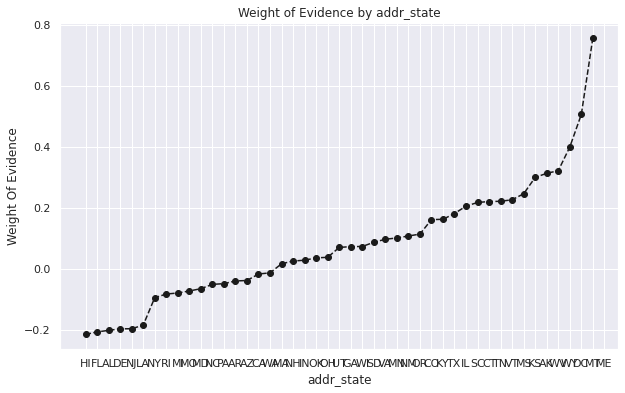

In [ ]:
#Let's focus on the other 46 states.We can do that by running our planning function on the results data frame again taking all rows except for the first two and the last two.
plot_by_woe(df_temp.iloc[2:-2, : ])

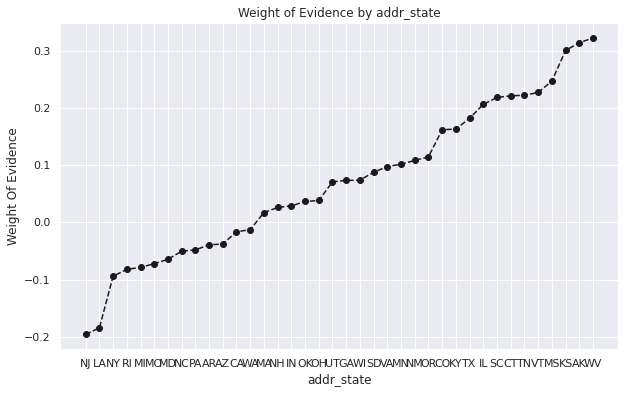

In [ ]:
#et's take a look at the remaining 38 states to get a better perspective.
plot_by_woe(df_temp.iloc[6:-6])

In [ ]:
#Combining the dummy variable of states
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing discrete variable like verification_status,purpose,initial_list_status

In [ ]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  33641   0.885616    0.360734  29793.0  3848.0   
1     Source Verified  29963   0.910990    0.321295  27296.0  2667.0   
2        Not Verified  29653   0.915287    0.317971  27141.0  2512.0   

   prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0     0.353710    0.426277 -0.186611             NaN       NaN  0.022632  
1     0.324065    0.295447  0.092455        0.025374  0.279066  0.022632  
2     0.322225    0.278276  0.146635        0.004297  0.054180  0.022632

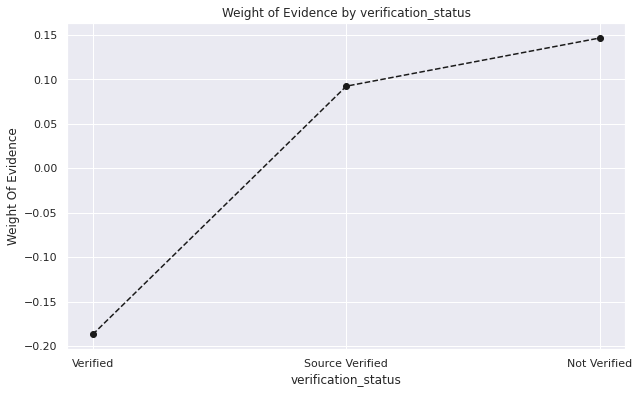

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational     89   0.752809    0.000954     67.0    22.0   
1     renewable_energy     70   0.771429    0.000751     54.0    16.0   
2       small_business   1431   0.789658    0.015345   1130.0   301.0   
3              medical    918   0.863834    0.009844    793.0   125.0   
4                house    439   0.870159    0.004707    382.0    57.0   
5                other   4806   0.872243    0.051535   4192.0   614.0   
6              wedding    456   0.875000    0.004890    399.0    57.0   
7             vacation    496   0.885081    0.005319    439.0    57.0   
8               moving    602   0.885382    0.006455    533.0    69.0   
9   debt_consolidation  55012   0.899676    0.589897  49493.0  5519.0   
10      major_purchase   1991   0.910598    0.021350   1813.0   178.0   
11    home_improvement   5299   0.917532    0.056821   4862.0   437.0   
12                 car   1072   0.925373    0.011495    992.0    80.0   
13         credit_card  20576   0.927343    0.220638  19081.0  1495.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.000795    0.002437 -1.119681             NaN       NaN  0.052699  
1      0.000641    0.001772 -1.016936        0.018620  0.102745  0.052699  
2      0.013416    0.033344 -0.910468        0.018229  0.106467  0.052699  
3      0.009415    0.013847 -0.385822        0.074177  0.524647  0.052699  
4      0.004535    0.006314 -0.330962        0.006325  0.054860  0.052699  
5      0.049768    0.068018 -0.312393        0.002084  0.018569  0.052699  
6      0.004737    0.006314 -0.287421        0.002757  0.024972  0.052699  
7      0.005212    0.006314 -0.191883        0.010081  0.095538  0.052699  
8      0.006328    0.007644 -0.188916        0.000301  0.002967  0.052699  
9      0.587593    0.611388 -0.039697        0.014294  0.149220  0.052699  
10     0.021524    0.019719  0.087624        0.010921  0.127320  0.052699  
11     0.057723    0.048410  0.175941        0.006934  0.088317  0.052699  
12     0.011777    0.008862  0.284365        0.007842  0.108425  0.052699  
13     0.226534    0.165614  0.313236        0.001969  0.028870  0.052699

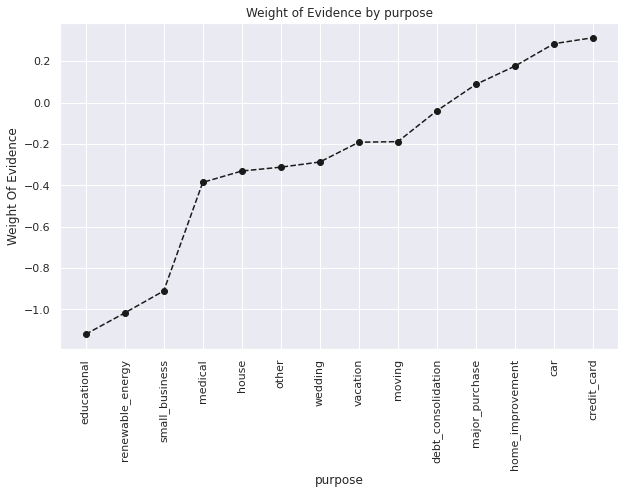

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [ ]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  60491   0.890992    0.648648  53897.0  6594.0   
1                   w  32766   0.925746    0.351352  30333.0  2433.0   

   prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0     0.639879    0.730475 -0.132416             NaN       NaN  0.038249  
1     0.360121    0.269525  0.289780        0.034754  0.422196  0.038249

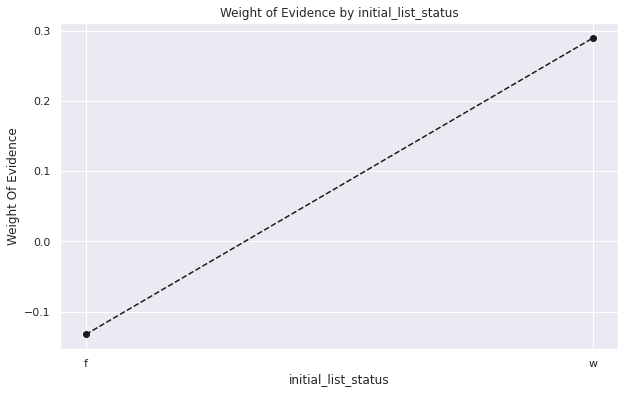

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

## Preprocessing Continuous Varables:Visualizing Results
We pre-process the original discrete variables in our data so it's time to do the same for the continuous variables.As you can probably remember the regulator requires the probability of default model to be easy to interpret,
so it must contain only dummy variables as predictive variables.
1. Discrete variables are split into categories as they come. That is they were fine classed then we course class them by evaluating the weights of evidence for the initial categories.
2. Now we have to do the same with the continuous variables with just one additional prior step.We have to split them into categories.
2. Later we are going to treat them just like the original categories of the discrete variables.
3. With that in mind let's try to structure our work for the continuous variables the same way we did for the discrete ones.
4. Suppose we have performed fine classing for a continuous variable and we have ended up with many categorical variables that encompass the whole range of values of the continuous variable.So we'll need to calculate weight of evidence for each category and plot the weights of evidence for all categories.Previously we performed these two tasks for the discrete variables using two functions.Why not go ahead and use the same functions here well, once continuous variable is split into categories.Things are certainly very similar.There is just one tiny difference in how we present information compared to the discrete variables.
5. The categories of discrete variable are simply different categories and that's the only thing that sets them apart.They don't show differences in terms of quantity.In fact they are just qualitatively different.For example the purpose of one loan can be to finance education while the purpose of another loan may be to buy a car.The two are directly comparable because they are qualitatively different.So the exact order of the categories of discrete variable doesn't matter.That's why when we calculated our results and plotted them we ordered the categories of discrete variables by their weight of evidence in order to group them more easily.
6. In contrast continuous variables show quantitative differences.For example an income of one hundred thousand dollars is more than an income of eighty thousand dollars.Consequently when we split a continuous variable into a number of categories these categories will also show differences in quantities.For example a category of annual income from eighty thousand dollars to ninety thousand dollars certainly includes lower annual incomes than a category of annual income from ninety thousand dollars to one hundred thousand dollars.That's why we will be ordering the continuous variables by their values not by their weight of evidence.
7. Thus we can easily use the code we wrote for the function to calculate weight of evidence for discrete variables and only make slight changes where needed.We can copy the code of the woe_discrete function.Let's rename the function to woe_ordered_continuous.
8. Let's assume the function takes a variable containing the categories of a continuous variable obtained via fine classing.If that's the case it should perform the exact same calculations.The only difference will appear right after the function calculates weight of evidence as we said we don't want the categories ordered by weight of evidence.Rather we want to preserve the natural order which is compliant with the ascending order of the values of the continuous independent variable.Hence we will comment out the sort_values method and the reset_index method and that is enough.We should leave the rest of the calculations the same. 
9. Accordingly the function returns a similar data frame with results containing weight of evidence for all initial categories from the continuous variable as far as plotting the results is concerned.
10. We don't really need anything else but the plot_by_woe function that we already have.As with the categories of the discrete variables it is going to do the same but the categories obtained from the continuous variables that are contained in the results data frame returned by the woe_ordered_continuous function.

In [ ]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df=pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df=pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df=df.iloc[:,[0,1,3]] #keeping only the first second and fourth columns
    df.columns=[df.columns.values[0],'n_obs','prop_good'] #Assign specific column names
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum() #Caculate the proportion of observations from the total number of observations
    df['n_good']=df['prop_good']*df['n_obs'] #Calculate the number of good borrowers
    df['n_bad']=(1-df['prop_good'])*df['n_obs'] #Calculate the number of bad borrowers
    df['prop_n_good']=df['n_good']/df['n_good'].sum() #Calculate the proportion of good borrowers from the total number of borrowers
    df['prop_n_bad']=df['n_bad']/df['n_bad'].sum() #Calculate the proportion of bad borrowers from the total number of borrowers
    df['WOE']=np.log(df['prop_n_good']/df['prop_n_bad']) #Calculate Weight Of Evidence
    #df=df.sort_values(['WOE']) #Sort by WOE and Reset the index
    #df=df.reset_index(drop=True) #Sort by WOE and Reset the index
    df['diff_prop_good']=df['prop_good'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['diff_WOE']=df['WOE'].diff().abs() #We calculate the differences in proportion of good loans and weight of evidence.
    df['IV']=(df['prop_n_good']-df['prop_n_bad'])*df['WOE'] #we find the information value.
    df['IV']=df['IV'].sum() #we find the information value.
    return df

### *Preprocessing the term input variable*

In [ ]:
df_inputs_prepr['term_int'].unique()

array([60, 36])

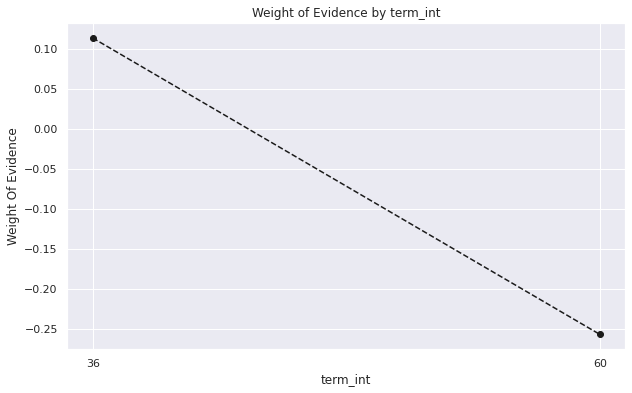

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
plot_by_woe(df_temp)

The above chart shows that 60 month loans are riskier than 36 month loans.The only thing we can do is keep two categories or dummy variables for the term in the final model; 36 and 60 months.Naturally the 60 month category will be the reference category.

In [ ]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

### Preprocessing employment length variable.

In [ ]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [ ]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  11553   0.889726    0.123883  10279.0  1274.0   
1              1.0   5968   0.905664    0.063995   5405.0   563.0   
2              2.0   8295   0.900422    0.088948   7469.0   826.0   
3              3.0   7391   0.900961    0.079254   6659.0   732.0   
4              4.0   5555   0.903510    0.059567   5019.0   536.0   
5              5.0   6172   0.896792    0.066183   5535.0   637.0   
6              6.0   5225   0.891675    0.056028   4659.0   566.0   
7              7.0   5131   0.903333    0.055020   4635.0   496.0   
8              8.0   4542   0.902026    0.048704   4097.0   445.0   
9              9.0   3621   0.902513    0.038828   3268.0   353.0   
10            10.0  29804   0.912797    0.319590  27205.0  2599.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.122035    0.141132 -0.145390             NaN       NaN  0.008283  
1      0.064170    0.062368  0.028469        0.015938  0.173859  0.008283  
2      0.088674    0.091503 -0.031409        0.005242  0.059878  0.008283  
3      0.079057    0.081090 -0.025387        0.000539  0.006022  0.008283  
4      0.059587    0.059377  0.003521        0.002550  0.028908  0.008283  
5      0.065713    0.070566 -0.071254        0.006718  0.074775  0.008283  
6      0.055313    0.062701 -0.125369        0.005117  0.054115  0.008283  
7      0.055028    0.054946  0.001484        0.011658  0.126854  0.008283  
8      0.048641    0.049297 -0.013395        0.001307  0.014880  0.008283  
9      0.038799    0.039105 -0.007866        0.000488  0.005529  0.008283  
10     0.322985    0.287914  0.114943        0.010284  0.122809  0.008283

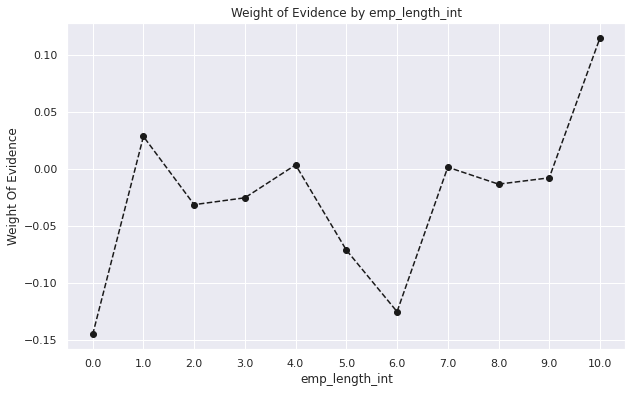

In [ ]:
plot_by_woe(df_temp)


Based on how the weight of evidence changes with employment length we can easily determine the categories for the PD model.There is more than one correct way to bundle them up but I'll show you the one I would choose.

1. The first category will be borrowers with zero year employment length.
2. The second category with one year employment length. 
3. You can see that weight of evidence hardly changes for employment length from 2 to 4 years.So that will be our third category.
4. Apparently weight of evidence is much lower for five years and almost the same between 5 and 6 years.So in the next category we can group employment length from 5 to 6 years.
5. Weight of evidence for 7 years is significantly higher compared to that for 6 years.Weight of evidence for 8 years is somewhat higher than for 7 but then the value for 9 years is almost equal to the one for 7.So it is not a bad idea to put employment length from 7 to 9 years in one category.
6. Alternatively we could create 3 different categories but normally we prefer fewer dummies.Finally employment length of 10 years or above most definitely belongs in a separate category as its weight of evidence is much higher compared to the rest of the categories.Moreover the number of observations falling into that category is about one third of all observations.
7. To finish the analysis of this variable we determine the riskiest group borrowers with zero years of employment are riskiest.So zero will be the reference category for the model.


In [ ]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

### Preprocesing the variable months since issue date.

We created it from the issue date of the loans available originally.This variable has about 90 distinct integer values on the one hand.These are not that many distinct values so we could easily treat them as categories and visualize them.In my opinion we can visualize everything with 100 or fewer categories and still make sense of it without getting lost.On the other hand it's much neater to work with less than 50 fine class categories when doing course classing.
1. Fine Classing:-Roughly grouping the values into categories.
2. Coarse Classing:-Determining final categories,combining few of the initial fine classing categories into bigger categories if needed.

In [ ]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [ ]:
df_inputs_prepr['mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mths_since_issue_d'],50)
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] < ... <
                                     (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] <
                                     (124.2, 126.0]]

In [ ]:
df_temp= woe_ordered_continuous(df_inputs_prepr,'mths_since_issue_d_factor',df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0              (35.91, 37.8]   7191   0.960645    0.077109  6908.0  283.0   
1               (37.8, 39.6]   9752   0.948113    0.104571  9246.0  506.0   
2               (39.6, 41.4]   9506   0.935199    0.101933  8890.0  616.0   
3               (41.4, 43.2]   7240   0.928591    0.077635  6723.0  517.0   
4               (43.2, 45.0]   7217   0.919219    0.077388  6634.0  583.0   
5               (45.0, 46.8]   3104   0.909472    0.033284  2823.0  281.0   
6               (46.8, 48.6]   6197   0.907859    0.066451  5626.0  571.0   
7               (48.6, 50.4]   5821   0.903625    0.062419  5260.0  561.0   
8               (50.4, 52.2]   5021   0.890460    0.053840  4471.0  550.0   
9               (52.2, 54.0]   4497   0.880142    0.048222  3958.0  539.0   
10              (54.0, 55.8]   2064   0.877907    0.022132  1812.0  252.0   
11              (55.8, 57.6]   3572   0.870381    0.038303  3109.0  463.0   
12              (57.6, 59.4]   2904   0.859504    0.031140  2496.0  408.0   
13              (59.4, 61.2]   2474   0.857720    0.026529  2122.0  352.0   
14              (61.2, 63.0]   2539   0.855849    0.027226  2173.0  366.0   
15              (63.0, 64.8]   1115   0.841256    0.011956   938.0  177.0   
16              (64.8, 66.6]   1721   0.819872    0.018454  1411.0  310.0   
17              (66.6, 68.4]   1296   0.852623    0.013897  1105.0  191.0   
18              (68.4, 70.2]   1097   0.840474    0.011763   922.0  175.0   
19              (70.2, 72.0]   1001   0.818182    0.010734   819.0  182.0   
20              (72.0, 73.8]    447   0.834452    0.004793   373.0   74.0   
21              (73.8, 75.6]    790   0.853165    0.008471   674.0  116.0   
22              (75.6, 77.4]    754   0.874005    0.008085   659.0   95.0   
23              (77.4, 79.2]    690   0.846377    0.007399   584.0  106.0   
24              (79.2, 81.0]    599   0.876461    0.006423   525.0   74.0   
25              (81.0, 82.8]    254   0.870079    0.002724   221.0   33.0   
26              (82.8, 84.6]    533   0.878049    0.005715   468.0   65.0   
27              (84.6, 86.4]    459   0.838780    0.004922   385.0   74.0   
28              (86.4, 88.2]    443   0.866817    0.004750   384.0   59.0   
29              (88.2, 90.0]    439   0.863326    0.004707   379.0   60.0   
30              (90.0, 91.8]    194   0.835052    0.002080   162.0   32.0   
31              (91.8, 93.6]    367   0.896458    0.003935   329.0   38.0   
32              (93.6, 95.4]    257   0.879377    0.002756   226.0   31.0   
33              (95.4, 97.2]    276   0.836957    0.002960   231.0   45.0   
34              (97.2, 99.0]    234   0.829060    0.002509   194.0   40.0   
35             (99.0, 100.8]    100   0.920000    0.001072    92.0    8.0   
36            (100.8, 102.6]    170   0.835294    0.001823   142.0   28.0   
37            (102.6, 104.4]    150   0.873333    0.001608   131.0   19.0   
38            (104.4, 106.2]    129   0.868217    0.001383   112.0   17.0   
39            (106.2, 108.0]    119   0.815126    0.001276    97.0   22.0   
40            (108.0, 109.8]     36   0.861111    0.000386    31.0    5.0   
41            (109.8, 111.6]     40   0.800000    0.000429    32.0    8.0   
42            (111.6, 113.4]     37   0.972973    0.000397    36.0    1.0   
43            (113.4, 115.2]     57   0.824561    0.000611    47.0   10.0   
44            (115.2, 117.0]    131   0.801527    0.001405   105.0   26.0   
45            (117.0, 118.8]     59   0.813559    0.000633    48.0   11.0   
46            (118.8, 120.6]     83   0.734940    0.000890    61.0   22.0   
47            (120.6, 122.4]     41   0.609756    0.000440    25.0   16.0   
48            (122.4, 124.2]     23   0.695652    0.000247    16.0    7.0   
49            (124.2, 126.0]     17   0.882353    0.000182    15.0    2.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE       IV  


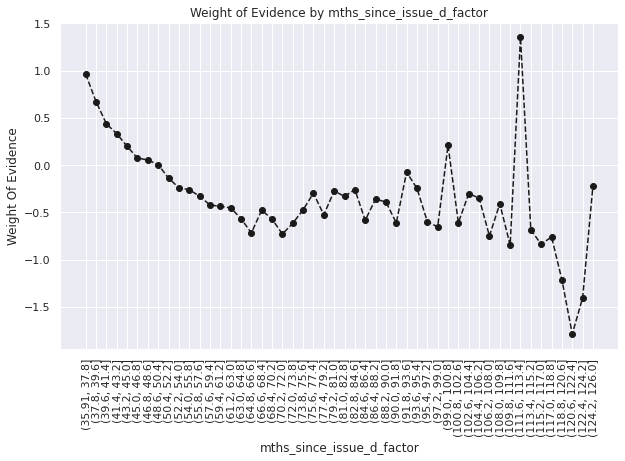

In [ ]:
plot_by_woe(df_temp,90)

Interpretation from WOE chart
1. We can start course classing the variable. The first the second and the third categories differ significantly in terms of weight of evidence from one another and from the following categories.Let's keep each of them as categories for the final model.Remember that the months since issue date variable takes integer values only.That means we can specify the limits of the dummy variables we create using only integer numbers.So for the first three categories we have one dummy variable **for months since issue date lower than 38**,another variable for months since issue day **between 38 and thirty nine months** and another variable for months since issue date **between 40 and 41**.These categories have rather high weights of evidence compared to the weights of evidence of most other categories.
2. The first four categories on the next graph have higher weights of evidence from the rest and their weight of evidence aren't that different.Let's create one dummy variable for all of them.So this dummy variable will be **from 42 to 48 months**.
3. Next we can group the next two categories together in one dummy variable **from 49 to 52 months**.
4. The seven following categories have similar weight of evidence so we can group them in the one dummy variable from **53 to 64 months** since issue date 
5. If you remember apart from the weight of evidence value, sanother important determinant was the number of observations that fall into a given category.If we check out the remaining categories we can notice that they contain a very small number of observations altogether.In fact this is the reason why their weights of evidence vary a lot.So even if you have forgotten to check the number of observations that fall into each category such a plot can serve as a red flag for you whenever you see a WOE plot that goes up and down like this you must make sure to check the number of observations in the respective categories.
6. So we know that these intervals refer to only a small portion of our data.
Therefore we could create only one dummy variable for all of them.That is one way to deal with it.However I prefer to cut here at **84 months** since issue day so there will be one dummy variable for **65 to 84 months** since issue date and another one for more than **84 months** since issue date. 


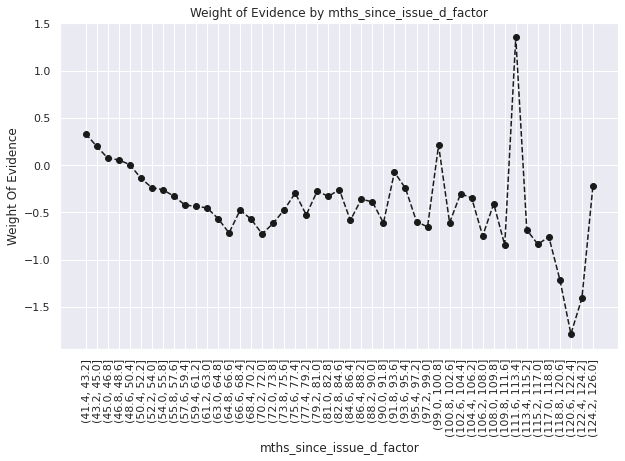

In [ ]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [ ]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

### Preprocessing the interest rate variable.

In [ ]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    198   0.969697    0.002123   192.0    6.0   
1     (5.833, 6.246]   2086   0.980345    0.022368  2045.0   41.0   
2     (6.246, 6.658]   1974   0.975177    0.021167  1925.0   49.0   
3     (6.658, 7.071]    477   0.949686    0.005115   453.0   24.0   
4     (7.071, 7.484]    804   0.983831    0.008621   791.0   13.0   
5     (7.484, 7.897]   3245   0.968259    0.034796  3142.0  103.0   
6      (7.897, 8.31]   2429   0.955537    0.026046  2321.0  108.0   
7      (8.31, 8.722]   1680   0.970833    0.018015  1631.0   49.0   
8     (8.722, 9.135]   2384   0.947567    0.025564  2259.0  125.0   
9     (9.135, 9.548]   1590   0.983648    0.017050  1564.0   26.0   
10    (9.548, 9.961]   1881   0.933014    0.020170  1755.0  126.0   
11   (9.961, 10.374]   2766   0.943601    0.029660  2610.0  156.0   
12  (10.374, 10.786]   1390   0.923741    0.014905  1284.0  106.0   
13  (10.786, 11.199]   4464   0.947357    0.047868  4229.0  235.0   
14  (11.199, 11.612]   1213   0.922506    0.013007  1119.0   94.0   
15  (11.612, 12.025]   3737   0.942467    0.040072  3522.0  215.0   
16  (12.025, 12.438]   3077   0.909327    0.032995  2798.0  279.0   
17   (12.438, 12.85]   2754   0.932825    0.029531  2569.0  185.0   
18   (12.85, 13.263]   5440   0.913971    0.058333  4972.0  468.0   
19  (13.263, 13.676]   3806   0.913032    0.040812  3475.0  331.0   
20  (13.676, 14.089]   2692   0.907875    0.028866  2444.0  248.0   
21  (14.089, 14.502]   5760   0.898090    0.061765  5173.0  587.0   
22  (14.502, 14.914]   1187   0.877843    0.012728  1042.0  145.0   
23  (14.914, 15.327]   4811   0.892954    0.051589  4296.0  515.0   
24   (15.327, 15.74]   3146   0.907184    0.033735  2854.0  292.0   
25   (15.74, 16.153]   1869   0.846442    0.020041  1582.0  287.0   
26  (16.153, 16.566]   3230   0.868111    0.034635  2804.0  426.0   
27  (16.566, 16.978]   1035   0.868599    0.011098   899.0  136.0   
28  (16.978, 17.391]   2843   0.873373    0.030486  2483.0  360.0   
29  (17.391, 17.804]   2992   0.852607    0.032083  2551.0  441.0   
30  (17.804, 18.217]    286   0.849650    0.003067   243.0   43.0   
31   (18.217, 18.63]   2729   0.847930    0.029263  2314.0  415.0   
32   (18.63, 19.042]   1835   0.840872    0.019677  1543.0  292.0   
33  (19.042, 19.455]   1135   0.811454    0.012171   921.0  214.0   
34  (19.455, 19.868]   1680   0.845238    0.018015  1420.0  260.0   
35  (19.868, 20.281]   1244   0.872186    0.013339  1085.0  159.0   
36  (20.281, 20.694]    805   0.827329    0.008632   666.0  139.0   
37  (20.694, 21.106]    956   0.813808    0.010251   778.0  178.0   
38  (21.106, 21.519]    701   0.774608    0.007517   543.0  158.0   
39  (21.519, 21.932]    222   0.792793    0.002381   176.0   46.0   
40  (21.932, 22.345]    832   0.802885    0.008922   668.0  164.0   
41  (22.345, 22.758]    586   0.776451    0.006284   455.0  131.0   
42   (22.758, 23.17]    375   0.762667    0.004021   286.0   89.0   
43   (23.17, 23.583]    655   0.804580    0.007024   527.0  128.0   
44  (23.583, 23.996]    408   0.762255    0.004375   311.0   97.0   
45  (23.996, 24.409]    393   0.867684    0.004214   341.0   52.0   
46  (24.409, 24.822]    436   0.814220    0.004675   355.0   81.0   
47  (24.822, 25.234]    351   0.831909    0.003764   292.0   59.0   
48  (25.234, 25.647]    194   0.793814    0.002080   154.0   40.0   
49   (25.647, 26.06]    474   0.776371    0.005083   368.0  106.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0      0.002279    0.000665  1.232405             NaN       NaN  0.364404  
1      0.024279    0.004542  1.676250        0.010648  0.443845  0.364404  
2      0.022854    0.005428  1.437530        0.005168  0.238720  0.364404  
3      0.005378    0.002659  0.704507        0.025492  0.733023  0.364404  
4      0.009391    0.001440  1.875018        0.034145  1.170510  0.364404  
5      0.037303    0.011410  

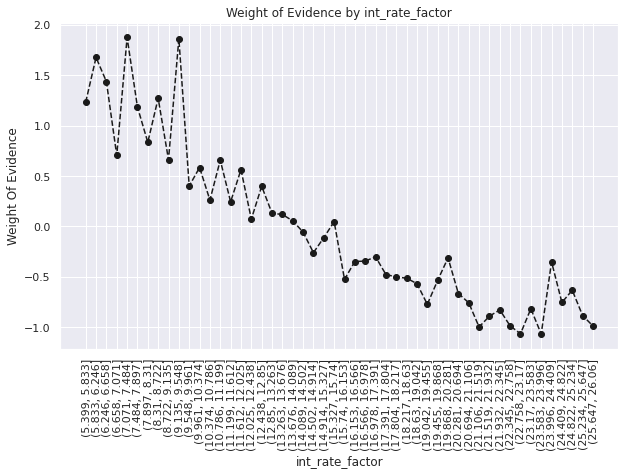

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

As we can see on the graph the relationship between interest rate and weight of evidence is almost monotonic.
1. The greater the interest rate the lower the weight of evidence and the higher the probability of default.
2. The presence of a monotonic relationship makes it somehow easier to determine the boundaries of the intervals.It doesn't matter as much where they are as the next interval is almost certainly going to have lower weight of evidence than the previous.
3. Let's bundle them up.The numerous ups and downs in the first 10 observations that the graph points us to look at the number of their observations.Weight of evidence is somewhat higher for them but they don't have too many observations.
So let's bundle them in one dummy.The cutoff point between the 10th and the 11th category is 9.548.So the first dummy variable will include observations with interest rate lower than or equal to 9.548%.
4. Then weight of evidence decreases more significantly here at 12.025%
Therefore the second dummy variable will be for observations with interest rate greater than 9.548% and lower than or equal to 12.025%.
5. The next point where weight of evidence differ significantly compared to the previous categories is here at 15.74%.So the next dummy variable will be for everything greater than 12.025% and lower than or equal to 15.74%.
6. The next kind of point is a 20.281%.Accordingly the next dummy variable will be for everything greater than 15.74% and lower than or equal to 20.281%.
7. We can't really say that there are such big differences in weights of evidence after 20.281%.Besides each of these categories has a rather low number of observations so it makes sense to group them in one dummy everything greater than 20.281% 

In [ ]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

### Preprocessing the funded_amnt

In [ ]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (465.5, 1190.0]    319   0.887147    0.003421   283.0   36.0   
1     (1190.0, 1880.0]    800   0.897500    0.008578   718.0   82.0   
2     (1880.0, 2570.0]   1513   0.908130    0.016224  1374.0  139.0   
3     (2570.0, 3260.0]   1817   0.900385    0.019484  1636.0  181.0   
4     (3260.0, 3950.0]   1245   0.907631    0.013350  1130.0  115.0   
5     (3950.0, 4640.0]   2298   0.893386    0.024642  2053.0  245.0   
6     (4640.0, 5330.0]   3957   0.906242    0.042431  3586.0  371.0   
7     (5330.0, 6020.0]   4186   0.915671    0.044887  3833.0  353.0   
8     (6020.0, 6710.0]   1718   0.891735    0.018422  1532.0  186.0   
9     (6710.0, 7400.0]   2880   0.906597    0.030882  2611.0  269.0   
10    (7400.0, 8090.0]   4266   0.906001    0.045745  3865.0  401.0   
11    (8090.0, 8780.0]   1617   0.897959    0.017339  1452.0  165.0   
12    (8780.0, 9470.0]   2320   0.898707    0.024877  2085.0  235.0   
13   (9470.0, 10160.0]   8552   0.903999    0.091704  7731.0  821.0   
14  (10160.0, 10850.0]   1642   0.889769    0.017607  1461.0  181.0   
15  (10850.0, 11540.0]   2091   0.897178    0.022422  1876.0  215.0   
16  (11540.0, 12230.0]   5767   0.916594    0.061840  5286.0  481.0   
17  (12230.0, 12920.0]   1228   0.887622    0.013168  1090.0  138.0   
18  (12920.0, 13610.0]   1860   0.911828    0.019945  1696.0  164.0   
19  (13610.0, 14300.0]   2087   0.910398    0.022379  1900.0  187.0   
20  (14300.0, 14990.0]   1255   0.907570    0.013457  1139.0  116.0   
21  (14990.0, 15680.0]   5441   0.914538    0.058344  4976.0  465.0   
22  (15680.0, 16370.0]   2920   0.900342    0.031311  2629.0  291.0   
23  (16370.0, 17060.0]   1625   0.896615    0.017425  1457.0  168.0   
24  (17060.0, 17750.0]    921   0.863192    0.009876   795.0  126.0   
25  (17750.0, 18440.0]   2898   0.897170    0.031075  2600.0  298.0   
26  (18440.0, 19130.0]    989   0.871587    0.010605   862.0  127.0   
27  (19130.0, 19820.0]   1057   0.891202    0.011334   942.0  115.0   
28  (19820.0, 20510.0]   5055   0.909792    0.054205  4599.0  456.0   
29  (20510.0, 21200.0]   1635   0.909480    0.017532  1487.0  148.0   
30  (21200.0, 21890.0]    476   0.859244    0.005104   409.0   67.0   
31  (21890.0, 22580.0]   1028   0.896887    0.011023   922.0  106.0   
32  (22580.0, 23270.0]    633   0.903633    0.006788   572.0   61.0   
33  (23270.0, 23960.0]    497   0.853119    0.005329   424.0   73.0   
34  (23960.0, 24650.0]   2491   0.913689    0.026711  2276.0  215.0   
35  (24650.0, 25340.0]   2500   0.913600    0.026808  2284.0  216.0   
36  (25340.0, 26030.0]    487   0.872690    0.005222   425.0   62.0   
37  (26030.0, 26720.0]    299   0.839465    0.003206   251.0   48.0   
38  (26720.0, 27410.0]    410   0.887805    0.004396   364.0   46.0   
39  (27410.0, 28100.0]   1604   0.910848    0.017200  1461.0  143.0   
40  (28100.0, 28790.0]    204   0.877451    0.002188   179.0   25.0   
41  (28790.0, 29480.0]    286   0.849650    0.003067   243.0   43.0   
42  (29480.0, 30170.0]   1762   0.893871    0.018894  1575.0  187.0   
43  (30170.0, 30860.0]    133   0.842105    0.001426   112.0   21.0   
44  (30860.0, 31550.0]    218   0.844037    0.002338   184.0   34.0   
45  (31550.0, 32240.0]    367   0.937330    0.003935   344.0   23.0   
46  (32240.0, 32930.0]    139   0.920863    0.001491   128.0   11.0   
47  (32930.0, 33620.0]    275   0.909091    0.002949   250.0   25.0   
48  (33620.0, 34310.0]    142   0.908451    0.001523   129.0   13.0   
49  (34310.0, 35000.0]   3347   0.900508    0.035890  3014.0  333.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE     IV  
0      0.003360    0.003988 -0.171403             NaN       NaN  0.019  
1      0.008524    0.009084 -0.063581        0.010353  0.107822  0.019  
2      0.016312    0.015398  0.057676        0.010630  0.121257  0.019  
3      0.019423    0.020051 -0.031819        0.007744  0.089495  0.019  
4      0.013416  

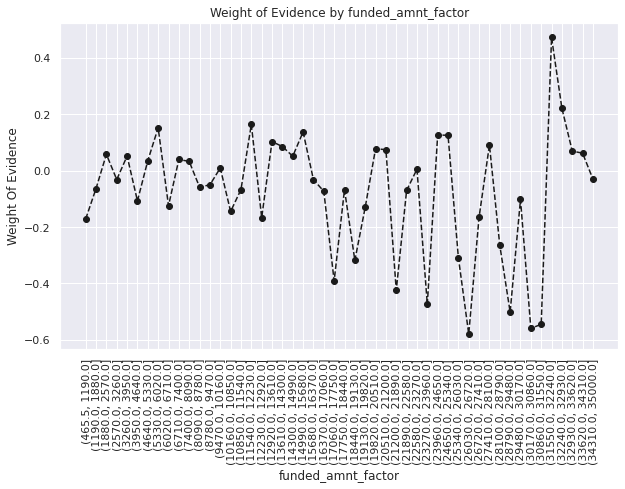

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

1. The chart shows the consecutive intervals of the variable have very different weights of evidence at the same time.It seems that all of these variations are around a trend that is almost horizontal.
2. There is no other clear pattern of dependence between the independent variable and weight of evidence.In other words weight of evidence varies greatly and there seems to be no association whatsoever with the independent variable.This is sufficient reason to make the decision not to use the funded amount variable in our PD model.

So there will be no need for us to create dummy variables.

### Preprocessing the mnths_since_earliest_cr_line

In [ ]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mnths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                      (-0.587, 11.74]      5   1.000000    0.000054     5.0   
1                       (11.74, 23.48]      0        NaN    0.000000     NaN   
2                       (23.48, 35.22]      0        NaN    0.000000     NaN   
3                       (35.22, 46.96]      0        NaN    0.000000     NaN   
4                        (46.96, 58.7]      0        NaN    0.000000     NaN   
5                        (58.7, 70.44]      0        NaN    0.000000     NaN   
6                       (70.44, 82.18]    182   0.945055    0.001952   172.0   
7                       (82.18, 93.92]    508   0.927165    0.005447   471.0   
8                      (93.92, 105.66]    715   0.881119    0.007667   630.0   
9                      (105.66, 117.4]   1268   0.870662    0.013597  1104.0   
10                     (117.4, 129.14]   2314   0.890666    0.024813  2061.0   
11                    (129.14, 140.88]   2816   0.876420    0.030196  2468.0   
12                    (140.88, 152.62]   3366   0.895425    0.036094  3014.0   
13                    (152.62, 164.36]   3989   0.896716    0.042774  3577.0   
14                     (164.36, 176.1]   4857   0.897468    0.052082  4359.0   
15                     (176.1, 187.84]   5076   0.906028    0.054430  4599.0   
16                    (187.84, 199.58]   6578   0.898297    0.070536  5909.0   
17                    (199.58, 211.32]   7131   0.900435    0.076466  6421.0   
18                    (211.32, 223.06]   6775   0.895941    0.072649  6070.0   
19                     (223.06, 234.8]   5521   0.901286    0.059202  4976.0   
20                     (234.8, 246.54]   4966   0.897704    0.053251  4458.0   
21                    (246.54, 258.28]   4549   0.903715    0.048779  4111.0   
22                    (258.28, 270.02]   4472   0.904293    0.047954  4044.0   
23                    (270.02, 281.76]   3672   0.908497    0.039375  3336.0   
24                     (281.76, 293.5]   3640   0.909066    0.039032  3309.0   
25                     (293.5, 305.24]   2602   0.913912    0.027901  2378.0   
26                    (305.24, 316.98]   1988   0.915996    0.021317  1821.0   
27                    (316.98, 328.72]   2020   0.913861    0.021661  1846.0   
28                    (328.72, 340.46]   2129   0.912635    0.022829  1943.0   
29                     (340.46, 352.2]   1810   0.916022    0.019409  1658.0   
30                     (352.2, 363.94]   1477   0.924171    0.015838  1365.0   
31                    (363.94, 375.68]   1360   0.920588    0.014583  1252.0   
32                    (375.68, 387.42]   1152   0.919271    0.012353  1059.0   
33                    (387.42, 399.16]   1051   0.908658    0.011270   955.0   
34                     (399.16, 410.9]    826   0.927361    0.008857   766.0   
35                     (410.9, 422.64]    808   0.934406    0.008664   755.0   
36                    (422.64, 434.38]    524   0.908397    0.005619   476.0   
37                    (434.38, 446.12]    416   0.923077    0.004461   384.0   
38                    (446.12, 457.86]    329   0.920973    0.003528   303.0   
39                     (457.86, 469.6]    376   0.928191    0.004032   349.0   
40                     (469.6, 481.34]    371   0.929919    0.003978   345.0   
41                    (481.34, 493.08]    294   0.914966    0.003153   269.0   
42                    (493.08, 504.82]    229   0.947598    0.002456   217.0   
43                    (504.82, 516.56]    178   0.915730    0.001909   163.0   
44                     (516.56, 528.3]    159   0.937107    0.001705   149.0   
45                     (528.3, 540.04]    140   0.914286    0.001501   128.0   
46                    (540.04, 551.78]    135   0.903704    0.001448   122.0   
47                    (551.78, 563.52]     93   0.924731    0.000997    86.0   
48                    (563.52, 575.26]     80   0.900000    0.000858    72.0   
49 

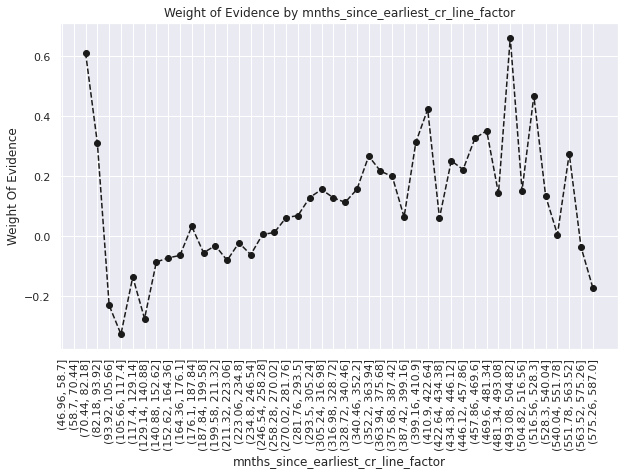

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

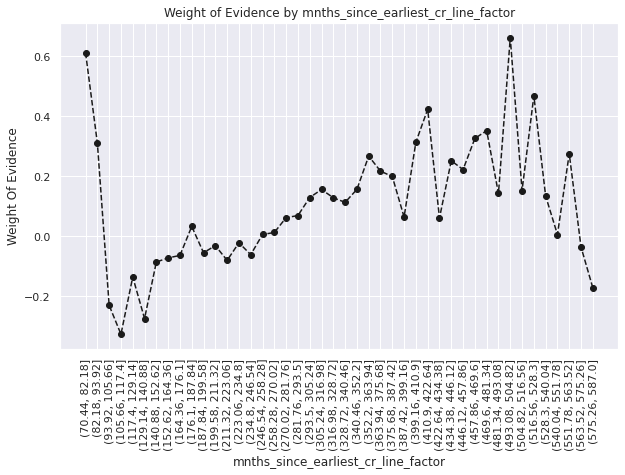

In [ ]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [ ]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mnths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mnths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mnths_since_earliest_cr_line'].max()))), 1, 0)

### Preprocesing the delinq_2yrs

In [ ]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0           0.0  76566   0.902646    0.821021  69112.0  7454.0     0.820515   
1           1.0  11297   0.905727    0.121138  10232.0  1065.0     0.121477   
2           2.0   3192   0.901942    0.034228   2879.0   313.0     0.034180   
3           3.0   1134   0.914462    0.012160   1037.0    97.0     0.012312   
4           4.0    510   0.905882    0.005469    462.0    48.0     0.005485   
5           5.0    270   0.922222    0.002895    249.0    21.0     0.002956   
6           6.0    128   0.882812    0.001373    113.0    15.0     0.001342   
7           7.0     67   0.910448    0.000718     61.0     6.0     0.000724   
8           8.0     29   0.896552    0.000311     26.0     3.0     0.000309   
9           9.0     22   0.954545    0.000236     21.0     1.0     0.000249   
10         10.0      9   0.888889    0.000097      8.0     1.0     0.000095   
11         11.0     10   1.000000    0.000107     10.0     0.0     0.000119   
12         12.0      8   0.750000    0.000086      6.0     2.0     0.000071   
13         13.0      7   1.000000    0.000075      7.0     0.0     0.000083   
14         14.0      2   0.500000    0.000021      1.0     1.0     0.000012   
15         15.0      1   1.000000    0.000011      1.0     0.0     0.000012   
16         16.0      1   1.000000    0.000011      1.0     0.0     0.000012   
17         18.0      3   1.000000    0.000032      3.0     0.0     0.000036   
18         19.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.825745 -0.006353             NaN       NaN  inf  
1     0.117979  0.029214        0.003081  0.035568  inf  
2     0.034674 -0.014336        0.003785  0.043550  inf  
3     0.010746  0.136045        0.012520  0.150381  inf  
4     0.005317  0.031033        0.008580  0.105012  inf  
5     0.002326  0.239599        0.016340  0.208567  inf  
6     0.001662 -0.213993        0.039410  0.453593  inf  
7     0.000665  0.085783        0.027635  0.299777  inf  
8     0.000332 -0.073847        0.013896  0.159630  inf  
9     0.000111  0.811191        0.057994  0.885038  inf  
10    0.000111 -0.153890        0.065657  0.965081  inf  
11    0.000000       inf        0.111111       inf  inf  
12    0.000222 -1.134719        0.250000       inf  inf  
13    0.000000       inf        0.250000       inf  inf  
14    0.000111 -2.233331        0.500000       inf  inf  
15    0.000000       inf        0.500000       inf  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf

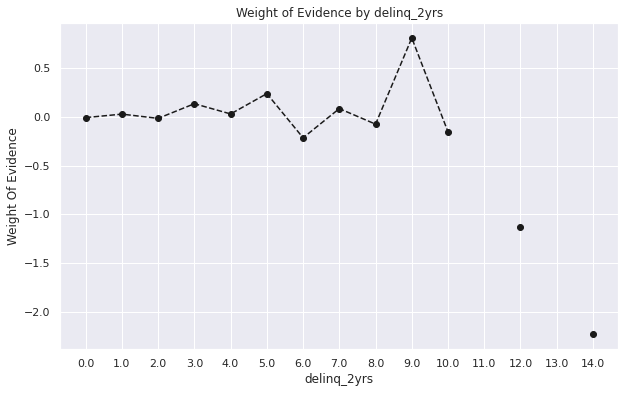

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

### Preprocessing the inq_last_6mths

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  48295   0.921627    0.517870  44510.0  3785.0   
1              1.0  25985   0.896363    0.278639  23292.0  2693.0   
2              2.0  11611   0.875205    0.124505  10162.0  1449.0   
3              3.0   5086   0.856272    0.054537   4355.0   731.0   
4              4.0   1431   0.856744    0.015345   1226.0   205.0   
5              5.0    551   0.843920    0.005908    465.0    86.0   
6              6.0    211   0.796209    0.002263    168.0    43.0   
7              7.0     36   0.527778    0.000386     19.0    17.0   
8              8.0     21   0.523810    0.000225     11.0    10.0   
9              9.0      7   0.428571    0.000075      3.0     4.0   
10            10.0      7   0.857143    0.000075      6.0     1.0   
11            11.0      7   1.000000    0.000075      7.0     0.0   
12            12.0      3   1.000000    0.000032      3.0     0.0   
13            13.0      1   0.000000    0.000011      0.0     1.0   
14            14.0      1   0.000000    0.000011      0.0     1.0   
15            18.0      2   0.500000    0.000021      1.0     1.0   
16            19.0      1   1.000000    0.000011      1.0     0.0   
17            24.0      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.528434    0.419298  0.231337             NaN       NaN  inf  
1      0.276529    0.298327 -0.075877        0.025264  0.307214  inf  
2      0.120646    0.160518 -0.285549        0.021159  0.209673  inf  
3      0.051704    0.080979 -0.448665        0.018932  0.163115  inf  
4      0.014555    0.022710 -0.444829        0.000471  0.003836  inf  
5      0.005521    0.009527 -0.545641        0.012823  0.100812  inf  
6      0.001995    0.004763 -0.870567        0.047712  0.324926  inf  
7      0.000226    0.001883 -2.122105        0.268431  1.251538  inf  
8      0.000131    0.001108 -2.138021        0.003968  0.015915  inf  
9      0.000036    0.000443 -2.521013        0.095238  0.382992  inf  
10     0.000071    0.000111 -0.441572        0.428571  2.079442  inf  
11     0.000083    0.000000       inf        0.142857       inf  inf  
12     0.000036    0.000000       inf        0.000000       NaN  inf  
13     0.000000    0.000111      -inf        1.000000       inf  inf  
14     0.000000    0.000111      -inf        0.000000       NaN  inf  
15     0.000012    0.000111 -2.233331        0.500000       inf  inf  
16     0.000012    0.000000       inf        0.500000       inf  inf  
17     0.000012    0.000000       inf        0.000000       NaN  inf

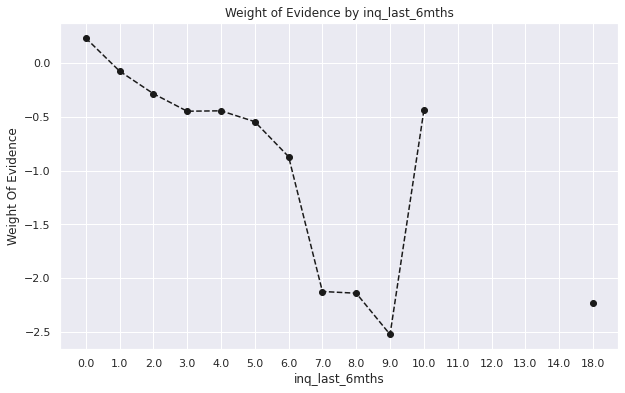

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

### Preprocessing the 'open_acc' 

In [ ]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


open_acc  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0        0.0      7   1.000000    0.000075     7.0    0.0     0.000083   
1        1.0     32   0.937500    0.000343    30.0    2.0     0.000356   
2        2.0    334   0.841317    0.003582   281.0   53.0     0.003336   
3        3.0   1122   0.861854    0.012031   967.0  155.0     0.011480   
4        4.0   2560   0.899219    0.027451  2302.0  258.0     0.027330   
5        5.0   4403   0.901431    0.047214  3969.0  434.0     0.047121   
6        6.0   6216   0.901062    0.066655  5601.0  615.0     0.066496   
7        7.0   7433   0.898830    0.079704  6681.0  752.0     0.079319   
8        8.0   8314   0.906062    0.089151  7533.0  781.0     0.089434   
9        9.0   8768   0.901688    0.094020  7906.0  862.0     0.093862   
10      10.0   8576   0.898554    0.091961  7706.0  870.0     0.091488   
11      11.0   7740   0.907106    0.082996  7021.0  719.0     0.083355   
12      12.0   6886   0.902411    0.073839  6214.0  672.0     0.073774   
13      13.0   5914   0.904295    0.063416  5348.0  566.0     0.063493   
14      14.0   4960   0.908669    0.053186  4507.0  453.0     0.053508   
15      15.0   4006   0.904893    0.042957  3625.0  381.0     0.043037   
16      16.0   3269   0.910370    0.035054  2976.0  293.0     0.035332   
17      17.0   2680   0.902612    0.028738  2419.0  261.0     0.028719   
18      18.0   2259   0.915007    0.024223  2067.0  192.0     0.024540   
19      19.0   1811   0.911651    0.019419  1651.0  160.0     0.019601   
20      20.0   1444   0.907895    0.015484  1311.0  133.0     0.015565   
21      21.0   1037   0.903568    0.011120   937.0  100.0     0.011124   
22      22.0    784   0.905612    0.008407   710.0   74.0     0.008429   
23      23.0    628   0.918790    0.006734   577.0   51.0     0.006850   
24      24.0    473   0.904863    0.005072   428.0   45.0     0.005081   
25      25.0    391   0.897698    0.004193   351.0   40.0     0.004167   
26      26.0    250   0.916000    0.002681   229.0   21.0     0.002719   
27      27.0    204   0.921569    0.002188   188.0   16.0     0.002232   
28      28.0    153   0.908497    0.001641   139.0   14.0     0.001650   
29      29.0    128   0.890625    0.001373   114.0   14.0     0.001353   
30      30.0    107   0.934579    0.001147   100.0    7.0     0.001187   
31      31.0     73   0.904110    0.000783    66.0    7.0     0.000784   
32      32.0     62   0.951613    0.000665    59.0    3.0     0.000700   
33      33.0     47   0.893617    0.000504    42.0    5.0     0.000499   
34      34.0     40   0.825000    0.000429    33.0    7.0     0.000392   
35      35.0     33   0.969697    0.000354    32.0    1.0     0.000380   
36      36.0     22   0.863636    0.000236    19.0    3.0     0.000226   
37      37.0     21   0.904762    0.000225    19.0    2.0     0.000226   
38      38.0     14   0.928571    0.000150    13.0    1.0     0.000154   
39      39.0     12   0.916667    0.000129    11.0    1.0     0.000131   
40      40.0      9   0.666667    0.000097     6.0    3.0     0.000071   
41      41.0      6   1.000000    0.000064     6.0    0.0     0.000071   
42      42.0      7   1.000000    0.000075     7.0    0.0     0.000083   
43      43.0      4   1.000000    0.000043     4.0    0.0     0.000047   
44      45.0      4   1.000000    0.000043     4.0    0.0     0.000047   
45      46.0      2   1.000000    0.000021     2.0    0.0     0.000024   
46      48.0      2   1.000000    0.000021     2.0    0.0     0.000024   
47      49.0      2   1.000000    0.000021     2.0    0.0     0.000024   
48      50.0      1   1.000000    0.000011     1.0    0.0     0.000012   
49      52.0      1   1.000000    0.000011     1.0    0.0     0.000012   
50      53.0      2   1.000000    0.000021     2.0    0.0     0.000024   
51      58.0      3   1.000000    0.000032     3.0    0.0     0.000036   
52      61.0      1   1.000000    0.000011     1.0    0.0     0.000012   

    pro

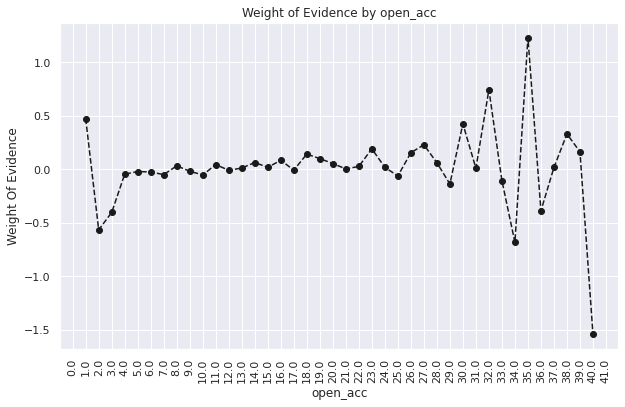

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

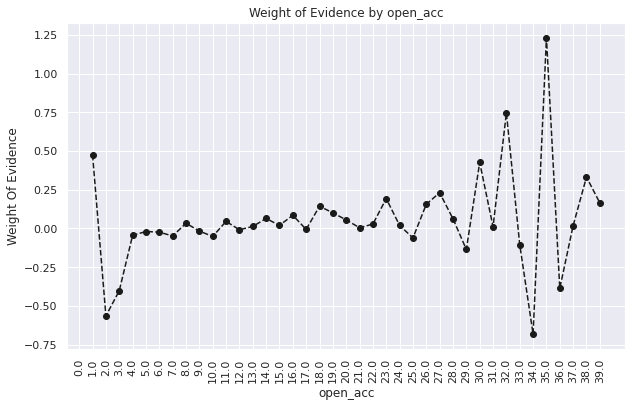

In [ ]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

### Processing the 'pub_rec'.

In [ ]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


pub_rec  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0       0.0  80923   0.901412    0.867742  72945.0  7978.0     0.866022   
1       1.0  10670   0.914902    0.114415   9762.0   908.0     0.115897   
2       2.0   1097   0.917046    0.011763   1006.0    91.0     0.011943   
3       3.0    331   0.924471    0.003549    306.0    25.0     0.003633   
4       4.0    112   0.857143    0.001201     96.0    16.0     0.001140   
5       5.0     73   0.917808    0.000783     67.0     6.0     0.000795   
6       6.0     19   1.000000    0.000204     19.0     0.0     0.000226   
7       7.0     14   0.785714    0.000150     11.0     3.0     0.000131   
8       8.0      5   1.000000    0.000054      5.0     0.0     0.000059   
9       9.0      2   1.000000    0.000021      2.0     0.0     0.000024   
10     10.0      3   1.000000    0.000032      3.0     0.0     0.000036   
11     11.0      5   1.000000    0.000054      5.0     0.0     0.000059   
12     12.0      1   1.000000    0.000011      1.0     0.0     0.000012   
13     14.0      1   1.000000    0.000011      1.0     0.0     0.000012   
14     49.0      1   1.000000    0.000011      1.0     0.0     0.000012   

    prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0     0.883793 -0.020313             NaN       NaN  inf  
1     0.100587  0.141677        0.013489  0.161990  inf  
2     0.010081  0.169547        0.002145  0.027870  inf  
3     0.002769  0.271378        0.007425  0.101831  inf  
4     0.001772 -0.441572        0.067328  0.712950  inf  
5     0.000665  0.179602        0.060665  0.621174  inf  
6     0.000000       inf        0.082192       inf  inf  
7     0.000332 -0.934048        0.214286       inf  inf  
8     0.000000       inf        0.214286       inf  inf  
9     0.000000       inf        0.000000       NaN  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

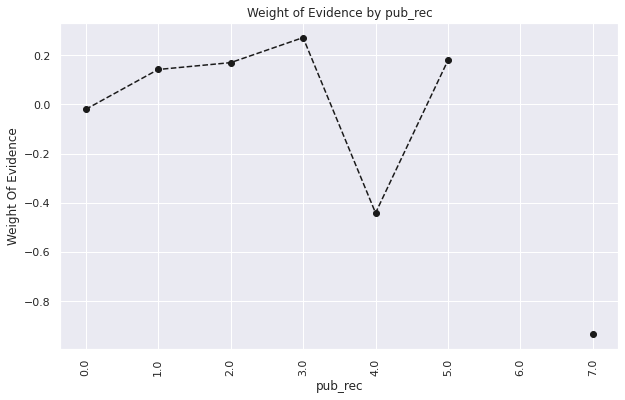

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

### Preprocessing the 'total_acc'

In [ ]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    125   0.784000    0.001340     98.0    27.0   
1       (3.12, 6.24]   1499   0.865911    0.016074   1298.0   201.0   
2       (6.24, 9.36]   3715   0.884522    0.039836   3286.0   429.0   
3      (9.36, 12.48]   6288   0.889313    0.067427   5592.0   696.0   
4      (12.48, 15.6]   8289   0.900832    0.088883   7467.0   822.0   
5      (15.6, 18.72]   9843   0.901351    0.105547   8872.0   971.0   
6     (18.72, 21.84]  10270   0.904869    0.110126   9293.0   977.0   
7     (21.84, 24.96]   9971   0.905827    0.106920   9032.0   939.0   
8     (24.96, 28.08]  11873   0.904995    0.127315  10745.0  1128.0   
9      (28.08, 31.2]   7289   0.904925    0.078160   6596.0   693.0   
10     (31.2, 34.32]   6151   0.913022    0.065958   5616.0   535.0   
11    (34.32, 37.44]   4745   0.916333    0.050881   4348.0   397.0   
12    (37.44, 40.56]   3615   0.912033    0.038764   3297.0   318.0   
13    (40.56, 43.68]   2883   0.904613    0.030915   2608.0   275.0   
14     (43.68, 46.8]   1938   0.901445    0.020781   1747.0   191.0   
15     (46.8, 49.92]   1478   0.922192    0.015849   1363.0   115.0   
16    (49.92, 53.04]   1309   0.912147    0.014036   1194.0   115.0   
17    (53.04, 56.16]    640   0.920312    0.006863    589.0    51.0   
18    (56.16, 59.28]    428   0.885514    0.004589    379.0    49.0   
19     (59.28, 62.4]    386   0.891192    0.004139    344.0    42.0   
20     (62.4, 65.52]    322   0.866460    0.003453    279.0    43.0   
21    (65.52, 68.64]     57   0.982456    0.000611     56.0     1.0   
22    (68.64, 71.76]     43   0.930233    0.000461     40.0     3.0   
23    (71.76, 74.88]     24   1.000000    0.000257     24.0     0.0   
24     (74.88, 78.0]     26   0.923077    0.000279     24.0     2.0   
25     (78.0, 81.12]     13   0.769231    0.000139     10.0     3.0   
26    (81.12, 84.24]     11   0.909091    0.000118     10.0     1.0   
27    (84.24, 87.36]      8   0.875000    0.000086      7.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000064      5.0     1.0   
29     (90.48, 93.6]      7   0.857143    0.000075      6.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000011      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000032      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      0        NaN    0.000000      NaN     NaN   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000011      1.0     0.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.001163    0.002991 -0.944200             NaN       NaN  inf  
1      0.015410    0.022267 -0.368056        0.081911  0.576144  inf  
2      0.039012    0.047524 -0.197362        0.018612  0.170694  inf  
3      0.066390    0.077102 -0.149588        0.004791  0.047773  inf  
4      0.088650    0.091060

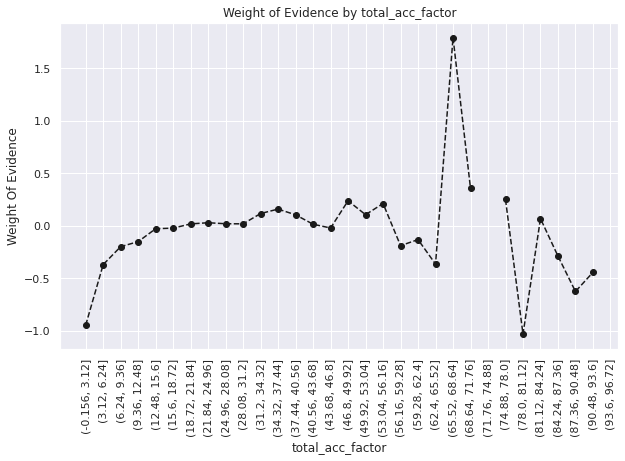

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

### Preprocessing the 'acc_now_delinq'

In [ ]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0             0.0  92871   0.903156    0.995861  83877.0  8994.0     0.995809   
1             1.0    360   0.916667    0.003860    330.0    30.0     0.003918   
2             2.0     22   0.909091    0.000236     20.0     2.0     0.000237   
3             3.0      4   0.750000    0.000043      3.0     1.0     0.000036   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.996344 -0.000537             NaN       NaN  0.000185  
1    0.003323  0.164564        0.013511  0.165102  0.000185  
2    0.000222  0.069254        0.007576  0.095310  0.000185  
3    0.000111 -1.134719        0.159091  1.203973  0.000185

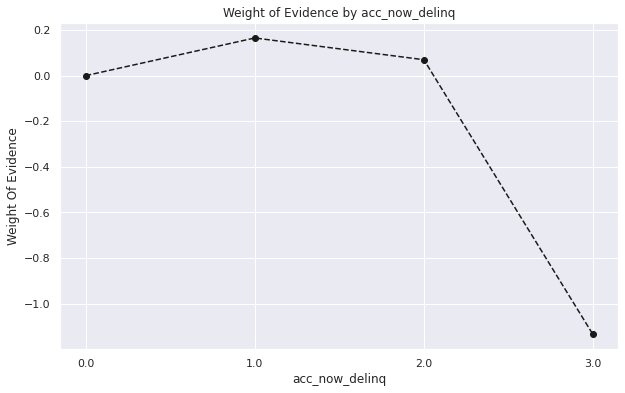

In [ ]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [ ]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

### Preprocessing the 'total_rev_hi_lim'

In [ ]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2013.133, 1006.566]    238   0.844538    0.002552   201.0   37.0   
1           (1006.566, 2013.133]    678   0.831858    0.007270   564.0  114.0   
2             (2013.133, 3019.7]   1121   0.859054    0.012021   963.0  158.0   
3             (3019.7, 4026.266]   1461   0.889117    0.015666  1299.0  162.0   
4           (4026.266, 5032.832]   2163   0.882571    0.023194  1909.0  254.0   
...                          ...    ...        ...         ...     ...    ...   
1995  (2008100.168, 2009106.734]      0        NaN    0.000000     NaN    NaN   
1996  (2009106.734, 2010113.301]      0        NaN    0.000000     NaN    NaN   
1997  (2010113.301, 2011119.867]      0        NaN    0.000000     NaN    NaN   
1998  (2011119.867, 2012126.434]      0        NaN    0.000000     NaN    NaN   
1999    (2012126.434, 2013133.0]      1   1.000000    0.000011     1.0    0.0   

      prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0        0.002386    0.004099 -0.540944             NaN       NaN  inf  
1        0.006696    0.012629 -0.634475        0.012679  0.093531  inf  
2        0.011433    0.017503 -0.425873        0.027196  0.208603  inf  
3        0.015422    0.017946 -0.151577        0.030063  0.274295  inf  
4        0.022664    0.028138 -0.216331        0.006547  0.064753  inf  
...           ...         ...       ...             ...       ...  ...  
1995          NaN         NaN       NaN             NaN       NaN  inf  
1996          NaN         NaN       NaN             NaN       NaN  inf  
1997          NaN         NaN       NaN             NaN       NaN  inf  
1998          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.000012    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

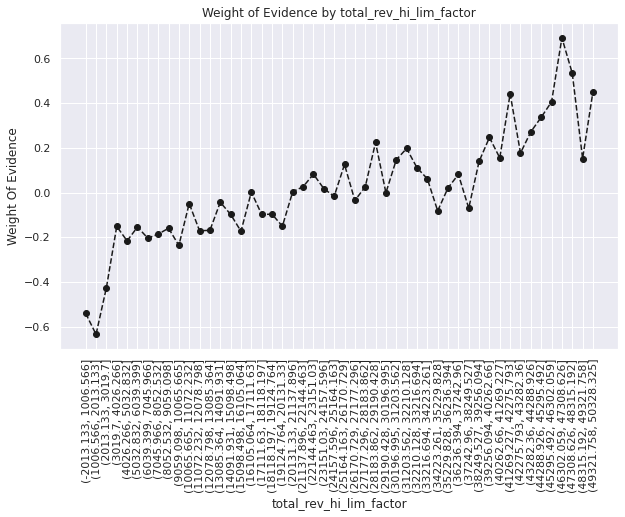

In [ ]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [ ]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

### Preprocessing the 'installment'

In [ ]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    485   0.874227    0.005201   424.0   61.0   
1       (43.585, 71.41]   1246   0.907705    0.013361  1131.0  115.0   
2       (71.41, 99.235]   1731   0.903524    0.018562  1564.0  167.0   
3      (99.235, 127.06]   2292   0.907941    0.024577  2081.0  211.0   
4     (127.06, 154.885]   2602   0.896234    0.027901  2332.0  270.0   
5     (154.885, 182.71]   4133   0.905880    0.044318  3744.0  389.0   
6     (182.71, 210.535]   4109   0.913361    0.044061  3753.0  356.0   
7     (210.535, 238.36]   3730   0.910188    0.039997  3395.0  335.0   
8     (238.36, 266.185]   4660   0.913948    0.049969  4259.0  401.0   
9     (266.185, 294.01]   4975   0.903719    0.053347  4496.0  479.0   
10    (294.01, 321.835]   5186   0.914771    0.055610  4744.0  442.0   
11    (321.835, 349.66]   6432   0.904073    0.068971  5815.0  617.0   
12    (349.66, 377.485]   4758   0.896595    0.051020  4266.0  492.0   
13    (377.485, 405.31]   4352   0.913143    0.046667  3974.0  378.0   
14    (405.31, 433.135]   3429   0.896180    0.036769  3073.0  356.0   
15    (433.135, 460.96]   3225   0.894264    0.034582  2884.0  341.0   
16    (460.96, 488.785]   3865   0.906598    0.041445  3504.0  361.0   
17    (488.785, 516.61]   3861   0.902357    0.041402  3484.0  377.0   
18    (516.61, 544.435]   2730   0.879853    0.029274  2402.0  328.0   
19    (544.435, 572.26]   2564   0.896646    0.027494  2299.0  265.0   
20    (572.26, 600.085]   2434   0.889893    0.026100  2166.0  268.0   
21    (600.085, 627.91]   2294   0.912816    0.024599  2094.0  200.0   
22    (627.91, 655.735]   2091   0.912960    0.022422  1909.0  182.0   
23    (655.735, 683.56]   2295   0.905447    0.024609  2078.0  217.0   
24    (683.56, 711.385]   1650   0.889697    0.017693  1468.0  182.0   
25    (711.385, 739.21]   1252   0.902556    0.013425  1130.0  122.0   
26    (739.21, 767.035]   1360   0.907353    0.014583  1234.0  126.0   
27    (767.035, 794.86]   1160   0.902586    0.012439  1047.0  113.0   
28    (794.86, 822.685]   1023   0.904203    0.010970   925.0   98.0   
29    (822.685, 850.51]    967   0.902792    0.010369   873.0   94.0   
30    (850.51, 878.335]   1046   0.908222    0.011216   950.0   96.0   
31    (878.335, 906.16]    707   0.882603    0.007581   624.0   83.0   
32    (906.16, 933.985]    604   0.879139    0.006477   531.0   73.0   
33    (933.985, 961.81]    635   0.869291    0.006809   552.0   83.0   
34    (961.81, 989.635]    460   0.865217    0.004933   398.0   62.0   
35   (989.635, 1017.46]    441   0.877551    0.004729   387.0   54.0   
36  (1017.46, 1045.285]    305   0.875410    0.003271   267.0   38.0   
37  (1045.285, 1073.11]    206   0.898058    0.002209   185.0   21.0   
38  (1073.11, 1100.935]    228   0.899123    0.002445   205.0   23.0   
39  (1100.935, 1128.76]    247   0.939271    0.002649   232.0   15.0   
40  (1128.76, 1156.585]    227   0.925110    0.002434   210.0   17.0   
41  (1156.585, 1184.41]    287   0.909408    0.003078   261.0   26.0   
42  (1184.41, 1212.235]    308   0.935065    0.003303   288.0   20.0   
43  (1212.235, 1240.06]    284   0.926056    0.003045   263.0   21.0   
44  (1240.06, 1267.885]    159   0.899371    0.001705   143.0   16.0   
45  (1267.885, 1295.71]    132   0.871212    0.001415   115.0   17.0   
46  (1295.71, 1323.535]     47   0.787234    0.000504    37.0   10.0   
47  (1323.535, 1351.36]     21   0.761905    0.000225    16.0    5.0   
48  (1351.36, 1379.185]     15   0.733333    0.000161    11.0    4.0   
49  (1379.185, 1407.01]      7   1.000000    0.000075     7.0    0.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.005034    0.006758 -0.294471             NaN       NaN  inf  
1      0.013428    0.012740  0.052594        0.033478  0.347066  inf  
2      0.018568    0.018500  0.003677        0.004181  0.048917  inf  
3      0.024706    0.023374  0.055415        0.0

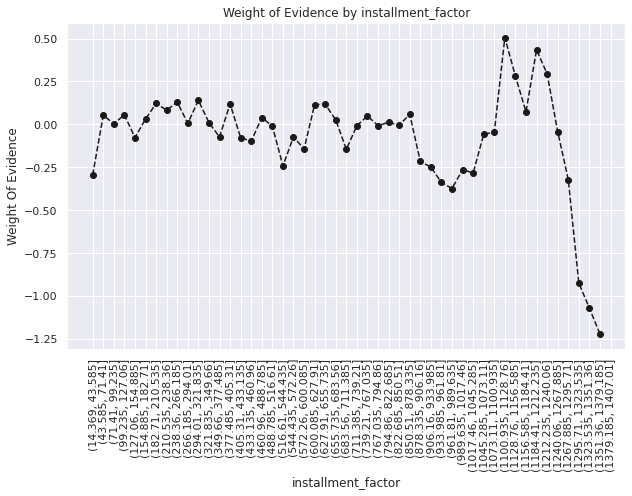

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Precprocessing the 'annual income'

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (-2695.2, 154704.0]  89203   0.901584    0.956529  80424.0  8779.0   
1     (154704.0, 304608.0]   3626   0.937672    0.038882   3400.0   226.0   
2     (304608.0, 454512.0]    282   0.936170    0.003024    264.0    18.0   
3     (454512.0, 604416.0]     86   0.965116    0.000922     83.0     3.0   
4     (604416.0, 754320.0]     23   1.000000    0.000247     23.0     0.0   
5     (754320.0, 904224.0]     18   0.944444    0.000193     17.0     1.0   
6    (904224.0, 1054128.0]      7   1.000000    0.000075      7.0     0.0   
7   (1054128.0, 1204032.0]      6   1.000000    0.000064      6.0     0.0   
8   (1204032.0, 1353936.0]      2   1.000000    0.000021      2.0     0.0   
9   (1353936.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
10  (1503840.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
11  (1653744.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
12  (1803648.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
13  (1953552.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
14  (2103456.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
15  (2253360.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
16  (2403264.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
17  (2553168.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
18  (2703072.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
19  (2852976.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
20  (3002880.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
21  (3152784.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
22  (3302688.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
23  (3452592.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
24  (3602496.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
25  (3752400.0, 3902304.0]      0        NaN    0.000000      NaN     NaN   
26  (3902304.0, 4052208.0]      0        NaN    0.000000      NaN     NaN   
27  (4052208.0, 4202112.0]      0        NaN    0.000000      NaN     NaN   
28  (4202112.0, 4352016.0]      0        NaN    0.000000      NaN     NaN   
29  (4352016.0, 4501920.0]      0        NaN    0.000000      NaN     NaN   
30  (4501920.0, 4651824.0]      0        NaN    0.000000      NaN     NaN   
31  (4651824.0, 4801728.0]      0        NaN    0.000000      NaN     NaN   
32  (4801728.0, 4951632.0]      0        NaN    0.000000      NaN     NaN   
33  (4951632.0, 5101536.0]      0        NaN    0.000000      NaN     NaN   
34  (5101536.0, 5251440.0]      0        NaN    0.000000      NaN     NaN   
35  (5251440.0, 5401344.0]      0        NaN    0.000000      NaN     NaN   
36  (5401344.0, 5551248.0]      0        NaN    0.000000      NaN     NaN   
37  (5551248.0, 5701152.0]      0        NaN    0.000000      NaN     NaN   
38  (5701152.0, 5851056.0]      0        NaN    0.000000      NaN     NaN   
39  (5851056.0, 6000960.0]      0        NaN    0.000000      NaN     NaN   
40  (6000960.0, 6150864.0]      0        NaN    0.000000      NaN     NaN   
41  (6150864.0, 6300768.0]      0        NaN    0.000000      NaN     NaN   
42  (6300768.0, 6450672.0]      0        NaN    0.000000      NaN     NaN   
43  (6450672.0, 6600576.0]      0        NaN    0.000000      NaN     NaN   
44  (6600576.0, 6750480.0]      0        NaN    0.000000      NaN     NaN   
45  (6750480.0, 6900384.0]      0        NaN    0.000000      NaN     NaN   
46  (6900384.0, 7050288.0]      0        NaN    0.000000      NaN     NaN   
47  (7050288.0, 7200192.0]      0        NaN    0.000000      NaN     NaN   
48  (7200192.0, 7350096.0]      0        NaN    0.000000      NaN     NaN   
49  (7350096.0, 7500000.0]      2   1.000000    0.000021      2.0     0.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.9

1. What's immediately obvious though is that there is a very large number of observations in the first interval.
2. In fact the first interval contains more than ninety four percent of all observations.Therefore it seems like 50 categories were not quite enough to fine class the variable.In such cases we could try to split the variable into more than 50 classes let's say 100; we will use the same code this time indicating we prefer 100 categories.
3. Let's run all cells below until we reach the resulting data frame.It seems that things are a bit better but not much.Again the first category contains a very large number of observations this time about 62 percent of all observations.
4. If we apply common logic this is kind of expected.There are very few people with a large income and a lot of people with low income.Perhaps it's a good idea to put aside people with very high income and investigate people with lower
incomes separately.
5. So the first two categories from the last fine classing contain a lot of observations while each of the subsequent categories contains very few observations.So the number of observations becomes lower and lower as we go to categories with higher income.
6. Why don't we create one dummy variable for people with very large income now and figure out what dummy variables we have to create for people with lower income.Next let's do that.
7. The third category here starts from about one hundred forty four thousand dollars.Let's assume that one hundred forty thousand dollars are the threshold above which people are considered to have a high income.This way the category of people with very high income would include a bit more than 5 percent of the
observations.
8. So we'll create one category for people with income higher than one hundred and forty thousand dollars.Now let's look only at the remaining observations that is people with an annual income lower than or equal to one hundred forty thousand dollars.Let's store them temporarily in the data frame.

In [ ]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp=woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  62621   0.891155    0.671488  55805.0  6816.0   
1      (79752.0, 154704.0]  26582   0.926153    0.285040  24619.0  1963.0   
2     (154704.0, 229656.0]   2916   0.936214    0.031268   2730.0   186.0   
3     (229656.0, 304608.0]    710   0.943662    0.007613    670.0    40.0   
4     (304608.0, 379560.0]    171   0.935673    0.001834    160.0    11.0   
5     (379560.0, 454512.0]    111   0.936937    0.001190    104.0     7.0   
6     (454512.0, 529464.0]     53   0.962264    0.000568     51.0     2.0   
7     (529464.0, 604416.0]     33   0.969697    0.000354     32.0     1.0   
8     (604416.0, 679368.0]     10   1.000000    0.000107     10.0     0.0   
9     (679368.0, 754320.0]     13   1.000000    0.000139     13.0     0.0   
10    (754320.0, 829272.0]      5   1.000000    0.000054      5.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000139     12.0     1.0   
12    (904224.0, 979176.0]      3   1.000000    0.000032      3.0     0.0   
13   (979176.0, 1054128.0]      4   1.000000    0.000043      4.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000032      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000032      3.0     0.0   
16  (1204032.0, 1278984.0]      2   1.000000    0.000021      2.0     0.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      0        NaN    0.000000      NaN     NaN   
19  (1428888.0, 1503840.0]      2   1.000000    0.000021      2.0     0.0   
20  (1503840.0, 1578792.0]      0        NaN    0.000000      NaN     NaN   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

In [ ]:
#Storing observations with an annual income lower than or equal to 140000 dollars
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000,:]

In [ ]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'] ,50)
df_temp=woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     10   1.000000    0.000114    10.0    0.0   
1      (7504.0, 10208.0]     84   0.773810    0.000958    65.0   19.0   
2     (10208.0, 12912.0]    123   0.813008    0.001403   100.0   23.0   
3     (12912.0, 15616.0]    304   0.868421    0.003467   264.0   40.0   
4     (15616.0, 18320.0]    383   0.832898    0.004368   319.0   64.0   
5     (18320.0, 21024.0]    733   0.856753    0.008359   628.0  105.0   
6     (21024.0, 23728.0]    704   0.867898    0.008028   611.0   93.0   
7     (23728.0, 26432.0]   1785   0.871709    0.020356  1556.0  229.0   
8     (26432.0, 29136.0]   1355   0.866421    0.015452  1174.0  181.0   
9     (29136.0, 31840.0]   2292   0.864747    0.026137  1982.0  310.0   
10    (31840.0, 34544.0]   2130   0.872300    0.024290  1858.0  272.0   
11    (34544.0, 37248.0]   3525   0.872624    0.040198  3076.0  449.0   
12    (37248.0, 39952.0]   1926   0.894081    0.021963  1722.0  204.0   
13    (39952.0, 42656.0]   4973   0.881158    0.056710  4382.0  591.0   
14    (42656.0, 45360.0]   4038   0.890045    0.046048  3594.0  444.0   
15    (45360.0, 48064.0]   3015   0.892869    0.034382  2692.0  323.0   
16    (48064.0, 50768.0]   4397   0.891744    0.050142  3921.0  476.0   
17    (50768.0, 53472.0]   2898   0.895100    0.033048  2594.0  304.0   
18    (53472.0, 56176.0]   4143   0.885832    0.047245  3670.0  473.0   
19    (56176.0, 58880.0]   1810   0.892818    0.020641  1616.0  194.0   
20    (58880.0, 61584.0]   4726   0.894625    0.053894  4228.0  498.0   
21    (61584.0, 64288.0]   2246   0.907836    0.025613  2039.0  207.0   
22    (64288.0, 66992.0]   3455   0.907381    0.039400  3135.0  320.0   
23    (66992.0, 69696.0]   1965   0.923155    0.022408  1814.0  151.0   
24    (69696.0, 72400.0]   4096   0.910645    0.046709  3730.0  366.0   
25    (72400.0, 75104.0]   3495   0.911874    0.039856  3187.0  308.0   
26    (75104.0, 77808.0]    967   0.928645    0.011027   898.0   69.0   
27    (77808.0, 80512.0]   3571   0.909829    0.040723  3249.0  322.0   
28    (80512.0, 83216.0]   1319   0.933283    0.015041  1231.0   88.0   
29    (83216.0, 85920.0]   2274   0.908091    0.025932  2065.0  209.0   
30    (85920.0, 88624.0]   1144   0.914336    0.013046  1046.0   98.0   
31    (88624.0, 91328.0]   2425   0.936907    0.027654  2272.0  153.0   
32    (91328.0, 94032.0]   1141   0.918493    0.013012  1048.0   93.0   
33    (94032.0, 96736.0]   1562   0.925096    0.017813  1445.0  117.0   
34    (96736.0, 99440.0]    916   0.923581    0.010446   846.0   70.0   
35   (99440.0, 102144.0]   2307   0.919809    0.026308  2122.0  185.0   
36  (102144.0, 104848.0]    552   0.923913    0.006295   510.0   42.0   
37  (104848.0, 107552.0]   1094   0.943327    0.012476  1032.0   62.0   
38  (107552.0, 110256.0]   1562   0.925096    0.017813  1445.0  117.0   
39  (110256.0, 112960.0]    295   0.922034    0.003364   272.0   23.0   
40  (112960.0, 115664.0]    790   0.926582    0.009009   732.0   58.0   
41  (115664.0, 118368.0]    358   0.946927    0.004083   339.0   19.0   
42  (118368.0, 121072.0]   1473   0.929396    0.016798  1369.0  104.0   
43  (121072.0, 123776.0]    204   0.946078    0.002326   193.0   11.0   
44  (123776.0, 126480.0]    870   0.939080    0.009921   817.0   53.0   
45  (126480.0, 129184.0]    239   0.958159    0.002725   229.0   10.0   
46  (129184.0, 131888.0]    734   0.935967    0.008370   687.0   47.0   
47  (131888.0, 134592.0]    207   0.942029    0.002361   195.0   12.0   
48  (134592.0, 137296.0]    449   0.933185    0.005120   419.0   30.0   
49  (137296.0, 140000.0]    627   0.923445    0.007150   579.0   48.0   

    prop_n_good  prop_n_bad       WOE  diff_prop_good  diff_WOE   IV  
0      0.000127    0.000000       inf             NaN       NaN  inf  
1      0.000823    0.002188 -0.978106        0.226190       inf  inf  
2      0.001266    0.002649 -0.738378        0.039199  0.239728  inf  

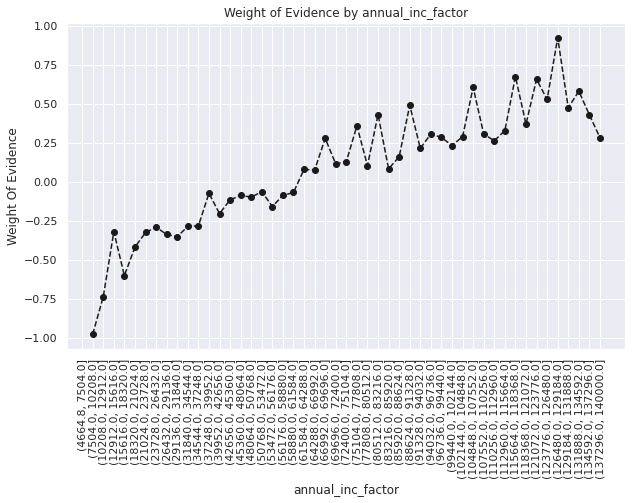

In [ ]:
plot_by_woe(df_temp,90)

1. What we see here is the weight of evidence increases almost monotonously with annual income.Remember the case for the interest rate variable from the last lecture was similar but in the opposite direction.

2. Weight of evidence decreased monotonously as interest rate increased.Well here it seems that the relationship is even more monotonous.Thus we can safely split the variable into some roughly equal intervals.Of course we have to take into consideration the number of observations as well.

3. For example we can split the whole interval from 0 to 140000 to intervals with width 10000.But the first two such intervals would have very few observations each.SO let the first interval be from 0 to 20000 or lower than or equal to 20000.

4. If we kept everything split with  10000 the last four intervals from 100000 to 140000 would also have a very low number of observations each. 

5. With that in mind Let's make two intervals from 100000 to 120000 and from 120000 to 140000.

6. Now what's left is everything between 20000 and 100000. We will split it into equally wide categories with a width of ten thousand each.

7. In other words we'll have eight equally wide categories here.First from 20000 to 30000 then from 30000 to 40000 and so on until 90000 to 100000.

8. To sum up for the annual income category we have one category for annual income <=20000,eight categories with ten thousand each from 20000 to 100000 ,one category from 100000 to 120000, one category from 120000 to 140000 and one category for annual income greater than 140000.

In [ ]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

### Preprocessing 'mnths_since_last_delinq'.
1. Let's explore months since last delinquency.If you remember from the initial pre processing we've done there are a lot of missing values in this variable;in fact so many that we've determined we couldn't do anything with them at that stage.
2. Well every continuous variable is represented by dummy variables in the probability of default model and months since last delinquency should be no exception.Of course besides the missing values the variable takes integer numbers values greater than 0.
3. We already have a lot of experience with fine classing and coarse classing such variables into dummy variables.But what should we do with the missing values.Well why not just create a dummy variable for missing months since last delinquency?
4. This variable can have a value of 1 when months since last delinquency is missing and value of 0 when it isn't missing.
5. Then when it is not missing the rest of the dummy variables will cover all the values after we do fine classing and course classing.Note that this methodology for dealing with missing values can only be used with categorical variables.
6. All right we've made the decision to create a separate dummy variable for the missing values and thus we can continue with fine classing and course classing of all non missing values.

In [ ]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1348   0.890208    0.031283  1200.0  148.0   
1                     (3.4, 6.8]   1890   0.898942    0.043861  1699.0  191.0   
2                    (6.8, 10.2]   3373   0.903647    0.078276  3048.0  325.0   
3                   (10.2, 13.6]   2496   0.909455    0.057924  2270.0  226.0   
4                   (13.6, 17.0]   3165   0.903949    0.073449  2861.0  304.0   
5                   (17.0, 20.4]   2282   0.904470    0.052958  2064.0  218.0   
6                   (20.4, 23.8]   2115   0.909693    0.049082  1924.0  191.0   
7                   (23.8, 27.2]   2755   0.905626    0.063934  2495.0  260.0   
8                   (27.2, 30.6]   1929   0.906169    0.044766  1748.0  181.0   
9                   (30.6, 34.0]   2453   0.907460    0.056926  2226.0  227.0   
10                  (34.0, 37.4]   1786   0.916013    0.041447  1636.0  150.0   
11                  (37.4, 40.8]   1765   0.906516    0.040960  1600.0  165.0   
12                  (40.8, 44.2]   2270   0.887665    0.052679  2015.0  255.0   
13                  (44.2, 47.6]   1664   0.910457    0.038616  1515.0  149.0   
14                  (47.6, 51.0]   1739   0.898792    0.040356  1563.0  176.0   
15                  (51.0, 54.4]   1158   0.896373    0.026873  1038.0  120.0   
16                  (54.4, 57.8]   1130   0.921239    0.026224  1041.0   89.0   
17                  (57.8, 61.2]   1423   0.910049    0.033023  1295.0  128.0   
18                  (61.2, 64.6]   1015   0.903448    0.023555   917.0   98.0   
19                  (64.6, 68.0]   1342   0.904620    0.031143  1214.0  128.0   
20                  (68.0, 71.4]    930   0.898925    0.021582   836.0   94.0   
21                  (71.4, 74.8]    928   0.903017    0.021536   838.0   90.0   
22                  (74.8, 78.2]   1195   0.917992    0.027732  1097.0   98.0   
23                  (78.2, 81.6]    768   0.891927    0.017823   685.0   83.0   
24                  (81.6, 85.0]    136   0.897059    0.003156   122.0   14.0   
25                  (85.0, 88.4]     10   1.000000    0.000232    10.0    0.0   
26                  (88.4, 91.8]      1   1.000000    0.000023     1.0    0.0   
27                  (91.8, 95.2]      2   1.000000    0.000046     2.0    0.0   
28                  (95.2, 98.6]      3   0.666667    0.000070     2.0    1.0   
29                 (98.6, 102.0]      4   1.000000    0.000093     4.0    0.0   
30                (102.0, 105.4]      2   1.000000    0.000046     2.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000070     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000023     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000023     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000046     2.0    0.0   
35                (119.0, 122.4]      2   1.000000    0.000046     2.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000023     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000023     1.0    0.0   
39                (132.6, 136.0]      1   1.000000    0.000023     1.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000023     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      0        NaN    0.000000     NaN    NaN   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

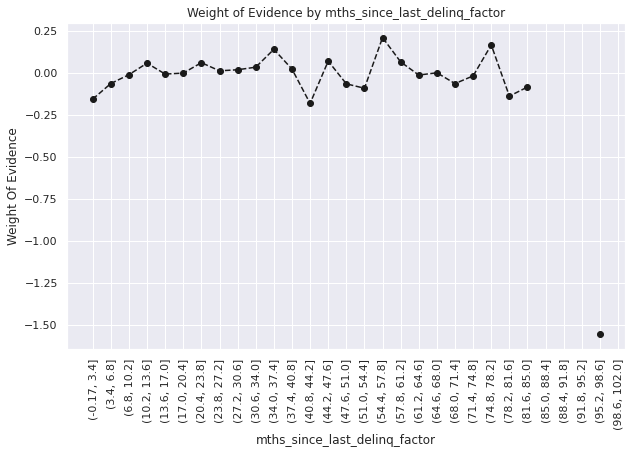

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing the 'dti' variable.

In [ ]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    187   0.903743    0.002005   169.0   18.0   
1         (0.4, 0.8]    184   0.885870    0.001973   163.0   21.0   
2         (0.8, 1.2]    223   0.905830    0.002391   202.0   21.0   
3         (1.2, 1.6]    255   0.913725    0.002734   233.0   22.0   
4         (1.6, 2.0]    315   0.901587    0.003378   284.0   31.0   
5       (2.0, 2.399]    324   0.916667    0.003474   297.0   27.0   
6     (2.399, 2.799]    366   0.920765    0.003925   337.0   29.0   
7     (2.799, 3.199]    442   0.911765    0.004740   403.0   39.0   
8     (3.199, 3.599]    484   0.944215    0.005190   457.0   27.0   
9     (3.599, 3.999]    563   0.904085    0.006037   509.0   54.0   
10    (3.999, 4.399]    599   0.926544    0.006423   555.0   44.0   
11    (4.399, 4.799]    661   0.915280    0.007088   605.0   56.0   
12    (4.799, 5.199]    706   0.926346    0.007570   654.0   52.0   
13    (5.199, 5.599]    821   0.919610    0.008804   755.0   66.0   
14    (5.599, 5.999]    841   0.915577    0.009018   770.0   71.0   
15    (5.999, 6.398]    889   0.922385    0.009533   820.0   69.0   
16    (6.398, 6.798]    978   0.943763    0.010487   923.0   55.0   
17    (6.798, 7.198]   1021   0.918707    0.010948   938.0   83.0   
18    (7.198, 7.598]   1057   0.914853    0.011334   967.0   90.0   
19    (7.598, 7.998]   1170   0.927350    0.012546  1085.0   85.0   
20    (7.998, 8.398]   1172   0.918942    0.012567  1077.0   95.0   
21    (8.398, 8.798]   1127   0.921029    0.012085  1038.0   89.0   
22    (8.798, 9.198]   1281   0.927400    0.013736  1188.0   93.0   
23    (9.198, 9.598]   1309   0.909091    0.014036  1190.0  119.0   
24    (9.598, 9.998]   1371   0.919037    0.014701  1260.0  111.0   
25   (9.998, 10.397]   1429   0.923023    0.015323  1319.0  110.0   
26  (10.397, 10.797]   1521   0.911243    0.016310  1386.0  135.0   
27  (10.797, 11.197]   1555   0.920900    0.016674  1432.0  123.0   
28  (11.197, 11.597]   1597   0.909831    0.017125  1453.0  144.0   
29  (11.597, 11.997]   1554   0.917632    0.016664  1426.0  128.0   
30  (11.997, 12.397]   1607   0.907281    0.017232  1458.0  149.0   
31  (12.397, 12.797]   1719   0.920884    0.018433  1583.0  136.0   
32  (12.797, 13.197]   1614   0.926270    0.017307  1495.0  119.0   
33  (13.197, 13.597]   1717   0.913803    0.018411  1569.0  148.0   
34  (13.597, 13.997]   1707   0.899824    0.018304  1536.0  171.0   
35  (13.997, 14.396]   1724   0.911253    0.018487  1571.0  153.0   
36  (14.396, 14.796]   1773   0.906937    0.019012  1608.0  165.0   
37  (14.796, 15.196]   1755   0.905413    0.018819  1589.0  166.0   
38  (15.196, 15.596]   1695   0.909145    0.018176  1541.0  154.0   
39  (15.596, 15.996]   1752   0.916667    0.018787  1606.0  146.0   
40  (15.996, 16.396]   1653   0.909861    0.017725  1504.0  149.0   
41  (16.396, 16.796]   1689   0.908822    0.018111  1535.0  154.0   
42  (16.796, 17.196]   1770   0.909605    0.018980  1610.0  160.0   
43  (17.196, 17.596]   1708   0.894028    0.018315  1527.0  181.0   
44  (17.596, 17.996]   1680   0.908929    0.018015  1527.0  153.0   
45  (17.996, 18.395]   1671   0.910233    0.017918  1521.0  150.0   
46  (18.395, 18.795]   1638   0.910867    0.017564  1492.0  146.0   
47  (18.795, 19.195]   1628   0.896192    0.017457  1459.0  169.0   
48  (19.195, 19.595]   1606   0.902242    0.017221  1449.0  157.0   
49  (19.595, 19.995]   1603   0.891454    0.017189  1429.0  174.0   
50  (19.995, 20.395]   1512   0.901455    0.016213  1363.0  149.0   
51  (20.395, 20.795]   1656   0.892512    0.017757  1478.0  178.0   
52  (20.795, 21.195]   1505   0.899668    0.016138  1354.0  151.0   
53  (21.195, 21.595]   1455   0.892096    0.015602  1298.0  157.0   
54  (21.595, 21.995]   1452   0.894628    0.015570  1299.0  153.0   
55  (21.995, 22.394]   1394   0.882353    0.014948  1230.0  164.0   
56  (22.394, 22.794]   1309   0.872422    0.014036  1142.0  167.0   
57  (22.

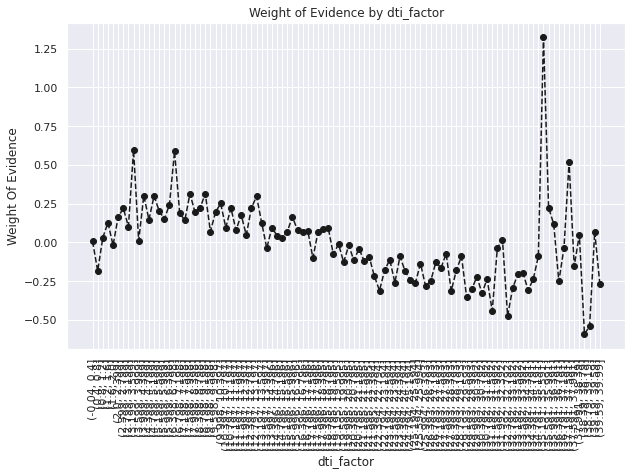

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 35 or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [ ]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    328   0.893293    0.003544   293.0   35.0     0.003505   
1      (0.7, 1.4]    393   0.916031    0.004246   360.0   33.0     0.004307   
2      (1.4, 2.1]    536   0.901119    0.005792   483.0   53.0     0.005778   
3      (2.1, 2.8]    607   0.919275    0.006559   558.0   49.0     0.006676   
4      (2.8, 3.5]    811   0.933416    0.008763   757.0   54.0     0.009056   
5      (3.5, 4.2]    970   0.907216    0.010481   880.0   90.0     0.010528   
6      (4.2, 4.9]   1140   0.921053    0.012318  1050.0   90.0     0.012562   
7      (4.9, 5.6]   1370   0.921168    0.014803  1262.0  108.0     0.015098   
8      (5.6, 6.3]   1491   0.919517    0.016111  1371.0  120.0     0.016402   
9      (6.3, 7.0]   1722   0.934959    0.018607  1610.0  112.0     0.019261   
10     (7.0, 7.7]   1846   0.916576    0.019946  1692.0  154.0     0.020242   
11     (7.7, 8.4]   2044   0.923190    0.022086  1887.0  157.0     0.022575   
12     (8.4, 9.1]   2097   0.922747    0.022659  1935.0  162.0     0.023149   
13     (9.1, 9.8]   2319   0.915912    0.025057  2124.0  195.0     0.025410   
14    (9.8, 10.5]   2519   0.918618    0.027218  2314.0  205.0     0.027683   
15   (10.5, 11.2]   2694   0.917966    0.029109  2473.0  221.0     0.029586   
16   (11.2, 11.9]   2748   0.913028    0.029693  2509.0  239.0     0.030016   
17   (11.9, 12.6]   2844   0.913502    0.030730  2598.0  246.0     0.031081   
18   (12.6, 13.3]   2886   0.920305    0.031184  2656.0  230.0     0.031775   
19   (13.3, 14.0]   3056   0.908050    0.033021  2775.0  281.0     0.033199   
20   (14.0, 14.7]   3068   0.907432    0.033150  2784.0  284.0     0.033306   
21   (14.7, 15.4]   2954   0.907921    0.031919  2682.0  272.0     0.032086   
22   (15.4, 16.1]   3050   0.916066    0.032956  2794.0  256.0     0.033426   
23   (16.1, 16.8]   2914   0.907001    0.031486  2643.0  271.0     0.031619   
24   (16.8, 17.5]   3078   0.898635    0.033258  2766.0  312.0     0.033091   
25   (17.5, 18.2]   2964   0.912618    0.032027  2705.0  259.0     0.032361   
26   (18.2, 18.9]   2863   0.904645    0.030935  2590.0  273.0     0.030985   
27   (18.9, 19.6]   2796   0.902718    0.030211  2524.0  272.0     0.030196   
28   (19.6, 20.3]   2772   0.898990    0.029952  2492.0  280.0     0.029813   
29   (20.3, 21.0]   2830   0.892933    0.030579  2527.0  303.0     0.030232   
30   (21.0, 21.7]   2517   0.896702    0.027197  2257.0  260.0     0.027001   
31   (21.7, 22.4]   2495   0.884168    0.026959  2206.0  289.0     0.026391   
32   (22.4, 23.1]   2261   0.877046    0.024431  1983.0  278.0     0.023724   
33   (23.1, 23.8]   2327   0.889987    0.025144  2071.0  256.0     0.024776   
34   (23.8, 24.5]   2127   0.887635    0.022983  1888.0  239.0     0.022587   
35   (24.5, 25.2]   1929   0.884396    0.020843  1706.0  223.0     0.020410   
36   (25.2, 25.9]   1707   0.882835    0.018444  1507.0  200.0     0.018029   
37   (25.9, 26.6]   1657   0.875075    0.017904  1450.0  207.0     0.017347   
38   (26.6, 27.3]   1553   0.891178    0.016780  1384.0  169.0     0.016557   
39   (27.3, 28.0]   1559   0.892880    0.016845  1392.0  167.0     0.016653   
40   (28.0, 28.7]   1390   0.878417    0.015019  1221.0  169.0     0.014607   
41   (28.7, 29.4]   1341   0.884415    0.014490  1186.0  155.0     0.014189   
42   (29.4, 30.1]   1147   0.870968    0.012394   999.0  148.0     0.011951   
43   (30.1, 30.8]    838   0.877088    0.009055   735.0  103.0     0.008793   
44   (30.8, 31.5]    798   0.874687    0.008623   698.0  100.0     0.008350   
45   (31.5, 32.2]    734   0.897820    0.007931   659.0   75.0     0.007884   
46   (32.2, 32.9]    696   0.870690    0.007520   606.0   90.0     0.007250   
47   (32.9, 33.6]    621   0.872786    0.006710   542.0   79.0     0.006484   
48   (33.6, 34.3]    634   0.881703    0.006850   559.0   75.0     0.006688   
49   (34.3, 35.0]    507   0.877712    0.005478   445.0  

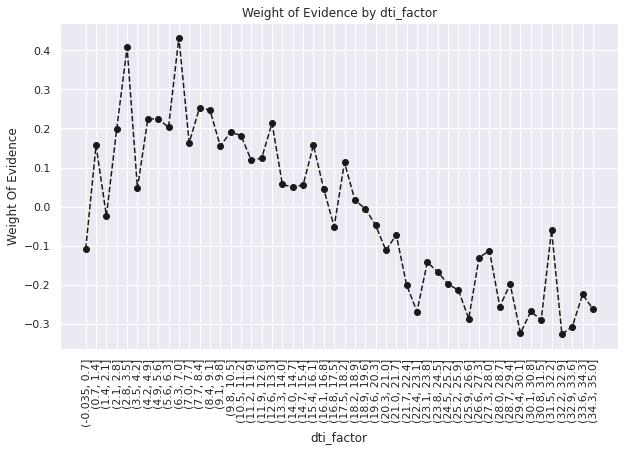

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

### Preprocessing the 'mths_since_last_record ' variable

In [ ]:
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    244   0.741803    0.019410   181.0   63.0   
1                   (2.58, 5.16]     36   0.944444    0.002864    34.0    2.0   
2                   (5.16, 7.74]     39   0.923077    0.003102    36.0    3.0   
3                  (7.74, 10.32]     66   0.924242    0.005250    61.0    5.0   
4                  (10.32, 12.9]     42   0.904762    0.003341    38.0    4.0   
5                  (12.9, 15.48]     69   0.898551    0.005489    62.0    7.0   
6                 (15.48, 18.06]     95   0.873684    0.007557    83.0   12.0   
7                 (18.06, 20.64]     58   0.982759    0.004614    57.0    1.0   
8                 (20.64, 23.22]    101   0.900990    0.008034    91.0   10.0   
9                  (23.22, 25.8]     94   0.968085    0.007478    91.0    3.0   
10                 (25.8, 28.38]    135   0.933333    0.010739   126.0    9.0   
11                (28.38, 30.96]    103   0.922330    0.008193    95.0    8.0   
12                (30.96, 33.54]    196   0.933673    0.015591   183.0   13.0   
13                (33.54, 36.12]    195   0.933333    0.015512   182.0   13.0   
14                 (36.12, 38.7]    166   0.927711    0.013205   154.0   12.0   
15                 (38.7, 41.28]    234   0.914530    0.018614   214.0   20.0   
16                (41.28, 43.86]    194   0.907216    0.015432   176.0   18.0   
17                (43.86, 46.44]    328   0.932927    0.026092   306.0   22.0   
18                (46.44, 49.02]    367   0.923706    0.029194   339.0   28.0   
19                 (49.02, 51.6]    231   0.956710    0.018376   221.0   10.0   
20                 (51.6, 54.18]    447   0.932886    0.035558   417.0   30.0   
21                (54.18, 56.76]    264   0.924242    0.021001   244.0   20.0   
22                (56.76, 59.34]    393   0.941476    0.031262   370.0   23.0   
23                (59.34, 61.92]    287   0.930314    0.022830   267.0   20.0   
24                 (61.92, 64.5]    405   0.938272    0.032217   380.0   25.0   
25                 (64.5, 67.08]    394   0.964467    0.031342   380.0   14.0   
26                (67.08, 69.66]    272   0.900735    0.021637   245.0   27.0   
27                (69.66, 72.24]    366   0.915301    0.029115   335.0   31.0   
28                (72.24, 74.82]    231   0.926407    0.018376   214.0   17.0   
29                 (74.82, 77.4]    350   0.934286    0.027842   327.0   23.0   
30                 (77.4, 79.98]    228   0.899123    0.018137   205.0   23.0   
31                (79.98, 82.56]    355   0.912676    0.028240   324.0   31.0   
32                (82.56, 85.14]    288   0.944444    0.022910   272.0   16.0   
33                (85.14, 87.72]    251   0.844622    0.019967   212.0   39.0   
34                 (87.72, 90.3]    345   0.895652    0.027444   309.0   36.0   
35                 (90.3, 92.88]    249   0.851406    0.019807   212.0   37.0   
36                (92.88, 95.46]    385   0.870130    0.030626   335.0   50.0   
37                (95.46, 98.04]    401   0.887781    0.031899   356.0   45.0   
38               (98.04, 100.62]    327   0.889908    0.026012   291.0   36.0   
39               (100.62, 103.2]    526   0.893536    0.041842   470.0   56.0   
40               (103.2, 105.78]    396   0.909091    0.031501   360.0   36.0   
41              (105.78, 108.36]    565   0.916814    0.044945   518.0   47.0   
42              (108.36, 110.94]    407   0.936118    0.032376   381.0   26.0   
43              (110.94, 113.52]    524   0.898855    0.041683   471.0   53.0   
44               (113.52, 116.1]    515   0.920388    0.040967   474.0   41.0   
45               (116.1, 118.68]    314   0.898089    0.024978   282.0   32.0   
46              (118.68, 121.26]     92   0.858696    0.007318    79.0   13.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

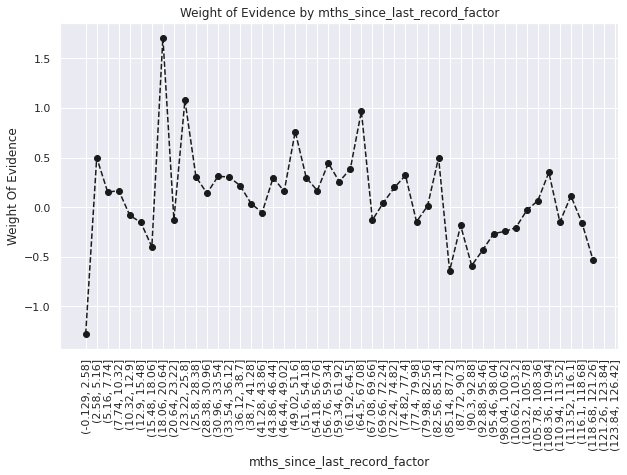

In [ ]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [ ]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

## Preprocessing the Test Set
1. In the last few lectures we split the data into train and test data sets.Then we use the train data set to come up with a suitable dummy variables for our statistical model.In fact this makes perfect sense because we are going to use the train dataset to build our model and the test set to test it.

2. But in order to test the model in the test set we must have the same dummy variables as the ones in the train set.Fortunately we can easily use the code we've written for the train set.

3. As you can probably remember in the beginning before we started exploring and pre processing the data we assigned the train data frame to a new working data frame.That is we assign df_inputs_prepr to be equal to loan_data_prep_inputs_train. From then on we worked with the df_inputs_prepr to assess weight of evidence by variable and to create dummy variables based on our assessment.

4. When we finish this task the df_inpus_prepr contained all the old data and the newly created corresponding dummy variables.So that means we can use the same code to create the same dummy variables for the test data frame which is used only to test and assess a model estimated on the training data.

5. Therefore when working with the test data frame we don't need to assess weight of evidence or come up with categories we consider best to create dummy variables.Rather we must create the exact same dummy variables we used to train the model.

6. We can effortlessly do that by assigning df_inputs_prepr to be equal to loan_data_prep_inputs_test instead of loan_data_prep_inputs_train and then rerun the whole code. Please note that weight of evidence will be calculated and visualized.

7. However we don't care about them since calculating and visualizing weight of evidence does not make any changes in the data at all.We'll simply ignore the outputs of these steps.

8. There is one thing however we should do before starting as we mentioned after running the code with the train data frame df_inputs_prepr contains all the variables needed to train the model.

9. If we only assigned a new value to this data frame as we should in order to run all the same calculations with the test data we'd overwrite the variables created for training the model.That's why before we go back up there where we started our pre processing it is important to save the train data set.

10. Therefore let loan_data_prep_inputs_train equal df_inputs_prepr.Now the data frame loan_data_prep_inputs_train and the df_inputs_prepr both contain the pre process training set data.So now we can go up here and make data frame df_inputs_prepr equal to loan_data_prep_inputs_test.Of course we have to make data frame df_targets_prepr equal to loan_data_prep_targets_test as well.

11. Next we can simply run the code all the way up to where we made loan_data_prep_inputs_train=df_inputs_prepr.

12. Thus df_inputs_prepr contains the test data set with all the dummy variables needed for the model.Hence instead of loan_data_prep_inputs_train we make loan_data_prep_inputs_test equal to df_inputs_prepr.

13. Consequently data frames loan_data_prep_inputs_train and loan_data_prep_inputs_test contain the train and the test data sets with all dummy variables needed for the model; At the same time loan_data_prep_targets_train and loan_data_prep_targets_test contain the corresponding outputs.

In [ ]:
loan_data_prep_inputs_train=df_inputs_prepr
#loan_data_prep_inputs_test=df_inputs_prepr

In [ ]:
#Loading all the pre-processed data to csv files
#loan_data_prep_inputs_train.to_csv('loan_data_prep_inputs_train_final.csv')
#loan_data_prep_targets_train.to_csv('loan_data_prep_targets_train.csv')
loan_data_prep_inputs_test.to_csv('loan_data_prep_inputs_test_final.csv')
loan_data_prep_targets_test.to_csv('loan_data_prep_targets_test.csv')

# PD Model Estimation

### Import Data

In [ ]:
#Loading the prepared dataset files.
loan_data_inputs_train=pd.read_csv('/content/drive/MyDrive/loan_data_prep_inputs_train_final.csv',index_col=0)
loan_data_inputs_test=pd.read_csv('/content/drive/MyDrive/loan_data_prep_inputs_test_final.csv',index_col=0)
loan_data_targets_train=pd.read_csv('/content/drive/MyDrive/loan_data_prep_targets_train.csv',index_col=0)
loan_data_targets_test=pd.read_csv('/content/drive/MyDrive/loan_data_prep_targets_test.csv',index_col=0)

### Explore Data

In [ ]:
loan_data_inputs_train.shape

(373028, 324)

In [ ]:
loan_data_inputs_test.shape

(93257, 324)

In [ ]:
loan_data_targets_train.shape

(373028, 1)

In [ ]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the features<br>
1. Let's create a new data frame called inputs train with reference categories to store only the dummy variables we are going to use for the PD model. 
2. We'll take them from the loan data inputs train data frame using the loc method.So we take all rows from the loan data inputs train data and we take only the columns listed in the list of variables spreadsheet.
3. Now each original variable we decided to include in the PD model is represented by number of categorical dummy variables.
4. As we mentioned before all the information for a given number of dummy variables that stand for one original variable can be represented by one less dummy variable. In fact now we must remove one dummy for each original variable.
Otherwise we will fall in these so-called dummy variable trap.
5. While pre processing we determined one reference category from all the dummy variables we created for each original variable .The reference category will be the dummy to remove from the PD mode.In this way whatever dummy is not included in the training process will become the reference or the benchmark.
6. Let's create a list with the names of the reference dummy variables we'll call the list ref_categories.
7. Finally from the dataframe with input variables, we drop the variables with variable names in the list with reference categories.

In [ ]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'mnths_since_earliest_cr_line:141-164',
'mnths_since_earliest_cr_line:165-247',
'mnths_since_earliest_cr_line:248-270',
'mnths_since_earliest_cr_line:271-352',
'mnths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [ ]:
ref_categories=['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
reg= LogisticRegression(max_iter=400)
pd.options.display.max_rows=None
reg.fit(inputs_train,loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
reg.intercept_

array([-1.82140404])

In [ ]:
reg.coef_

array([[ 1.09182182,  0.89326998,  0.69652708,  0.5088355 ,  0.32318069,
         0.12405089,  0.0794775 ,  0.08841865,  0.03827755,  0.07175971,
         0.06402187,  0.04338261,  0.07403549,  0.13435826,  0.10768516,
         0.16529364,  0.24978854,  0.22973333,  0.2628447 ,  0.31710868,
         0.51483174,  0.08923014, -0.0047016 ,  0.34109812,  0.22375619,
         0.21519374,  0.29273734,  0.06130267,  0.06983712,  0.10158693,
         0.12433468,  0.09687729,  0.06633959,  0.12674617,  1.49847654,
         1.17725876,  1.01395411,  0.74880596,  0.51862528,  0.22446215,
        -0.06716993,  0.91236289,  0.54106726,  0.30451585,  0.10326168,
         0.06531345,  0.03906775,  0.09077459,  0.13158275,  0.12783252,
         0.09266536,  0.06296981,  0.68123472,  0.5338691 ,  0.31387776,
         0.41862562,  0.31680343,  0.3001046 ,  0.28025768,  0.29801671,
         0.27159209,  0.22367218,  0.1735631 ,  0.10591644, -0.0314504 ,
         0.03804356,  0.16018521,  0.04510559,  0.0

In [ ]:
feature_name=inputs_train.columns.values
summary_table=pd.DataFrame(columns=['Feature Name'],data=feature_name)
summary_table['Coefficients']=np.transpose(reg.coef_)
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',reg.intercept_[0]]
summary_table=summary_table.sort_index()
summary_table

Feature Name  Coefficients
0                               Intercept     -1.821404
1                                 grade:A      1.091822
2                                 grade:B      0.893270
3                                 grade:C      0.696527
4                                 grade:D      0.508835
5                                 grade:E      0.323181
6                                 grade:F      0.124051
7                      home_ownership:OWN      0.079478
8                 home_ownership:MORTGAGE      0.088419
9                        addr_state:NM_VA      0.038278
10                          addr_state:NY      0.071760
11           addr_state:OK_TN_MO_LA_MD_NC      0.064022
12                          addr_state:CA      0.043383
13                 addr_state:UT_KY_AZ_NJ      0.074035
14              addr_state:AR_MI_PA_OH_MN      0.134358
15              addr_state:RI_MA_DE_SD_IN      0.107685
16                    addr_state:GA_WA_OR      0.165294
17                       addr_state:WI_MT      0.249789
18                          addr_state:TX      0.229733
19                       addr_state:IL_CT      0.262845
20           addr_state:KS_SC_CO_VT_AK_MS      0.317109
21           addr_state:WV_NH_WY_DC_ME_ID      0.514832
22       verification_status:Not Verified      0.089230
23    verification_status:Source Verified     -0.004702
24                    purpose:credit_card      0.341098
25             purpose:debt_consolidation      0.223756
26             purpose:oth__med__vacation      0.215194
27    purpose:major_purch__car__home_impr      0.292737
28                  initial_list_status:w      0.061303
29                                term:36      0.069837
30                           emp_length:1      0.101587
31                         emp_length:2-4      0.124335
32                         emp_length:5-6      0.096877
33                         emp_length:7-9      0.066340
34                          emp_length:10      0.126746
35                 mths_since_issue_d:<38      1.498477
36               mths_since_issue_d:38-39      1.177259
37               mths_since_issue_d:40-41      1.013954
38               mths_since_issue_d:42-48      0.748806
39               mths_since_issue_d:49-52      0.518625
40               mths_since_issue_d:53-64      0.224462
41               mths_since_issue_d:65-84     -0.067170
42                        int_rate:<9.548      0.912363
43                  int_rate:9.548-12.025      0.541067
44                  int_rate:12.025-15.74      0.304516
45                  int_rate:15.74-20.281      0.103262
46   mnths_since_earliest_cr_line:141-164      0.065313
47   mnths_since_earliest_cr_line:165-247      0.039068
48   mnths_since_earliest_cr_line:248-270      0.090775
49   mnths_since_earliest_cr_line:271-352      0.131583
50      mnths_since_earliest_cr_line:>352      0.127833
51                          delinq_2yrs:0      0.092665
52                        delinq_2yrs:1-3      0.062970
53                       inq_last_6mths:0      0.681235
54                     inq_last_6mths:1-2      0.533869
55                     inq_last_6mths:3-6      0.313878
56                           open_acc:1-3      0.418626
57                          open_acc:4-12      0.316803
58                         open_acc:13-17      0.300105
59                         open_acc:18-22      0.280258
60                         open_acc:23-25      0.298017
61                         open_acc:26-30      0.271592
62                          open_acc:>=31      0.223672
63                            pub_rec:3-4      0.173563
64                            pub_rec:>=5      0.105916
65                        total_acc:28-51     -0.031450
66                         total_acc:>=52      0.038044
67                     acc_now_delinq:>=1      0.160185
68                total_rev_hi_lim:5K-10K      0.045106
69               total_rev_hi_lim:10K-20K      0.011122
70               total_rev_hi_lim:20K-30K      0.0080

## Building a logistic Regression model with p-values

1. So far we fitted the model which is truly great.Unfortunately we've got a problem.
2. We'll need a way to assess which independent variables contribute to predicting borrower default and which don't.
3. In our final model ideally we are going to keep only those independent variables that actually contribute to explaining the good bad dependent variable.
4. For most statistical methods the accepted approach is to check the statistical significance of the coefficients of each dummy variable.One of the most common ways to achieve that is to look at p values.
5. There are some built in methods for calculating p values in sklearn but they are uni-varied, meaning they take into account the impact of each feature on the outcome as if there weren't any other features. 
6. In a regression model the impact of all the features on the outcome is collective rather than independent.Therefore the insights we get from such methods will be flawed.
7. Unfortunately the logistic regression model does not have a built in way to calculate these multivariate p values. In fact obtaining the multivariate p values from sklearn is always tricky.
8. One of the cleanest ways to achieve that is to alter the fit method from the logistic regression module itself.
9. Let's create a new class called logistic regression with p values.Here is the code for this new class that we've called logistic regression with p values.
10. We won't go into details about the calculations the code performs as they are rather advanced linear algebraic operations.
11. Let's only briefly go through the different segments.
12. An instance of this class initializes by inheriting everything from the original logistic regression class.
13. Next we define a fit function which overrides the original fit available in the original class.In it we compute the multivariate p values we need in this segment of the code.
14. At the end the p values are stored in a variable called p values.
15. By design obtaining these p values will be very similar to the way we extracted the intercept and coefficients earlier.
16. Now let's see that in action. I'll overwrite the existing reg variable as an instance of the newly created class logistic regression with p values.
17. Once we've done that we can run the fit method just like we did before.We can also use the same code to override the summary table and display it and here it is exactly the same as before.
18. However we have a new piece of information we can add to this data frame;the p values.
19. Let's add the p values in a new column next to the coefficients to make the code more semantic. We can extract the p values in a variable called p_values which equals reg.p_values.
20. This piece of code will allow us to access the p values from the newly created class. 
21. Now because of the way the logistic regression with p values classes are written What we get here are only the p values of the coefficients of the independent variables.We don't have a p value for the intercept.
22. In order to match the p values to the coefficients as columns in the summary table we can add something on the first row, the position which corresponds to the intercept in the current summary table.We can simply add an NaN value, so let's make the existing p values list equal to an NaN value and an empty array of the existing p values.
23. We'll use np.append to stick them together.
24. Now we can create an additional column in the existing summary table called p_values equal to the p values array.
25. As we display the summary table now we can see that there is indeed a third column with the p values.
26. Now we can select independent variables based on them by only retaining the variables with coefficients that are statistically significant.
27. It's good to remember that each original independent variable is represented by several dummy variables.So if the coefficients for these variables are all statistically significant we surely must retain all of them.
Then if none of them are statistically significant we should remove all of them.
28. But what happens if the coefficients for some of the dummy variables are statistically significant and others are not.Technically it surely makes sense to remove the non statistically significant ones but if we do that there will be few variables in the model representing a part or parts of the original independent variable.While there won't be anything representing the rest conceptually that doesn't make much sense right.Hence if one or few of the dummy variables representing one original independent variable are statistically
significant it would be best to retain all dummy variables that represent that original independent variable in the final model.
29. Let's apply this approach to the first logistic regression model we estimated conventionally if a p value is lower than 0.05 we conclude that the coefficient of a variable is statistically significant.
30. The coefficients for all dummy variables that represent the grade variable are statistically significant.Thus we keep these dummy variables.
31. The coefficients for all dummy variables that represent the Home Ownership variable are also statistically significant.So we keep these dummy variables as well.
32. Next comeS the dummy variables that represent the address state variable all but two of them are statistically significant.Once again we keep all of them.
33. What follows is the dummy variables that represent the verification status.
Only one of the two coefficients is statistically significant but that's enough to preserve both variables for the final model.
34. If we keep examining the subsequent dummy variables in a similar vein we'll conclude that we should keep all dummy variables up to those that represent delinquency in the last two years.These two variables are not statistically significant according to the widely accepted criteria of 1 percent 5 percent or even 10 percent significance level.So let's remove all of them from the final model.
35. Then we have open accounts where none of the dummy variable is statistically significant.So we remove all of them.
36. None of the coefficients for the dummy variables that represent public records are statistically significant.So we remove these variables altogether.
37. One of the coefficients of total_acc is statistically significant.So both of these dummy variables are kept.
38. There is only one dummy variable for accounts now delinquent. The coefficient is not statistically significant.So we remove the variable. 
39. From the dummy variables representing the original variable total revolving
high limit the coefficient of only one dummy variable is statistically significant at 5 percent level.We could keep all the dummy variables here but note that the coefficient of only one category is statistically significant really.So we can and will opt for removing all dummy variables that represent the total revolving high limit independent variable.
40. To sum up for the final model we removed the dummy variables representing the following original variables
*   delinq_2yrs
*   open_acc
*   pub_rec
*   acc_now_delinq
*   total_rev_hi_lim


In [ ]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [ ]:
reg = LogisticRegression_with_p_values(max_iter=400)
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [ ]:
reg.fit(inputs_train,loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
reg.intercept_

array([-1.82140404])

In [ ]:
reg.coef_

array([[ 1.09182182,  0.89326998,  0.69652708,  0.5088355 ,  0.32318069,
         0.12405089,  0.0794775 ,  0.08841865,  0.03827755,  0.07175971,
         0.06402187,  0.04338261,  0.07403549,  0.13435826,  0.10768516,
         0.16529364,  0.24978854,  0.22973333,  0.2628447 ,  0.31710868,
         0.51483174,  0.08923014, -0.0047016 ,  0.34109812,  0.22375619,
         0.21519374,  0.29273734,  0.06130267,  0.06983712,  0.10158693,
         0.12433468,  0.09687729,  0.06633959,  0.12674617,  1.49847654,
         1.17725876,  1.01395411,  0.74880596,  0.51862528,  0.22446215,
        -0.06716993,  0.91236289,  0.54106726,  0.30451585,  0.10326168,
         0.06531345,  0.03906775,  0.09077459,  0.13158275,  0.12783252,
         0.09266536,  0.06296981,  0.68123472,  0.5338691 ,  0.31387776,
         0.41862562,  0.31680343,  0.3001046 ,  0.28025768,  0.29801671,
         0.27159209,  0.22367218,  0.1735631 ,  0.10591644, -0.0314504 ,
         0.03804356,  0.16018521,  0.04510559,  0.0

In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                               Intercept     -1.821404
1                                 grade:A      1.091822
2                                 grade:B      0.893270
3                                 grade:C      0.696527
4                                 grade:D      0.508835
5                                 grade:E      0.323181
6                                 grade:F      0.124051
7                      home_ownership:OWN      0.079478
8                 home_ownership:MORTGAGE      0.088419
9                        addr_state:NM_VA      0.038278
10                          addr_state:NY      0.071760
11           addr_state:OK_TN_MO_LA_MD_NC      0.064022
12                          addr_state:CA      0.043383
13                 addr_state:UT_KY_AZ_NJ      0.074035
14              addr_state:AR_MI_PA_OH_MN      0.134358
15              addr_state:RI_MA_DE_SD_IN      0.107685
16                    addr_state:GA_WA_OR      0.165294
17                       addr_state:WI_MT      0.249789
18                          addr_state:TX      0.229733
19                       addr_state:IL_CT      0.262845
20           addr_state:KS_SC_CO_VT_AK_MS      0.317109
21           addr_state:WV_NH_WY_DC_ME_ID      0.514832
22       verification_status:Not Verified      0.089230
23    verification_status:Source Verified     -0.004702
24                    purpose:credit_card      0.341098
25             purpose:debt_consolidation      0.223756
26             purpose:oth__med__vacation      0.215194
27    purpose:major_purch__car__home_impr      0.292737
28                  initial_list_status:w      0.061303
29                                term:36      0.069837
30                           emp_length:1      0.101587
31                         emp_length:2-4      0.124335
32                         emp_length:5-6      0.096877
33                         emp_length:7-9      0.066340
34                          emp_length:10      0.126746
35                 mths_since_issue_d:<38      1.498477
36               mths_since_issue_d:38-39      1.177259
37               mths_since_issue_d:40-41      1.013954
38               mths_since_issue_d:42-48      0.748806
39               mths_since_issue_d:49-52      0.518625
40               mths_since_issue_d:53-64      0.224462
41               mths_since_issue_d:65-84     -0.067170
42                        int_rate:<9.548      0.912363
43                  int_rate:9.548-12.025      0.541067
44                  int_rate:12.025-15.74      0.304516
45                  int_rate:15.74-20.281      0.103262
46   mnths_since_earliest_cr_line:141-164      0.065313
47   mnths_since_earliest_cr_line:165-247      0.039068
48   mnths_since_earliest_cr_line:248-270      0.090775
49   mnths_since_earliest_cr_line:271-352      0.131583
50      mnths_since_earliest_cr_line:>352      0.127833
51                          delinq_2yrs:0      0.092665
52                        delinq_2yrs:1-3      0.062970
53                       inq_last_6mths:0      0.681235
54                     inq_last_6mths:1-2      0.533869
55                     inq_last_6mths:3-6      0.313878
56                           open_acc:1-3      0.418626
57                          open_acc:4-12      0.316803
58                         open_acc:13-17      0.300105
59                         open_acc:18-22      0.280258
60                         open_acc:23-25      0.298017
61                         open_acc:26-30      0.271592
62                          open_acc:>=31      0.223672
63                            pub_rec:3-4      0.173563
64                            pub_rec:>=5      0.105916
65                        total_acc:28-51     -0.031450
66                         total_acc:>=52      0.038044
67                     acc_now_delinq:>=1      0.160185
68                total_rev_hi_lim:5K-10K      0.045106
69               total_rev_hi_lim:10K-20K      0.011122
70               total_rev_hi_lim:20K-30K      0.0080

In [ ]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [ ]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [ ]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [ ]:
summary_table

Feature name  Coefficients       p_values
0                               Intercept     -1.821404            NaN
1                                 grade:A      1.091822   3.437283e-28
2                                 grade:B      0.893270   1.848893e-44
3                                 grade:C      0.696527   4.797483e-32
4                                 grade:D      0.508835   1.334266e-19
5                                 grade:E      0.323181   1.136480e-10
6                                 grade:F      0.124051   1.758505e-02
7                      home_ownership:OWN      0.079478   1.976196e-04
8                 home_ownership:MORTGAGE      0.088419   4.391481e-11
9                        addr_state:NM_VA      0.038278   2.578281e-01
10                          addr_state:NY      0.071760   5.204552e-03
11           addr_state:OK_TN_MO_LA_MD_NC      0.064022   9.052571e-03
12                          addr_state:CA      0.043383   5.208324e-02
13                 addr_state:UT_KY_AZ_NJ      0.074035   4.888436e-03
14              addr_state:AR_MI_PA_OH_MN      0.134358   1.727182e-08
15              addr_state:RI_MA_DE_SD_IN      0.107685   6.721820e-04
16                    addr_state:GA_WA_OR      0.165294   3.919197e-09
17                       addr_state:WI_MT      0.249789   7.517021e-07
18                          addr_state:TX      0.229733   7.389462e-17
19                       addr_state:IL_CT      0.262845   1.833329e-17
20           addr_state:KS_SC_CO_VT_AK_MS      0.317109   2.767000e-22
21           addr_state:WV_NH_WY_DC_ME_ID      0.514832   5.522681e-20
22       verification_status:Not Verified      0.089230   8.189175e-09
23    verification_status:Source Verified     -0.004702   7.421117e-01
24                    purpose:credit_card      0.341098   3.732308e-31
25             purpose:debt_consolidation      0.223756   8.521700e-17
26             purpose:oth__med__vacation      0.215194   2.277806e-11
27    purpose:major_purch__car__home_impr      0.292737   1.808891e-19
28                  initial_list_status:w      0.061303   1.257803e-05
29                                term:36      0.069837   3.267365e-06
30                           emp_length:1      0.101587   2.016906e-04
31                         emp_length:2-4      0.124335   4.058515e-10
32                         emp_length:5-6      0.096877   1.702710e-05
33                         emp_length:7-9      0.066340   2.530011e-03
34                          emp_length:10      0.126746   7.715517e-11
35                 mths_since_issue_d:<38      1.498477  5.715511e-268
36               mths_since_issue_d:38-39      1.177259  3.082654e-225
37               mths_since_issue_d:40-41      1.013954  8.999131e-181
38               mths_since_issue_d:42-48      0.748806  1.021767e-130
39               mths_since_issue_d:49-52      0.518625   1.259368e-56
40               mths_since_issue_d:53-64      0.224462   2.319713e-13
41               mths_since_issue_d:65-84     -0.067170   2.281690e-02
42                        int_rate:<9.548      0.912363   5.732070e-27
43                  int_rate:9.548-12.025      0.541067   2.051343e-30
44                  int_rate:12.025-15.74      0.304516   4.282663e-15
45                  int_rate:15.74-20.281      0.103262   7.430619e-04
46   mnths_since_earliest_cr_line:141-164      0.065313   1.337349e-02
47   mnths_since_earliest_cr_line:165-247      0.039068   6.980637e-02
48   mnths_since_earliest_cr_line:248-270      0.090775   1.256641e-03
49   mnths_since_earliest_cr_line:271-352      0.131583   2.021547e-07
50      mnths_since_earliest_cr_line:>352      0.127833   7.957887e-06
51                          delinq_2yrs:0      0.092665   1.268093e-01
52                        delinq_2yrs:1-3      0.062970   2.706615e-01
53                       inq_last_6mths:0      0.681235   2.549921e-09
54                     inq_last_6mths:1-2      0.533869   2.916694e-06
55                     inq_last_6mths:3-6      0.3138

In [ ]:
summary_table.to_csv('Summary With p values.csv')

In [ ]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'mnths_since_earliest_cr_line:141-164',
'mnths_since_earliest_cr_line:165-247',
'mnths_since_earliest_cr_line:248-270',
'mnths_since_earliest_cr_line:271-352',
'mnths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [ ]:
ref_categories=['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'total_acc:<=27',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_train=inputs_train_with_ref_cat.drop(ref_categories,axis=1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211        1        0        0        0        0        0   
206088        0        0        1        0        0        0   
136020        1        0        0        0        0        0   
412305        0        0        0        1        0        0   
36159         0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                                    0                      0        1   
136020      

In [ ]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values(max_iter=400)
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
feature_name = inputs_train.columns.values

In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                              Intercept     -1.404114
1                                grade:A      1.092539
2                                grade:B      0.892066
3                                grade:C      0.695977
4                                grade:D      0.508930
5                                grade:E      0.323862
6                                grade:F      0.124810
7                     home_ownership:OWN      0.080866
8                home_ownership:MORTGAGE      0.088665
9                       addr_state:NM_VA      0.038217
10                         addr_state:NY      0.069849
11          addr_state:OK_TN_MO_LA_MD_NC      0.064415
12                         addr_state:CA      0.043692
13                addr_state:UT_KY_AZ_NJ      0.074022
14             addr_state:AR_MI_PA_OH_MN      0.134216
15             addr_state:RI_MA_DE_SD_IN      0.108155
16                   addr_state:GA_WA_OR      0.165974
17                      addr_state:WI_MT      0.250060
18                         addr_state:TX      0.228623
19                      addr_state:IL_CT      0.262088
20          addr_state:KS_SC_CO_VT_AK_MS      0.316822
21          addr_state:WV_NH_WY_DC_ME_ID      0.514558
22      verification_status:Not Verified      0.087986
23   verification_status:Source Verified     -0.004690
24                   purpose:credit_card      0.338608
25            purpose:debt_consolidation      0.221501
26            purpose:oth__med__vacation      0.214712
27   purpose:major_purch__car__home_impr      0.291650
28                 initial_list_status:w      0.061632
29                               term:36      0.069823
30                          emp_length:1      0.101072
31                        emp_length:2-4      0.124066
32                        emp_length:5-6      0.096421
33                        emp_length:7-9      0.066351
34                         emp_length:10      0.127897
35                mths_since_issue_d:<38      1.498654
36              mths_since_issue_d:38-39      1.176371
37              mths_since_issue_d:40-41      1.012211
38              mths_since_issue_d:42-48      0.747817
39              mths_since_issue_d:49-52      0.518546
40              mths_since_issue_d:53-64      0.223927
41              mths_since_issue_d:65-84     -0.069845
42                       int_rate:<9.548      0.919203
43                 int_rate:9.548-12.025      0.545745
44                 int_rate:12.025-15.74      0.308164
45                 int_rate:15.74-20.281      0.105546
46  mnths_since_earliest_cr_line:141-164      0.065209
47  mnths_since_earliest_cr_line:165-247      0.040574
48  mnths_since_earliest_cr_line:248-270      0.093715
49  mnths_since_earliest_cr_line:271-352      0.135998
50     mnths_since_earliest_cr_line:>352      0.133682
51                      inq_last_6mths:0      0.697646
52                    inq_last_6mths:1-2      0.549252
53                    inq_last_6mths:3-6      0.329139
54                       total_acc:28-51     -0.041203
55                        total_acc:>=52      0.016907
56                    annual_inc:20K-30K     -0.030687
57                    annual_inc:30K-40K      0.014769
58                    annual_inc:40K-50K      0.114510
59                    annual_inc:50K-60K      0.200857
60                    annual_inc:60K-70K      0.262629
61                    annual_inc:70K-80K      0.352148
62                    annual_inc:80K-90K      0.414903
63                   annual_inc:90K-100K      0.442729
64                  annual_inc:100K-120K      0.550078
65                  annual_inc:120K-140K      0.629250
66                      annual_inc:>140K      0.577608
67                             dti:<=1.4      0.170194
68                           dti:1.4-3.5      0.288658
69                           dti:3.5-7.7      0.312191
70                          dti:7.7-10.5      0.260715
71                         dti:10.5-16.1      0.183056
72           

In [ ]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

Feature name  Coefficients       p_values
0                              Intercept     -1.404114            NaN
1                                grade:A      1.092539   2.630556e-28
2                                grade:B      0.892066   1.220976e-44
3                                grade:C      0.695977   2.442000e-32
4                                grade:D      0.508930   6.323544e-20
5                                grade:E      0.323862   4.440893e-11
6                                grade:F      0.124810   1.453276e-02
7                     home_ownership:OWN      0.080866   1.485713e-04
8                home_ownership:MORTGAGE      0.088665   3.552285e-11
9                       addr_state:NM_VA      0.038217   2.579425e-01
10                         addr_state:NY      0.069849   6.372811e-03
11          addr_state:OK_TN_MO_LA_MD_NC      0.064415   8.461158e-03
12                         addr_state:CA      0.043692   4.987994e-02
13                addr_state:UT_KY_AZ_NJ      0.074022   4.810576e-03
14             addr_state:AR_MI_PA_OH_MN      0.134216   1.629263e-08
15             addr_state:RI_MA_DE_SD_IN      0.108155   6.252184e-04
16                   addr_state:GA_WA_OR      0.165974   3.153678e-09
17                      addr_state:WI_MT      0.250060   7.134733e-07
18                         addr_state:TX      0.228623   9.149800e-17
19                      addr_state:IL_CT      0.262088   1.960976e-17
20          addr_state:KS_SC_CO_VT_AK_MS      0.316822   2.630230e-22
21          addr_state:WV_NH_WY_DC_ME_ID      0.514558   5.369558e-20
22      verification_status:Not Verified      0.087986   1.017150e-08
23   verification_status:Source Verified     -0.004690   7.419245e-01
24                   purpose:credit_card      0.338608   4.303222e-31
25            purpose:debt_consolidation      0.221501   1.094344e-16
26            purpose:oth__med__vacation      0.214712   2.067004e-11
27   purpose:major_purch__car__home_impr      0.291650   1.644011e-19
28                 initial_list_status:w      0.061632   1.125144e-05
29                               term:36      0.069823   2.380309e-06
30                          emp_length:1      0.101072   2.134671e-04
31                        emp_length:2-4      0.124066   4.219874e-10
32                        emp_length:5-6      0.096421   1.839202e-05
33                        emp_length:7-9      0.066351   2.512994e-03
34                         emp_length:10      0.127897   5.027773e-11
35                mths_since_issue_d:<38      1.498654  3.187845e-278
36              mths_since_issue_d:38-39      1.176371  2.850060e-236
37              mths_since_issue_d:40-41      1.012211  2.720345e-190
38              mths_since_issue_d:42-48      0.747817  2.148043e-139
39              mths_since_issue_d:49-52      0.518546   4.426700e-60
40              mths_since_issue_d:53-64      0.223927   4.084003e-14
41              mths_since_issue_d:65-84     -0.069845   1.758276e-02
42                       int_rate:<9.548      0.919203   1.729825e-27
43                 int_rate:9.548-12.025      0.545745   2.517971e-31
44                 int_rate:12.025-15.74      0.308164   1.244537e-15
45                 int_rate:15.74-20.281      0.105546   5.218241e-04
46  mnths_since_earliest_cr_line:141-164      0.065209   1.312680e-02
47  mnths_since_earliest_cr_line:165-247      0.040574   5.717855e-02
48  mnths_since_earliest_cr_line:248-270      0.093715   7.781198e-04
49  mnths_since_earliest_cr_line:271-352      0.135998   5.178259e-08
50     mnths_since_earliest_cr_line:>352      0.133682   2.201392e-06
51                      inq_last_6mths:0      0.697646   7.559985e-15
52                    inq_last_6mths:1-2      0.549252   8.815835e-10
53                    inq_last_6mths:3-6      0.329139   2.633797e-04
54                       total_acc:28-51     -0.041203   2.529566e-03
55                        total_acc:>=52      0.016907   6.621663e-01
56                    annual_inc:20K-3

In [ ]:
summary_table.to_csv('Summary with p values final.csv')

# PD Model Validation(Test)

### Creating the test input dataset

In [ ]:
inputs_test_with_ref_cat=loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'mnths_since_earliest_cr_line:141-164',
'mnths_since_earliest_cr_line:165-247',
'mnths_since_earliest_cr_line:248-270',
'mnths_since_earliest_cr_line:271-352',
'mnths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [ ]:
ref_categories=['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mnths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'total_acc:<=27',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_test=inputs_test_with_ref_cat.drop(ref_categories,axis=1)
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514        0        0        1        0        0        0   
288564        0        0        0        0        1        0   
213591        0        0        1        0        0        0   
263083        0        0        1        0        0        0   
165001        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                                    0                      1        0   
213591      

## Applying the reg2 model on the test inputs
*logistic_regression_model.predict(df with independent variables)*
1. multiplies the values of the variables by the estimated model coefficients;this yeilds the log of odds of being good.
2. an exponent is raised to the power of the log of odds;this yeilds the odds of being good and the estimated probability of being good.
3. the estimated probabilities are categorized into being good or bad by applying a cut-off.
4. The default cut-off is 0.5 or 50%.<br>
*model.predict_proba(inputs) returns the probability that the output is 1*
5. Each of these arrays (y_hat_test_proba) is composed of two elements:-<br>
The first element is the probability of default or the probability of being a bad borrower and the second element is the probability of non default or the probability of being a good borrower.
6. The probability of non default equals 1 minus the probability of default.So as expected the only piece of information we need in order to represent the statistics that describe model performance in the widely accepted format is the probability of non-default that is the probability of being a good borrower.

In [ ]:
#First we crete the variable which gives the predicted output based on test inputs
y_hat_test=reg2.model.predict(inputs_test)

In [ ]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#Here we create the variable which gives us the predicted probabilities based on reg2 and the test inputs
y_hat_test_proba=reg2.model.predict_proba(inputs_test)
y_hat_test_proba

array([[0.06126442, 0.93873558],
       [0.11105744, 0.88894256],
       [0.11208609, 0.88791391],
       ...,
       [0.02389359, 0.97610641],
       [0.03572179, 0.96427821],
       [0.04679402, 0.95320598]])

In [ ]:
#We take only the probabilities of non-default
y_hat_test_proba=y_hat_test_proba[:][:,1]

In [ ]:
#We create a table which contains only the target data (good_bad)
loan_data_targets_test_temp=loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop=True,inplace=True)

In [ ]:
#Now we merge the two tables containing the target_test data (good_bad) and the predicted probabilities (after applying reg2 on test data)
df_actual_predicted_proba=pd.concat([loan_data_targets_test_temp,pd.DataFrame(y_hat_test_proba)],axis=1)

In [ ]:
df_actual_predicted_proba.shape
df_actual_predicted_proba.columns=['loan_data_targets_test','y_hat_test_proba']
df_actual_predicted_proba.head()

loan_data_targets_test  y_hat_test_proba
0                       1          0.938736
1                       1          0.888943
2                       1          0.887914
3                       1          0.959561
4                       1          0.970894

## Evaluation of model performance.Accuracy and area under the curve

In [ ]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr=0.5
df_actual_predicted_proba['y_hat_test']=np.where(df_actual_predicted_proba['y_hat_test_proba']>tr,1,0)
# Now we create a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.
pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'],df_actual_predicted_proba['y_hat_test'],rownames=['Actual'],colnames=['Predicted'])

Predicted  0      1
Actual             
0          7   9020
1          6  84224

*From the above table it becomes clear that under a threshold of 0.5 the model generates a lot of false positives.*

In [ ]:
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.
pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'],df_actual_predicted_proba['y_hat_test'],rownames=['Actual'],colnames=['Predicted'])/df_actual_predicted_proba.shape[0]

Predicted         0         1
Actual                       
0          0.000075  0.096722
1          0.000064  0.903139

In [ ]:
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.
(pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[1, 1]

0.9032136997758882

### Plotting the ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99955688, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 1.30594800e-04, ...,
        9.99976255e-01, 9.99976255e-01, 1.00000000e+00]),
 array([1.99544104, 0.99544104, 0.99406375, ..., 0.48281873, 0.38236915,
        0.37040663]))

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

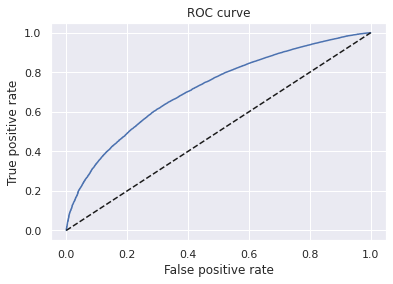

In [ ]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [ ]:
AUROC = roc_auc_score(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.7141020065109722

## Evaluation of model performance by Gini and Kolmogorov-Smirnov Coefficient
1. In credit risk modelling Gini is utilized with the same purpose to measure inequality between non defaulted or good borrowers and defaulted or bad borrowers in a population.The Gini coefficient is measured by plotting the cumulative proportion of defaulted or bad borrowers as a function of the cumulative proportion of all borrowers.
2. The second criterion Kolmogorov-Smirnov shows to what extent the models separates the actual good borrowers from the actual bad borrowers.It is measured by looking at the cumulative distributions of actual good borrowers and actual bad borrowers with respect to the estimated probabilities of being good and bad by our model.Kolmogorov-Smirnov or ks in short is the maximum difference between the cumulative distribution functions of 'good' and 'bad' borrowers with respect to predicted probabilities. The greater this difference the better the model.

In [ ]:
df_actual_predicted_proba = df_actual_predicted_proba.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [ ]:
df_actual_predicted_proba.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
14868                       1          0.370407           0
58288                       1          0.371890           0
48752                       0          0.382369           0
67123                       0          0.445909           0
85282                       0          0.454187           0

In [ ]:
df_actual_predicted_proba.tail()

loan_data_targets_test  y_hat_test_proba  y_hat_test
12832                       1          0.994372           1
27134                       1          0.994480           1
18097                       1          0.994758           1
28298                       1          0.994908           1
54837                       1          0.995441           1

In [ ]:
df_actual_predicted_proba = df_actual_predicted_proba.reset_index()
# We reset the index of a dataframe and overwrite it.

In [ ]:
df_actual_predicted_proba.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  14868                       1          0.370407           0
1  58288                       1          0.371890           0
2  48752                       0          0.382369           0
3  67123                       0          0.445909           0
4  85282                       0          0.454187           0

In [ ]:
df_actual_predicted_proba['Cumulative N Population'] = df_actual_predicted_proba.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_proba['Cumulative N Good'] = df_actual_predicted_proba['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_proba['Cumulative N Bad'] = df_actual_predicted_proba['Cumulative N Population'] - df_actual_predicted_proba['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [ ]:
df_actual_predicted_proba.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  14868                       1          0.370407           0   
1  58288                       1          0.371890           0   
2  48752                       0          0.382369           0   
3  67123                       0          0.445909           0   
4  85282                       0          0.454187           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  1                 0  
1                        2                  2                 0  
2                        3                  2                 1  
3                        4                  2                 2  
4                        5                  2                 3

In [ ]:
df_actual_predicted_proba['Cumulative Perc Population'] = df_actual_predicted_proba['Cumulative N Population'] / (df_actual_predicted_proba.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_proba['Cumulative Perc Good'] = df_actual_predicted_proba['Cumulative N Good'] / df_actual_predicted_proba['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_proba['Cumulative Perc Bad'] = df_actual_predicted_proba['Cumulative N Bad'] / (df_actual_predicted_proba.shape[0] - df_actual_predicted_proba['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [ ]:
df_actual_predicted_proba.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  14868                       1          0.370407           0   
1  58288                       1          0.371890           0   
2  48752                       0          0.382369           0   
3  67123                       0          0.445909           0   
4  85282                       0          0.454187           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  1                 0   
1                        2                  2                 0   
2                        3                  2                 1   
3                        4                  2                 2   
4                        5                  2                 3   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011              0.000012             0.000000  
1                    0.000021              0.000024             0.000000  
2                    0.000032              0.000024             0.000111  
3                    0.000043              0.000024             0.000222  
4                    0.000054              0.000024             0.000332

In [ ]:
df_actual_predicted_proba.tail()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
93252  12832                       1          0.994372           1   
93253  27134                       1          0.994480           1   
93254  18097                       1          0.994758           1   
93255  28298                       1          0.994908           1   
93256  54837                       1          0.995441           1   

       Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
93252                    93253              84226              9027   
93253                    93254              84227              9027   
93254                    93255              84228              9027   
93255                    93256              84229              9027   
93256                    93257              84230              9027   

       Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
93252                    0.999957              0.999953                  1.0  
93253                    0.999968              0.999964                  1.0  
93254                    0.999979              0.999976                  1.0  
93255                    0.999989              0.999988                  1.0  
93256                    1.000000              1.000000                  1.0

Text(0.5, 1.0, 'Gini')

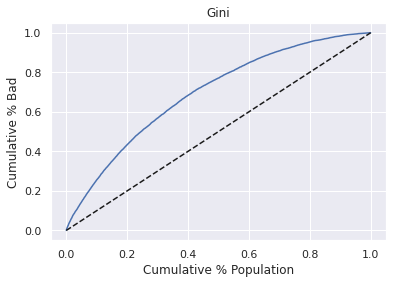

In [ ]:
# Plot Gini
plt.plot(df_actual_predicted_proba['Cumulative Perc Population'], df_actual_predicted_proba['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_proba['Cumulative Perc Population'], df_actual_predicted_proba['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [ ]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.42820401302194444

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

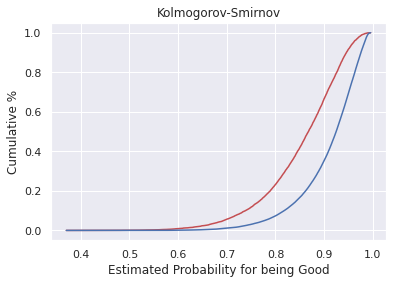

In [ ]:
# Plot KS
plt.plot(df_actual_predicted_proba['y_hat_test_proba'], df_actual_predicted_proba['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_proba['y_hat_test_proba'], df_actual_predicted_proba['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [ ]:
KS = max(df_actual_predicted_proba['Cumulative Perc Bad'] - df_actual_predicted_proba['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.31506073413776636

# Applying the PD Model






### Calculating PD of individual accounts
We already learned how to interpret the coefficients of the PD model and how to estimate the probability of default and the probability of non default of individual accounts.And as you can recall we did it by applying the predict method to the test dataset.Let's quickly revise how it's done.

1. First we should multiply the values of a borrower on the independent dummy variables by the respective model coefficients.So when an exponent is raised on this result it equals the odds for being good versus bad.From there you can easily calculate the estimated probability of being good.
2. Now each observation from all dummy categories of the original independent variable can only have a value of 1 for one of the dummy variables.The rest are always 0 so we don't need to bother multiplying at all.
3. So calculating the power on which the exponents should be raised to obtain the odds boils down to summing the regression coefficients for all dummy categories to which an observation belongs.
4. It's time to check out how it's done with a practical example.We'll use the inputs test with reference categories data frame. Let's take the first observation from this dataset.Its index is 362514.
5. First we take the intercept.It's -1.404114.Then the external grade of this observation is C. We add its respective coefficient or 0.695977 to the intercept to get -0.708117.Next we look into home ownership status as you can see the borrower has a mortgage.The coefficient of that is 0.088665 So when we add it to the total up to now we get -0.619472.According to the data the borrower lives in California so we can add a coefficient for California or
0.043692 and get -0.57578.The borrower's verification status verified.But there is no coefficient for this verification status because we use that as a reference category.Hence we add zero.The total remains unchanged.The purpose of the loan is either a major purchase or car or home improvement and the coefficient for that dummy variable is 0.291650. If we add it to the total will get -0.28413 and we can go on until we've added all the relevant coefficients to get a final sum.
6. These are the log odds.Let's get rid of the logarithm as we discuss already.
To achieve that we raise an exponent to that power and get the result.In conclusion the estimated probability of being a good borrower is equal to this number divided by that same number plus one.Therefore the probability that this person will not default is the result obtained by above formula (can be converted to percentage).Similarly we can calculate the probability of default of each new customer.
7. What is done in practice though is a bit different.Banks usually turn these models into scorecards.Scorecards have the advantage of being standardized
no matter the model.The score cards look the same way.This makes them much more interpretable for non-technical people and allows us to compare different PD models.We are going to turn the PD model into a scorecard and learn how to calculate the credit score of each borrower.



In [ ]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [ ]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [ ]:
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.404114            NaN
1                                grade:A      1.092539   2.630556e-28
2                                grade:B      0.892066   1.220976e-44
3                                grade:C      0.695977   2.442000e-32
4                                grade:D      0.508930   6.323544e-20
5                                grade:E      0.323862   4.440893e-11
6                                grade:F      0.124810   1.453276e-02
7                     home_ownership:OWN      0.080866   1.485713e-04
8                home_ownership:MORTGAGE      0.088665   3.552285e-11
9                       addr_state:NM_VA      0.038217   2.579425e-01
10                         addr_state:NY      0.069849   6.372811e-03
11          addr_state:OK_TN_MO_LA_MD_NC      0.064415   8.461158e-03
12                         addr_state:CA      0.043692   4.987994e-02
13                addr_state:UT_KY_AZ_NJ      0.074022   4.810576e-03
14             addr_state:AR_MI_PA_OH_MN      0.134216   1.629263e-08
15             addr_state:RI_MA_DE_SD_IN      0.108155   6.252184e-04
16                   addr_state:GA_WA_OR      0.165974   3.153678e-09
17                      addr_state:WI_MT      0.250060   7.134733e-07
18                         addr_state:TX      0.228623   9.149800e-17
19                      addr_state:IL_CT      0.262088   1.960976e-17
20          addr_state:KS_SC_CO_VT_AK_MS      0.316822   2.630230e-22
21          addr_state:WV_NH_WY_DC_ME_ID      0.514558   5.369558e-20
22      verification_status:Not Verified      0.087986   1.017150e-08
23   verification_status:Source Verified     -0.004690   7.419245e-01
24                   purpose:credit_card      0.338608   4.303222e-31
25            purpose:debt_consolidation      0.221501   1.094344e-16
26            purpose:oth__med__vacation      0.214712   2.067004e-11
27   purpose:major_purch__car__home_impr      0.291650   1.644011e-19
28                 initial_list_status:w      0.061632   1.125144e-05
29                               term:36      0.069823   2.380309e-06
30                          emp_length:1      0.101072   2.134671e-04
31                        emp_length:2-4      0.124066   4.219874e-10
32                        emp_length:5-6      0.096421   1.839202e-05
33                        emp_length:7-9      0.066351   2.512994e-03
34                         emp_length:10      0.127897   5.027773e-11
35                mths_since_issue_d:<38      1.498654  3.187845e-278
36              mths_since_issue_d:38-39      1.176371  2.850060e-236
37              mths_since_issue_d:40-41      1.012211  2.720345e-190
38              mths_since_issue_d:42-48      0.747817  2.148043e-139
39              mths_since_issue_d:49-52      0.518546   4.426700e-60
40              mths_since_issue_d:53-64      0.223927   4.084003e-14
41              mths_since_issue_d:65-84     -0.069845   1.758276e-02
42                       int_rate:<9.548      0.919203   1.729825e-27
43                 int_rate:9.548-12.025      0.545745   2.517971e-31
44                 int_rate:12.025-15.74      0.308164   1.244537e-15
45                 int_rate:15.74-20.281      0.105546   5.218241e-04
46  mnths_since_earliest_cr_line:141-164      0.065209   1.312680e-02
47  mnths_since_earliest_cr_line:165-247      0.040574   5.717855e-02
48  mnths_since_earliest_cr_line:248-270      0.093715   7.781198e-04
49  mnths_since_earliest_cr_line:271-352      0.135998   5.178259e-08
50     mnths_since_earliest_cr_line:>352      0.133682   2.201392e-06
51                      inq_last_6mths:0      0.697646   7.559985e-15
52                    inq_last_6mths:1-2      0.549252   8.815835e-10
53                    inq_last_6mths:3-6      0.329139   2.633797e-04
54                       total_acc:28-51     -0.041203   2.529566e-03
55                        total_acc:>=52      0.016907   6.621663e-01
56                    annual_inc:20K-3

In [ ]:
y_hat_test_proba

array([0.93873558, 0.88894256, 0.88791391, ..., 0.97610641, 0.96427821,
       0.95320598])

### *Creating a scorecard*
1. We mentioned on numerous occasions that P.D. models must be easy to understand and interpret.Basically all kinds of people even with a background in arts should be able to understand and apply them.This is why P.D models are often turned into simplified model versions called scorecards.Applying the scorecard is just like applying the PD model itself. A scorecard tool produces an individual  credit worthiness assessment that directly corresponds to a specific probability of default because these credit worthiness assessments are named after the scorecard.They are called credit scores.
2. Now we are going to create a scorecard based on our PD model.We store the coefficients for our PD model in a data frame called summary table.It contains regression coefficients for all independent dummy variables except for the reference categories.As you can recall we were not allowed to include the reference categories when estimating the model.However when using it to predict probability of default we just take those as zeros.
3. Now when creating a scorecard we wanted to be as interpretable as possible.
Thus let's include these reference categories and show them in the scorecard.
We have a list of the reference categories here.Let's create a data frame based on it called df_ref_categories and call the first column 'feature name',just like the first column of the summary table.
4. Then assuming that there are regression coefficients for the reference categories and that they are all zeros we can create a column coefficients with zero values for full consistency. I'll include a column with corresponding p values with NaN values.Now this data frame has the exact same layout as the summary table data frame will store the scorecard
5. In df_scorecard then we'll merge the rows of the two data frames and reset the index this way.We'll get the input from our PD model as if the reference categories were included in the model estimation and had coefficients of zero.
6. Now let's make sure we have the name of the original independent variables as well.We are going to need it soon. We can save it in the new column called 'original feature name'.After conditioning of this data frame , it contains the name of the original independent variable.Now it is time for the real work in order to create a scorecard.
7. We need to turn the regression coefficients from our PD model into simple scores.First we must decide what scorecard we want to create.Let's say we want the minimum score to be 300 and the maximum score to be 850, just like the most typical FICO score it will be useful to store these values in two variables .Let's call them minimum score and maximum score.
8. Second we must reach scale the credit worthiness assessment produced by our model to the desired credit score to achieve that.Apart from the range of the score card we also need the minimum and the maximum of the credit worthiness
assessments that can be obtained from the PD model.
9. Recall how we calculated PD for an observation.Each observation falls into only one dummy category of each original independent variable.Moreover higher coefficients correspond to being a better borrower.That is to better credit worthiness.So theoretically speaking the minimum credit worthiness assessment we can get from the PD model would be in the case where a borrower falls into all the categories of original independent variables with lowest model coefficients.Similarly the maximum credit worthiness assessment we can get from the PD model would be in the case.where a borrower falls into the categories of original independent variables with highest model coefficients.Well let's find this minimum and this maximum.
10. We have the names or the original independent variables in the original feature name column of our data frame for each original independent variable.
Therefore we can find the minimum values of coefficients for each group of rows that correspond to the same original independent variable.We do that by applying the group by method to our data frame.Then we can specify that we want to group the rows by original feature name.Next we should put the columns we want to aggregate in this case the coefficients column.Finally we must specify how we want to aggregate.
11. Let's start from the minimum.Here we got the minimum per each original independent variable.Of course the intercept in our model has only one value so we got that value just as we intended when we were building the model.
Most minimum values are zeros in a perfect world that would happen here as well.
However when dealing with real data that rarely happens.There are three exceptions which are negative but a very close to zero.
12. So the minimum possible credit worthiness assessment corresponds to the sum of getting all of these minimum values .Let us store this in a variable called min_sum_coef.Then we can get the maximum possible credit worthiness assessment by summing the maximum values in a similar fashion.Let's store this in a variable called max_sum_coef.
13. Now how do we reach scale the coefficients to scores.It isn't that hard.
In order to turn each dummy variable coefficient to a corresponding score we have to multiply each coefficient by the ratio of the difference between the maximum desired score and the minimum desired score and the difference between the maximum sum of coefficients and the minimum sum of coefficients.Let's perform this calculation for all regression coefficients and store the results in the score calculation variable .
14. Everything looks great except for the very low value of the score calculation corresponding to the intercept. Well that's because the intercept is not a dummy variable it's a coefficient which is always part of the calculation of credit worthiness assessment that applies to every observation regardless of the values of the dummy variables.In fact the score corresponding to the intercept is very close to the minimum score an observation would
get in the worst case scenario credit wise.
15. So what we want to see here is a value around our minimum desired score which is 300.Actually there is another equation that can help us to get the score corresponding to the intercept.Let's see what it is.
16. First we have to divide the difference between the coefficient for the Intercept and the minimum sum of coefficients by the difference between the maximum sum of coefficients and the minimum sum of coefficients.This will place the coefficient for the intercept on a scale between 0 and 1 where 0 would correspond to the possible minimum and 1 to the possible maximum.Next we must multiply them by the difference between the maximum desired score and the minimum desired score.Thus the scale now becomes from zero to the difference between the maximum and the minimum desired score.In our case this difference would be a 850 minus 300 so 550.
17. Finally to turn this into a number between the minimum desired score and the maximum desired score wesimply have to add the minimum desired score to it.
18. Now the only thing left to do to get a simple interpretable and user friendly credit scores is to round the score.
19. Now let's check whether the minimum possible score and the maximum possible score are equal to the desired minimum and maximum scores.We can do that the same way we calculated the minimum and the maximum sums of regression coefficients.We group by original feature name take the minimum of score preliminary and take the sum of these minimum values.
20. For the maximum possible score we do the same;Take the maximum and take the sum of these maximum values.
21. We notice the maximum possible score is 851.It's one point greater than the maximum desired score.This difference is due to the rounding we did.Can we fix it? Sure.
22. We just need to subtract one from the score of every dummy category that yields maximum scores for each original independent variable.However it is best practice to subtract 1 from the variable that was so to say rounded the most; we can see that by calculating the difference between the rounded values in score preliminary and the values before rounding stored in score calculation.
23. Then the score card is ready and the score final column contains the score for each category.



In [ ]:
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.404114            NaN
1                                grade:A      1.092539   2.630556e-28
2                                grade:B      0.892066   1.220976e-44
3                                grade:C      0.695977   2.442000e-32
4                                grade:D      0.508930   6.323544e-20
5                                grade:E      0.323862   4.440893e-11
6                                grade:F      0.124810   1.453276e-02
7                     home_ownership:OWN      0.080866   1.485713e-04
8                home_ownership:MORTGAGE      0.088665   3.552285e-11
9                       addr_state:NM_VA      0.038217   2.579425e-01
10                         addr_state:NY      0.069849   6.372811e-03
11          addr_state:OK_TN_MO_LA_MD_NC      0.064415   8.461158e-03
12                         addr_state:CA      0.043692   4.987994e-02
13                addr_state:UT_KY_AZ_NJ      0.074022   4.810576e-03
14             addr_state:AR_MI_PA_OH_MN      0.134216   1.629263e-08
15             addr_state:RI_MA_DE_SD_IN      0.108155   6.252184e-04
16                   addr_state:GA_WA_OR      0.165974   3.153678e-09
17                      addr_state:WI_MT      0.250060   7.134733e-07
18                         addr_state:TX      0.228623   9.149800e-17
19                      addr_state:IL_CT      0.262088   1.960976e-17
20          addr_state:KS_SC_CO_VT_AK_MS      0.316822   2.630230e-22
21          addr_state:WV_NH_WY_DC_ME_ID      0.514558   5.369558e-20
22      verification_status:Not Verified      0.087986   1.017150e-08
23   verification_status:Source Verified     -0.004690   7.419245e-01
24                   purpose:credit_card      0.338608   4.303222e-31
25            purpose:debt_consolidation      0.221501   1.094344e-16
26            purpose:oth__med__vacation      0.214712   2.067004e-11
27   purpose:major_purch__car__home_impr      0.291650   1.644011e-19
28                 initial_list_status:w      0.061632   1.125144e-05
29                               term:36      0.069823   2.380309e-06
30                          emp_length:1      0.101072   2.134671e-04
31                        emp_length:2-4      0.124066   4.219874e-10
32                        emp_length:5-6      0.096421   1.839202e-05
33                        emp_length:7-9      0.066351   2.512994e-03
34                         emp_length:10      0.127897   5.027773e-11
35                mths_since_issue_d:<38      1.498654  3.187845e-278
36              mths_since_issue_d:38-39      1.176371  2.850060e-236
37              mths_since_issue_d:40-41      1.012211  2.720345e-190
38              mths_since_issue_d:42-48      0.747817  2.148043e-139
39              mths_since_issue_d:49-52      0.518546   4.426700e-60
40              mths_since_issue_d:53-64      0.223927   4.084003e-14
41              mths_since_issue_d:65-84     -0.069845   1.758276e-02
42                       int_rate:<9.548      0.919203   1.729825e-27
43                 int_rate:9.548-12.025      0.545745   2.517971e-31
44                 int_rate:12.025-15.74      0.308164   1.244537e-15
45                 int_rate:15.74-20.281      0.105546   5.218241e-04
46  mnths_since_earliest_cr_line:141-164      0.065209   1.312680e-02
47  mnths_since_earliest_cr_line:165-247      0.040574   5.717855e-02
48  mnths_since_earliest_cr_line:248-270      0.093715   7.781198e-04
49  mnths_since_earliest_cr_line:271-352      0.135998   5.178259e-08
50     mnths_since_earliest_cr_line:>352      0.133682   2.201392e-06
51                      inq_last_6mths:0      0.697646   7.559985e-15
52                    inq_last_6mths:1-2      0.549252   8.815835e-10
53                    inq_last_6mths:3-6      0.329139   2.633797e-04
54                       total_acc:28-51     -0.041203   2.529566e-03
55                        total_acc:>=52      0.016907   6.621663e-01
56                    annual_inc:20K-3

In [ ]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mnths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'total_acc:<=27',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

Feature name  Coefficients  p_values
0                                        grade:G             0       NaN
1             home_ownership:RENT_OTHER_NONE_ANY             0       NaN
2                addr_state:ND_NE_IA_NV_FL_HI_AL             0       NaN
3                   verification_status:Verified             0       NaN
4   purpose:educ__sm_b__wedd__ren_en__mov__house             0       NaN
5                          initial_list_status:f             0       NaN
6                                        term:60             0       NaN
7                                   emp_length:0             0       NaN
8                         mths_since_issue_d:>84             0       NaN
9                               int_rate:>20.281             0       NaN
10             mnths_since_earliest_cr_line:<140             0       NaN
11                             inq_last_6mths:>6             0       NaN
12                                total_acc:<=27             0       NaN
13                               annual_inc:<20K             0       NaN
14                                       dti:>35             0       NaN
15                    mths_since_last_delinq:0-3             0       NaN
16                    mths_since_last_record:0-2             0       NaN

In [ ]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
min_score = 300
max_score = 850

In [ ]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                      -1.404114
addr_state                      0.000000
annual_inc                     -0.030687
dti                            -0.002637
emp_length                      0.000000
grade                           0.000000
home_ownership                  0.000000
initial_list_status             0.000000
inq_last_6mths                  0.000000
int_rate                        0.000000
mnths_since_earliest_cr_line    0.000000
mths_since_issue_d             -0.069845
mths_since_last_delinq          0.000000
mths_since_last_record          0.000000
purpose                         0.000000
term                            0.000000
total_acc                      -0.041203
verification_status            -0.004690
Name: Coefficients, dtype: float64

In [ ]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.5531771271056192

In [ ]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                      -1.404114
addr_state                      0.514558
annual_inc                      0.629250
dti                             0.312191
emp_length                      0.127897
grade                           1.092539
home_ownership                  0.088665
initial_list_status             0.061632
inq_last_6mths                  0.697646
int_rate                        0.919203
mnths_since_earliest_cr_line    0.135998
mths_since_issue_d              1.498654
mths_since_last_delinq          0.162989
mths_since_last_record          0.555372
purpose                         0.338608
term                            0.069823
total_acc                       0.016907
verification_status             0.087986
Name: Coefficients, dtype: float64

In [ ]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.905804531418198

In [ ]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

301.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min()
min_sum_score_prel

Original feature name
Intercept                       311.0
addr_state                        0.0
annual_inc                       -2.0
dti                              -0.0
emp_length                        0.0
grade                             0.0
home_ownership                    0.0
initial_list_status               0.0
inq_last_6mths                    0.0
int_rate                          0.0
mnths_since_earliest_cr_line      0.0
mths_since_issue_d               -5.0
mths_since_last_delinq            0.0
mths_since_last_record            0.0
purpose                           0.0
term                              0.0
total_acc                        -3.0
verification_status              -0.0
Name: Score - Preliminary, dtype: float64

In [ ]:
#Since here we find the minimum score is increased by 1 so we subtract 1 from the original grouped variable which gives the least score to adjust for the final mimimum score.
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][41] = -6
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [ ]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

### Calculating Credit Score
1. In this lesson we're going to learn how to calculate credit score.
2. We calculate individual credit score the same way we calculate the power,on which we have to raise an exponent to get the odds of being a good borrower.As you know every borrower can only fall into one dummy category of every original independent variable.Moreover we estimate the coefficients of the PD model with variables whose value is 1 if the borrower falls into a category and zero if they don't.Therefore what we did is simply sum the dummy coefficients of the borrower categories.
3. In the same way to calculate the credit score of a borrower we only have to sum the credit scores corresponding to the respective dummy categories.Let's see how it's done.
4. To calculate all scores from the test dataset we will use the inputs test with reference categories data frame where we have the dummy variables for all test data set observations.
5. Calculating their credit score is no different.We already have the corresponding coefficients from the scorecard so we are left with addition and multiplication.We can easily multiply the values by the coefficients but first we have to make sure they're ordered the same way.
6. First in the coefficients there is an intercept.There is nothing to multiply the intercept in the test data frame.Sure we could multiply only the values of the variables by the variable coefficients and add the intercept.However it would be much more convenient to go with one multiplication so let's copy the inputs test with reference categories data frame in a new data frame called inputs_test_with_ref_cat_w_intercept.Now let's add a column of ones and multiply it by the score that corresponds to the intercept. This way we yield the intercept score for all observations.We can achieve that by applying the Insert method to the data frame
7. we concede that the first argument zero specifies the index where we want to add a new column.So it will become the first column in this case.The second argument intercept is the name of the column.What about the third argument.
It specifies the values of that column.Since here we want ones everywhere.
Putting a one will suffice.
8. Now we have the data frame with a column taking care of the intercept.But we still have to make sure that the columns are arranged in the same order as the variables in the Scorecard data frame.How can we do that.
9. One way to do that is to use the inputs test with reference categories with intercept data frame but set the column order equal to that of the feature name column from in the Scorecard data frame.
10. Now we can store the scores in a new variable; let scorecards scores equal the scores final column from the Score card data frame.This variable contains the scores in the order of the variables from the score card data frame.It also matches the order the variables from the testdata data frame.
11. So we've got everything we need; a good practice is to make sure they have compatible dimensions the shape of the test data data frame is (93257, 103) and the shape of the scorecard scores variable is (103,); the 102 dimension is compatible.However the fact that there is no second dimension can be an issue.
Functions such as multiplication require matching shapes and matching dimensions; therefore to make the score card scores compatible ,we must use the reshape Method.
12. Now we can safely multiply the testdata data frame by the scores; we want to multiply each row from the test data by the column with scores and then sum the products.In fact multiplying all rows of two matrices of data frames and summing the products is known as DOT PRODUCT in linear algebra.
13. There is an out of box method called dot that can help us with that.So let's find the dot product of test data and score card scores.
14. Moreover the Y score column contains the scores for all observations from the test dataset.
15. We have successfully calculated the credit scores of all people from test data.



In [ ]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514        0        0        1        0        0        0        0   
288564        0        0        0        0        1        0        0   
213591        0        0        1        0        0        0        0   
263083        0        0        1        0        0        0        0   
165001        1        0        0        0        0        0        0   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0                   0   
288564                                   0                   0   
213591                                   0                   0   
263083                                   0                   0   
165001                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [ ]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.404114   
1        1                                       grade:A      1.092539   
2        2                                       grade:B      0.892066   
3        3                                       grade:C      0.695977   
4        4                                       grade:D      0.508930   
5        5                                       grade:E      0.323862   
6        6                                       grade:F      0.124810   
7        7                            home_ownership:OWN      0.080866   
8        8                       home_ownership:MORTGAGE      0.088665   
9        9                              addr_state:NM_VA      0.038217   
10      10                                 addr_state:NY      0.069849   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.064415   
12      12                                 addr_state:CA      0.043692   
13      13                        addr_state:UT_KY_AZ_NJ      0.074022   
14      14                     addr_state:AR_MI_PA_OH_MN      0.134216   
15      15                     addr_state:RI_MA_DE_SD_IN      0.108155   
16      16                           addr_state:GA_WA_OR      0.165974   
17      17                              addr_state:WI_MT      0.250060   
18      18                                 addr_state:TX      0.228623   
19      19                              addr_state:IL_CT      0.262088   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.316822   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.514558   
22      22              verification_status:Not Verified      0.087986   
23      23           verification_status:Source Verified     -0.004690   
24      24                           purpose:credit_card      0.338608   
25      25                    purpose:debt_consolidation      0.221501   
26      26                    purpose:oth__med__vacation      0.214712   
27      27           purpose:major_purch__car__home_impr      0.291650   
28      28                         initial_list_status:w      0.061632   
29      29                                       term:36      0.069823   
30      30                                  emp_length:1      0.101072   
31      31                                emp_length:2-4      0.124066   
32      32                                emp_length:5-6      0.096421   
33      33                                emp_length:7-9      0.066351   
34      34                                 emp_length:10      0.127897   
35      35                        mths_since_issue_d:<38      1.498654   
36      36                      mths_since_issue_d:38-39      1.176371   
37      37                      mths_since_issue_d:40-41      1.012211   
38      38                      mths_since_issue_d:42-48      0.747817   
39      39                      mths_since_issue_d:49-52      0.518546   
40      40                      mths_since_issue_d:53-64      0.223927   
41      41                      mths_since_issue_d:65-84     -0.069845   
42      42                               int_rate:<9.548      0.919203   
43      43                         int_rate:9.548-12.025      0.545745   
44      44                         int_rate:12.025-15.74      0.308164   
45      45                         int_rate:15.74-20.281      0.105546   
46      46          mnths_since_earliest_cr_line:141-164      0.065209   
47      47          mnths_since_earliest_cr_line:165-247      0.040574   
48      48          mnths_since_earliest_cr_line:248-270      0.093715   
49      49          mnths_since_earliest_cr_line:271-352      0.135998   
50      50             mnths_since_earliest_cr_line:>352      0.133682   
51      51                              inq_last_6mths:0      0.697646   
52      52                            inq_last_6mths:1-2      0.549252   
53      5

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [ ]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514        0                                   0                   0   
288564        0                                   0                   0   
213591        0                                   0                   0   
263083        0                                   0                   0   
165001        0                                   0                   0   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                        1                                0   
288564                        1                                0   
213591                        1                                0   
263083                        1                                0   
165001                        1                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0              0                             0   
288564                 0              0                             0   
213591                 0              0                             0   
263083                 0              0                             0   
165001                 0              0                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514              1                       0                          0   
288564              0                       0                          0   
213591              0                       1                          0   
263083              0                       0                          1   
165001              0                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  verification_status:Verified  \
362514                                    0                             1   
288564                                    0                             1   
213591                                    0                             1   
263083                                    1                             0   
165001                                    0                             1  

In [ ]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [ ]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1        0        0        1        0        0        0   
288564          1        0        0        0        0        1        0   
213591          1        0        0        1        0        0        0   
263083          1        0        0        1        0        0        0   
165001          1        1        0        0        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514                   0                        1                 0   
288564                   0                        1                 0   
213591                   0                        1                 0   
263083                   0                        1                 0   
165001                   0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514              0                             0              1   
288564              0                             0              0   
213591              0                             0              0   
263083              0                             0              0   
165001              0                             0              0   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514              0                 0                             0   
288564              0                 0                             0   
213591              0                 0                             0   
263083              0                 0                             0   
165001              0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                                 0   
288564                             0                                 0   
213591                             0                                 0   
263083                             0                                 0   
165001                             0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
362514                                    0                    0   
288564                                    0                    1   
213591                                    0                    0   
263083                                    1                    0   
165001                                    0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                           0                           0   
288564                           0                           0   
213591                           1                           0   
263083                           1                           0   
165001                           1                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                      0        0   
288564                   

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [ ]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 103)

In [ ]:
scorecard_scores.shape

(103,)

In [ ]:
scorecard_scores = scorecard_scores.values.reshape(103, 1)

In [ ]:
scorecard_scores.shape

(103, 1)

In [ ]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [ ]:
y_scores.head()

0
362514  616.0
288564  569.0
213591  565.0
263083  649.0
165001  674.0

In [ ]:
y_scores.tail()

0
115     561.0
296284  689.0
61777   689.0
91763   657.0
167512  637.0

## From Credit Score to PD

In [ ]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

0
362514  0.938909
288564  0.890411
213591  0.885004
263083  0.960070
165001  0.971222

In [ ]:
y_hat_test_proba[0: 5]

array([0.93873558, 0.88894256, 0.88791391, 0.95956074, 0.97089379])

In [ ]:
df_actual_predicted_proba['y_hat_test_proba'].head()

0    0.370407
1    0.371890
2    0.382369
3    0.445909
4    0.454187
Name: y_hat_test_proba, dtype: float64

# Setting Cut-Off and creating the final scorecard
1. We are already very comfortable with both probabilities of default and credit scores.But how do we decide who is granted a loan and who isn't.We will obviously take advantage of the estimated probabilities of default and scores we've already calculated the cutoff rate is being used for taking a decision on whether to approve a loan application or not.
2. If we set a given probability of default as a cutoff all borrowers with a lower probability of default than the cutoff will be granted a loan and logically all borrowers with a higher PD will be rejected.
3. What is important to realize though is that a specific cutoff has two major implications. Once the cut off is chosen, the total number of borrowers that will be approved and rejected is predetermined.And this cutoff impacts the quality of the loans the bank would grant naturally.There is a tradeoff between the two.If we want to grant more loans we will be inevitably accepting lower quality borrowers.The other side of the coin is that if we only approve the most credit worthy borrowers we will end up with very few loans.
4. As you know financial institutions that provide loans make money from lending loans and not from keeping their money safe.So the cutoff point is decided based on those two factors:-

a.   How many borrowers would be accepted and rejected?<br>
b.   And what will the credit worthiness of the accepted borrowers be?

5. If a bank wants more business it will set a lower cutoff in terms of credit worthiness or probability of non default.And if the bank wants to lend to fewer borrowers with higher credit worthiness it will set a higher cutoff point in terms of probability of non default.
6. Now apart from the probabilities of default we also have false positives and false negatives.False negatives are borrowers that are projected to default but don't. False positives on the other hand are borrowers that are projected to pay their loan but actually default.In both cases our model fails to predict that, which has a huge impact on the bank's profitability.Where do we get this information from though?
7. Well remember the receiver operating characteristic or ROC curve, we plotted when we were assessing the performance of our PD model.We used the ROC curve method with the actual good bad variable from the test dataset and the probability of being good, estimated by the PD model. The method returned three arrays, the false positive rates, the true positive rates and the probability thresholds at which the respective false positive rate and the true positive
rate was obtained.
8. All of this data is useful for setting decision making cutoffs so let's copy the code here and examine the ROC curve once again this time in the light of choosing a cutoff.
9. Let's create a new data frame where we'll store the data for selecting cutoffs.We'll start by storing the results of the ROC curve method in it.Notice how the data is arranged.
10. The thresholds are in descending order that is starting from the largest to the smallest.Note that the ROC curve method sets the first threshold where nothing is being projected to the maximum probability score from the supplied data plus 1.This row is not very instructive and won't be useful for setting cutoffs so we can either drop it altogether or set the threshold to a probability which is very close to 1.Let's do the latter setting it to 1-10^(-16).
11. One common way to set cutoffs is based on the estimated probabilities to be good.Another one is through credit scores as there is a 1 to 1 correspondence between the two.Since scores are much more interpretable let's opt for them.We recently used a formula to calculate the probability to be good based on a score.Now we can reverse this expression to calculate a score from probability to be good.
12. It goes as follows.The Score equals the log of odds,that is the log of the probability to be good divided by (1- the probability to be good -the minimum sum of coefficients).This expression in turn is multiplied by the ratio of the difference of the maximum score and the minimum score and the difference of the maximum sum of coefficients and the minimum sum of coefficients.Finally the minimum score is added to the expression.
13. Of course there is no probability as high as the probability we set the threshold on the first row.So the score corresponding to it is very high and out of range.Therefore we should place the maximum score on the first row.
14. Everything else seems about right.Now let's see the approval and rejection rates for each possible cutoff; to calculate them.we have two options:-

a. The first one is to use the number of loan applications that would be approved.<br>
b. To use the number of loan applications that would be rejected if decision was made based on the respective cutoff.

15. The second piece of information we need is the total number of applicants.Of course we treat the borrowers from the test data set as new applicants.After all, the test data set should simulate a real world situation. Let's create a function that calculates the number of approved applicants for a given probability threshold.
16. We defined the function 'number of approved' with one parameter p which will be the probability threshold.This function will return the number of borrowers for which the predicted probability of default is greater than or equal to the parameter p.With the help of this function the number of approved applicants for every threshold would be returned by applying the n_approved function to that threshold.
17. Then the number of applicants that will be rejected equals the (total number of applicants - the number of approved).Once we've calculated them we can find the approval and rejection rates.The approval rate for every threshold equals the number of approved applicants divided by the total number of applicants and the rejection rate equals (1 - the approval rate).let's assume the highest level of probability of default we'd accept is 10 percent.In other words the lowest possible probability of being good is 90 percent.With this cutoff we will end up with 61.62% approval rate and about 38.67 % rejection rate.How about a probability of default of 5 % ? Well in that case we'd end up with a 21.22 % aproval rate and a 78.77% rejection rate.And that's how we set cutoffs using the estimated probability of being good.
18. As we mentioned we could set cutoffs using credit score instead.Since credit scores are discrete values it is very hard to achieve the same level of accuracy.For instance if we set the cutoff score at 583 we would approve everyone with a probability of being good greater than or equal to 90.7% actually that will result in an approval rate of about 57.6% and a rejection rate of about 42.4%.
19. All right well let's just export the input string with reference categories data frame and the score card data frame to see CSV files.



In [ ]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_proba['y_hat_test'] = np.where(df_actual_predicted_proba['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted      0      1
Actual                 
0           6016   3011
1          29774  54456

In [ ]:
pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]

Predicted         0         1
Actual                       
0          0.064510  0.032287
1          0.319268  0.583935

In [ ]:
(pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_proba.shape[0]).iloc[1, 1]

0.6484446207791372

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
roc_curve(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99955688, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.18722545e-05, 1.30594800e-04, ...,
        9.99976255e-01, 9.99976255e-01, 1.00000000e+00]),
 array([1.99544104, 0.99544104, 0.99406375, ..., 0.48281873, 0.38236915,
        0.37040663]))

In [ ]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_proba['loan_data_targets_test'], df_actual_predicted_proba['y_hat_test_proba'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

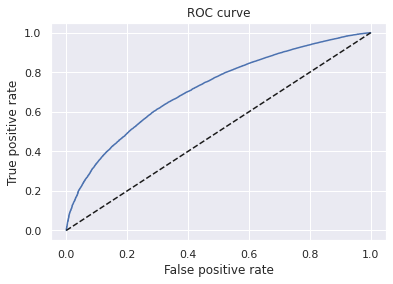

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [ ]:
thresholds

array([1.99544104, 0.99544104, 0.99406375, ..., 0.48281873, 0.38236915,
       0.37040663])

In [ ]:
thresholds.shape

(15442,)

In [ ]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [ ]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr
0    1.995441  0.000000  0.000000
1    0.995441  0.000000  0.000012
2    0.994064  0.000000  0.000131
3    0.994025  0.000111  0.000131
4    0.993118  0.000111  0.000629

In [ ]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [ ]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr   Score
0    1.000000  0.000000  0.000000  3123.0
1    0.995441  0.000000  0.000012   812.0
2    0.994064  0.000000  0.000131   792.0
3    0.994025  0.000111  0.000131   792.0
4    0.993118  0.000111  0.000629   781.0

In [ ]:
df_cutoffs['Score'][0] = max_score

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr  Score
0    1.000000  0.000000  0.000000  850.0
1    0.995441  0.000000  0.000012  812.0
2    0.994064  0.000000  0.000131  792.0
3    0.994025  0.000111  0.000131  792.0
4    0.993118  0.000111  0.000629  781.0

In [ ]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score
15437    0.484612  0.999335  0.999964  410.0
15438    0.483362  0.999557  0.999964  410.0
15439    0.482819  0.999557  0.999976  409.0
15440    0.382369  1.000000  0.999976  379.0
15441    0.370407  1.000000  1.000000  375.0

In [ ]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [ ]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for all thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_proba['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [ ]:
df_cutoffs.head()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
0    1.000000  0.000000  0.000000  850.0           0       93257   
1    0.995441  0.000000  0.000012  812.0           1       93256   
2    0.994064  0.000000  0.000131  792.0          11       93246   
3    0.994025  0.000111  0.000131  792.0          12       93245   
4    0.993118  0.000111  0.000629  781.0          54       93203   

   Approval Rate  Rejection Rate  
0       0.000000        1.000000  
1       0.000011        0.999989  
2       0.000118        0.999882  
3       0.000129        0.999871  
4       0.000579        0.999421

In [ ]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
15437    0.484612  0.999335  0.999964  410.0       93248           9   
15438    0.483362  0.999557  0.999964  410.0       93250           7   
15439    0.482819  0.999557  0.999976  409.0       93251           6   
15440    0.382369  1.000000  0.999976  379.0       93255           2   
15441    0.370407  1.000000  1.000000  375.0       93257           0   

       Approval Rate  Rejection Rate  
15437       0.999903        0.000097  
15438       0.999925        0.000075  
15439       0.999936        0.000064  
15440       0.999979        0.000021  
15441       1.000000        0.000000

In [ ]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
5000    0.907319  0.294228  0.608026  583.0       53870       39387   
5001    0.907318  0.294339  0.608026  583.0       53871       39386   
5002    0.907309  0.294339  0.608109  583.0       53878       39379   
5003    0.907306  0.294450  0.608109  583.0       53879       39378   
5004    0.907274  0.294450  0.608251  583.0       53891       39366   
5005    0.907271  0.294561  0.608251  583.0       53892       39365   
5006    0.907268  0.294561  0.608263  583.0       53893       39364   
5007    0.907266  0.294672  0.608263  583.0       53894       39363   
5008    0.907258  0.294672  0.608358  583.0       53902       39355   
5009    0.907257  0.294782  0.608358  583.0       53903       39354   
5010    0.907248  0.294782  0.608394  583.0       53906       39351   
5011    0.907244  0.294893  0.608394  583.0       53907       39350   
5012    0.907209  0.294893  0.608572  583.0       53922       39335   
5013    0.907208  0.295004  0.608572  583.0       53923       39334   
5014    0.907201  0.295004  0.608607  583.0       53926       39331   
5015    0.907201  0.295115  0.608607  583.0       53927       39330   
5016    0.907103  0.295115  0.609070  583.0       53966       39291   
5017    0.907101  0.295225  0.609070  583.0       53967       39290   
5018    0.907087  0.295225  0.609189  583.0       53977       39280   
5019    0.907086  0.295336  0.609189  583.0       53978       39279   
5020    0.907082  0.295336  0.609225  583.0       53981       39276   
5021    0.907081  0.295447  0.609225  583.0       53982       39275   
5022    0.907060  0.295447  0.609403  583.0       53997       39260   
5023    0.907060  0.295558  0.609403  583.0       53998       39259   
5024    0.907020  0.295558  0.609747  582.0       54027       39230   
5025    0.907020  0.295669  0.609747  582.0       54028       39229   
5026    0.906948  0.295669  0.610115  582.0       54059       39198   
5027    0.906944  0.295779  0.610115  582.0       54060       39197   
5028    0.906878  0.295779  0.610590  582.0       54100       39157   
5029    0.906872  0.295890  0.610590  582.0       54101       39156   
5030    0.906842  0.295890  0.610733  582.0       54113       39144   
5031    0.906839  0.296001  0.610733  582.0       54114       39143   
5032    0.906819  0.296001  0.610863  582.0       54125       39132   
5033    0.906818  0.296112  0.610863  582.0       54126       39131   
5034    0.906817  0.296112  0.610875  582.0       54127       39130   
5035    0.906817  0.296222  0.610875  582.0       54128       39129   
5036    0.906782  0.296222  0.611077  582.0       54145       39112   
5037    0.906778  0.296333  0.611077  582.0       54146       39111   
5038    0.906770  0.296333  0.611112  582.0       54149       39108   
5039    0.906769  0.296444  0.611112  582.0       54150       39107   
5040    0.906717  0.296444  0.611338  582.0       54169       39088   
5041    0.906715  0.296555  0.611338  582.0       54170       39087   
5042    0.906698  0.296555  0.611445  582.0       54179       39078   
5043    0.906692  0.296666  0.611445  582.0       54180       39077   
5044    0.906676  0.296666  0.611611  582.0       54194       39063   
5045    0.906676  0.296776  0.611611  582.0       54195       39062   
5046    0.906673  0.296776  0.611647  582.0       54198       39059   
5047    0.906669  0.296887  0.611647  582.0       54199       39058   
5048    0.906668  0.296887  0.611659  582.0       54200       39057   
5049    0.906668  0.296998  0.611659  582.0       54201       39056   
5050    0.906634  0.296998  0.611837  582.0       54216       39041   
5051    0.906634  0.297109  0.611837  582.0       54217       39040   
5052    0.906613  0.297109  0.611932  582.0       54225       39032   
5053    0.906607  0.297219  0.611932  582.0       54226       39031   
5054    0.906597  0.297219  0.612015  582.0       54233       39024   
5055    0.906596  0.297330  0.

In [ ]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
1000    0.957712  0.056054  0.241505  645.0       20848       72409   
1001    0.957711  0.056165  0.241505  645.0       20849       72408   
1002    0.957674  0.056165  0.241862  645.0       20879       72378   
1003    0.957667  0.056386  0.241862  645.0       20881       72376   
1004    0.957600  0.056386  0.242348  644.0       20922       72335   
1005    0.957598  0.056497  0.242348  644.0       20923       72334   
1006    0.957581  0.056497  0.242515  644.0       20937       72320   
1007    0.957579  0.056608  0.242515  644.0       20938       72319   
1008    0.957570  0.056608  0.242621  644.0       20947       72310   
1009    0.957570  0.056719  0.242621  644.0       20948       72309   
1010    0.957563  0.056719  0.242693  644.0       20954       72303   
1011    0.957563  0.056830  0.242693  644.0       20955       72302   
1012    0.957541  0.056830  0.242871  644.0       20970       72287   
1013    0.957535  0.056940  0.242871  644.0       20971       72286   
1014    0.957532  0.056940  0.242894  644.0       20973       72284   
1015    0.957531  0.057051  0.242894  644.0       20974       72283   
1016    0.957499  0.057051  0.243061  644.0       20988       72269   
1017    0.957497  0.057162  0.243061  644.0       20989       72268   
1018    0.957491  0.057162  0.243144  644.0       20996       72261   
1019    0.957491  0.057273  0.243144  644.0       20997       72260   
1020    0.957427  0.057273  0.243607  644.0       21036       72221   
1021    0.957425  0.057383  0.243607  644.0       21037       72220   
1022    0.957398  0.057383  0.243809  644.0       21054       72203   
1023    0.957397  0.057494  0.243809  644.0       21055       72202   
1024    0.957334  0.057494  0.244165  644.0       21085       72172   
1025    0.957334  0.057605  0.244165  644.0       21086       72171   
1026    0.957214  0.057605  0.245233  644.0       21176       72081   
1027    0.957211  0.057716  0.245233  644.0       21177       72080   
1028    0.957197  0.057716  0.245376  644.0       21189       72068   
1029    0.957195  0.057827  0.245376  644.0       21190       72067   
1030    0.957157  0.057827  0.245649  644.0       21213       72044   
1031    0.957156  0.057937  0.245649  644.0       21214       72043   
1032    0.957079  0.057937  0.246207  643.0       21261       71996   
1033    0.957079  0.058048  0.246207  643.0       21262       71995   
1034    0.957060  0.058048  0.246385  643.0       21277       71980   
1035    0.957059  0.058159  0.246385  643.0       21278       71979   
1036    0.957031  0.058159  0.246610  643.0       21297       71960   
1037    0.957031  0.058270  0.246610  643.0       21298       71959   
1038    0.957022  0.058270  0.246694  643.0       21305       71952   
1039    0.957020  0.058380  0.246694  643.0       21306       71951   
1040    0.956985  0.058380  0.246907  643.0       21324       71933   
1041    0.956984  0.058380  0.246931  643.0       21326       71931   
1042    0.956931  0.058380  0.247418  643.0       21367       71890   
1043    0.956931  0.058491  0.247418  643.0       21368       71889   
1044    0.956801  0.058491  0.248463  643.0       21456       71801   
1045    0.956798  0.058602  0.248463  643.0       21457       71800   
1046    0.956749  0.058602  0.248747  643.0       21481       71776   
1047    0.956747  0.058713  0.248747  643.0       21482       71775   
1048    0.956743  0.058713  0.248807  643.0       21487       71770   
1049    0.956739  0.058824  0.248807  643.0       21488       71769   
1050    0.956675  0.058824  0.249365  643.0       21535       71722   
1051    0.956674  0.058934  0.249365  643.0       21536       71721   
1052    0.956664  0.058934  0.249484  643.0       21546       71711   
1053    0.956663  0.059045  0.249484  643.0       21547       71710   
1054    0.956657  0.059045  0.249579  643.0       21555       71702   
1055    0.956653  0.059156  0.

In [ ]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [ ]:
df_scorecard.to_csv('df_scorecard.csv')